# Predictions for the NEOCP using current criteria

In this notebook we show our predictions for the near-Earth object confirmation page in the Era of LSST when using current submission criteria.

You can find the code creating Figures 1-4.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd

import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u

from datetime import date

import numpy as np
from os import listdir

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import sys
sys.path.append("../src")
import helpers

import difi

In [3]:
import sys
sys.path.append("../mitigation_algorithm/")
import magnitudes

In [4]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [5]:
import os

In [6]:
from importlib import reload

# Set up S3M ID conversion

In [7]:
s3m = pd.read_hdf("../../hybrid-sso-catalogs/catalogues/s3m_initial.h5")
hex_ids = np.array(['{:07X}'.format(num) for num in np.arange(len(s3m.index.values))])
s3m_to_hex7 = dict(zip(s3m.index.values, hex_ids))

In [8]:
num_ids = np.arange(len(s3m))
s3m_to_num = dict(zip(s3m.index.values, num_ids))

In [9]:
mpcorb = pd.read_hdf("../../hybrid-sso-catalogs/catalogues/mpcorb_propagated_cart.h5")

In [11]:
cut_s3m = pd.read_hdf("/epyc/projects/hybrid-sso-catalogs/catalogues/rescaled/s3m_propagated_cart_0.80.h5")

In [546]:
valid_hex = [s3m_to_hex7[x] for x in cut_s3m_masked.index.values]

In [753]:
grav_mba_H = pd.read_csv("grav-mba-H.csv").sort_values("x").values

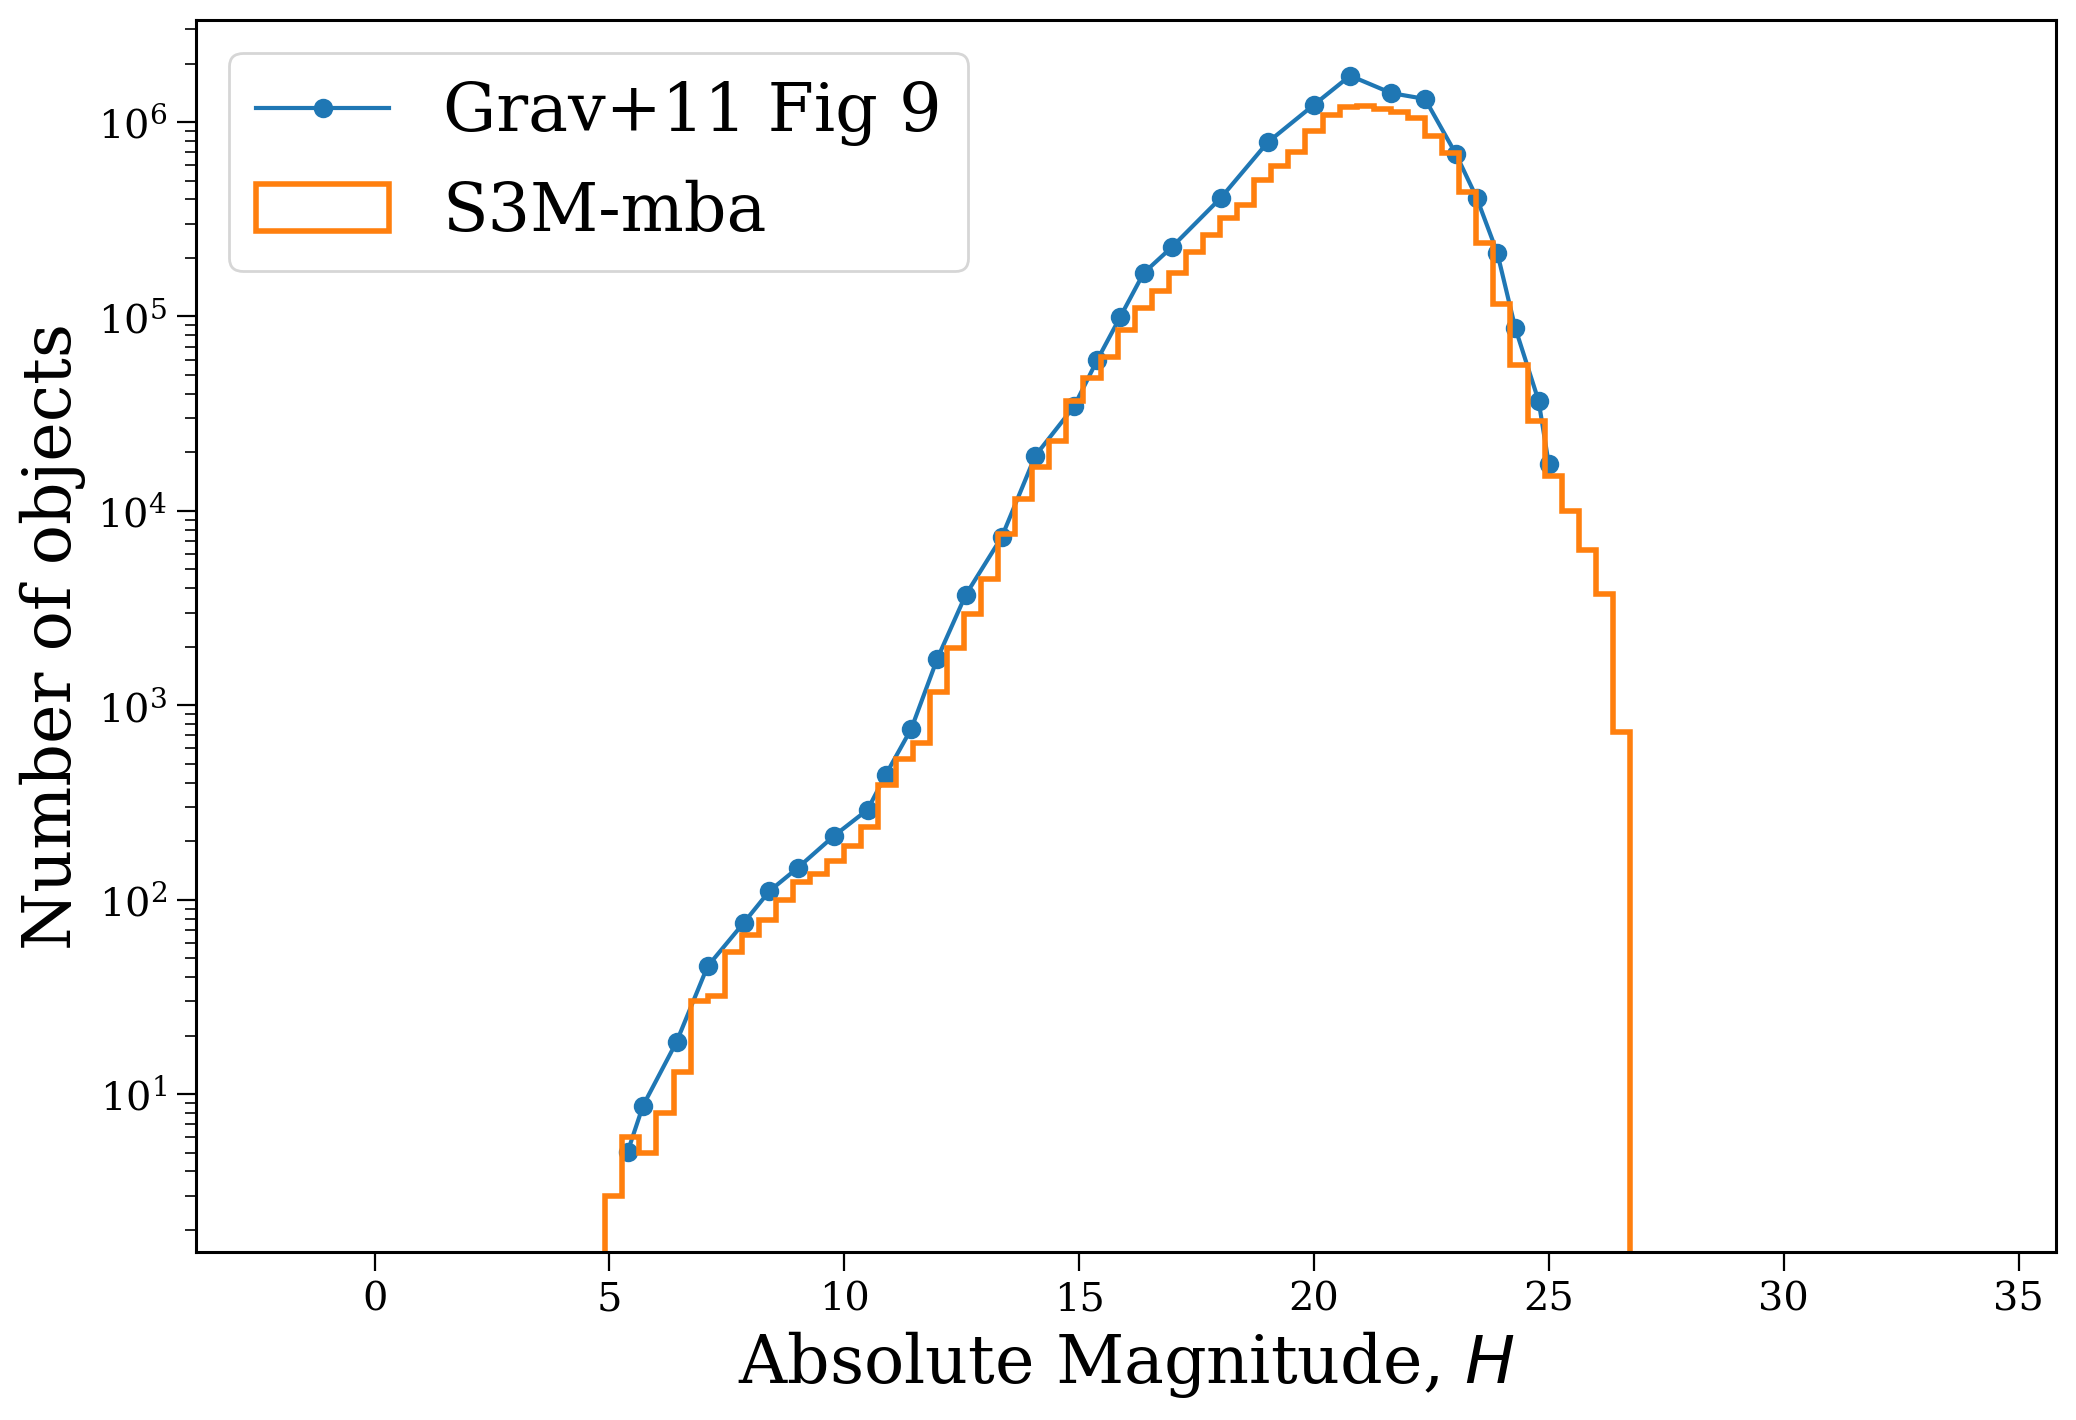

In [800]:
fig, ax = plt.subplots()

ax.plot(grav_mba_H[:, 0], grav_mba_H[:, 1], marker="o", label="Grav+11 Fig 9")
ax.hist(s3m_abs_mag[is_mba], bins=bins, histtype="step", lw=2, label="S3M-mba")

ax.set(xlabel=r"Absolute Magnitude, $H$", ylabel="Number of objects",
     yscale="log")
ax.legend()

plt.show()

In [14]:
s3m_abs_mag = s3m["H"].values

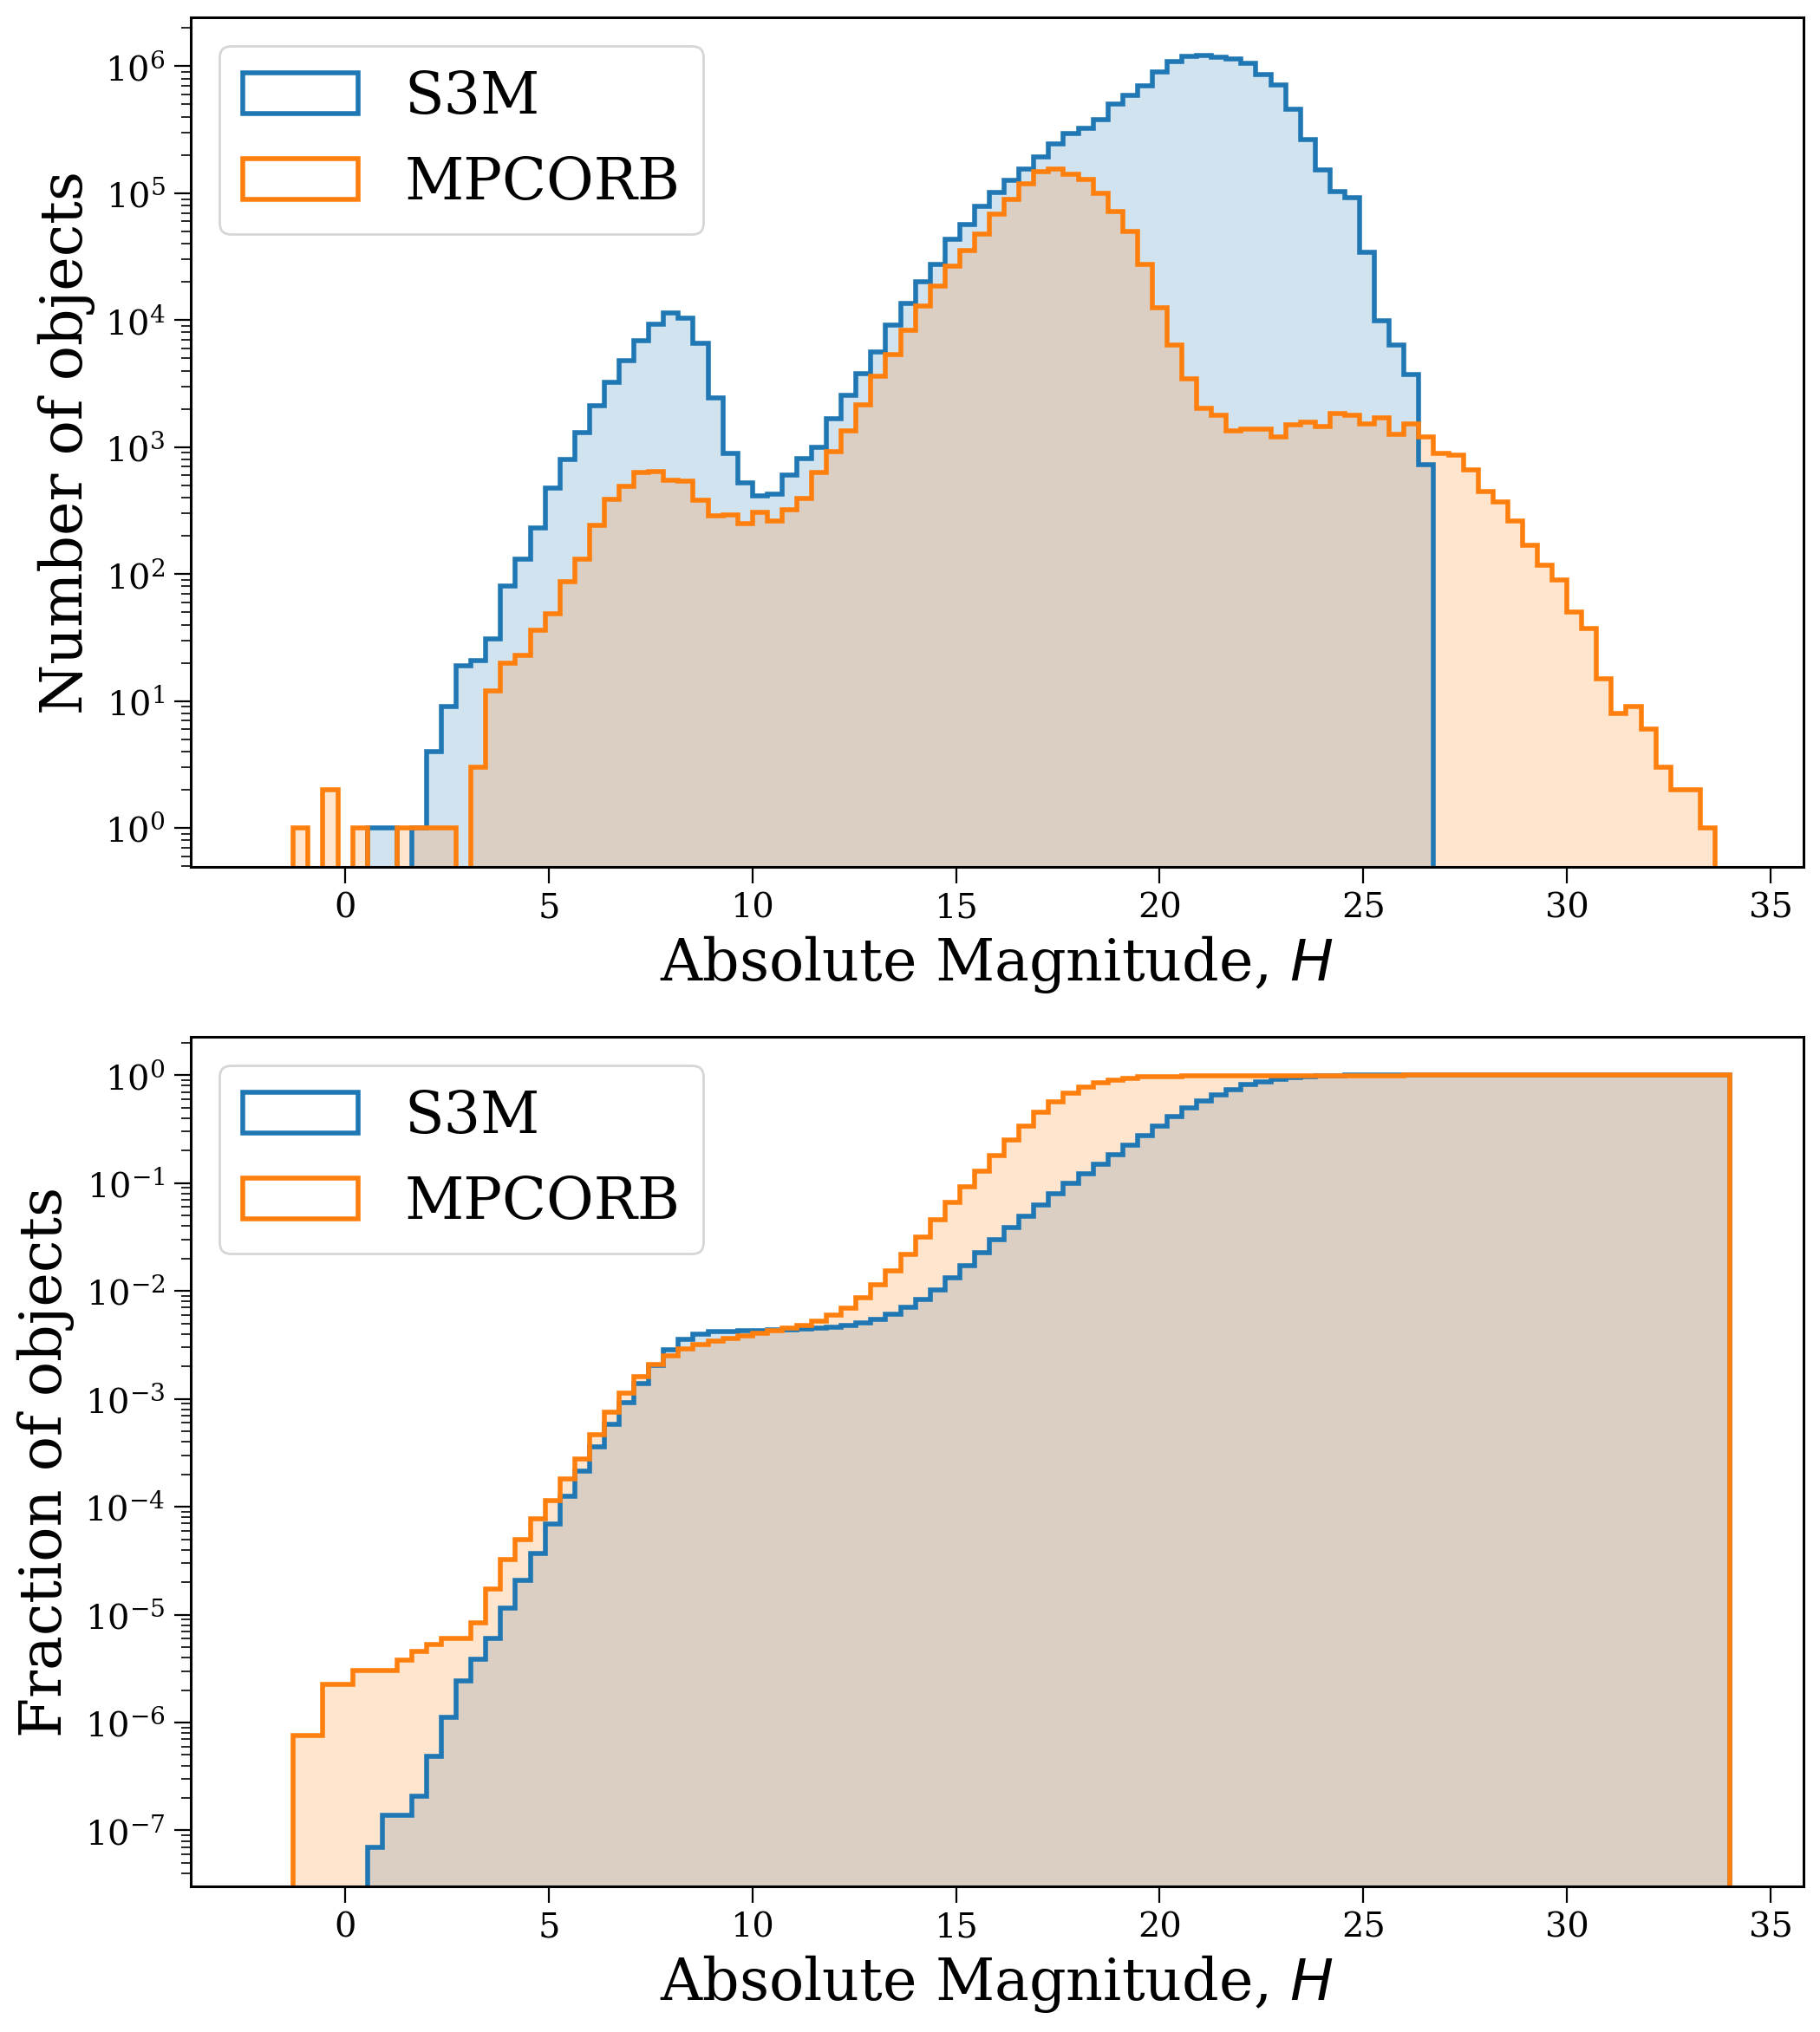

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(12, 14))


bins = np.linspace(-2, 34, 100)
bin_centres = bins[:-1] + (bins[1:] - bins[:-1]) / 2

s3m_h_hist, _  = np.histogram(s3m_abs_mag, bins=bins)
mpcorb_h_hist, _  = np.histogram(mpcorb["H"].values, bins=bins)

for ax, m in zip(axes, [False, True]):
    ax.hist(s3m_abs_mag, bins=bins, histtype="step", lw=2, label="S3M", cumulative=m, density=m)
    ax.hist(s3m_abs_mag, bins=bins, alpha=0.2, color="C0", cumulative=m, density=m)
    ax.hist(mpcorb["H"].values, bins=bins, histtype="step", lw=2, label="MPCORB", cumulative=m, density=m)
    ax.hist(mpcorb["H"].values, bins=bins, alpha=0.2, color="C1", cumulative=m, density=m)
    ax.set(xlabel=r"Absolute Magnitude, $H$", ylabel="Fraction of objects" if m else "Number of objects",
           yscale="log")
    ax.legend()
    
# axes[0].annotate("These new objects are \ninundating the NEOCP", xy=(0.61, 0.77), xytext=(0.95, 0.95),
#                  xycoords="axes fraction", ha="right", va="top",
#                  arrowprops=dict(arrowstyle="-|>", linewidth=2, color="black"), fontsize=0.6*fs)
    
plt.show()

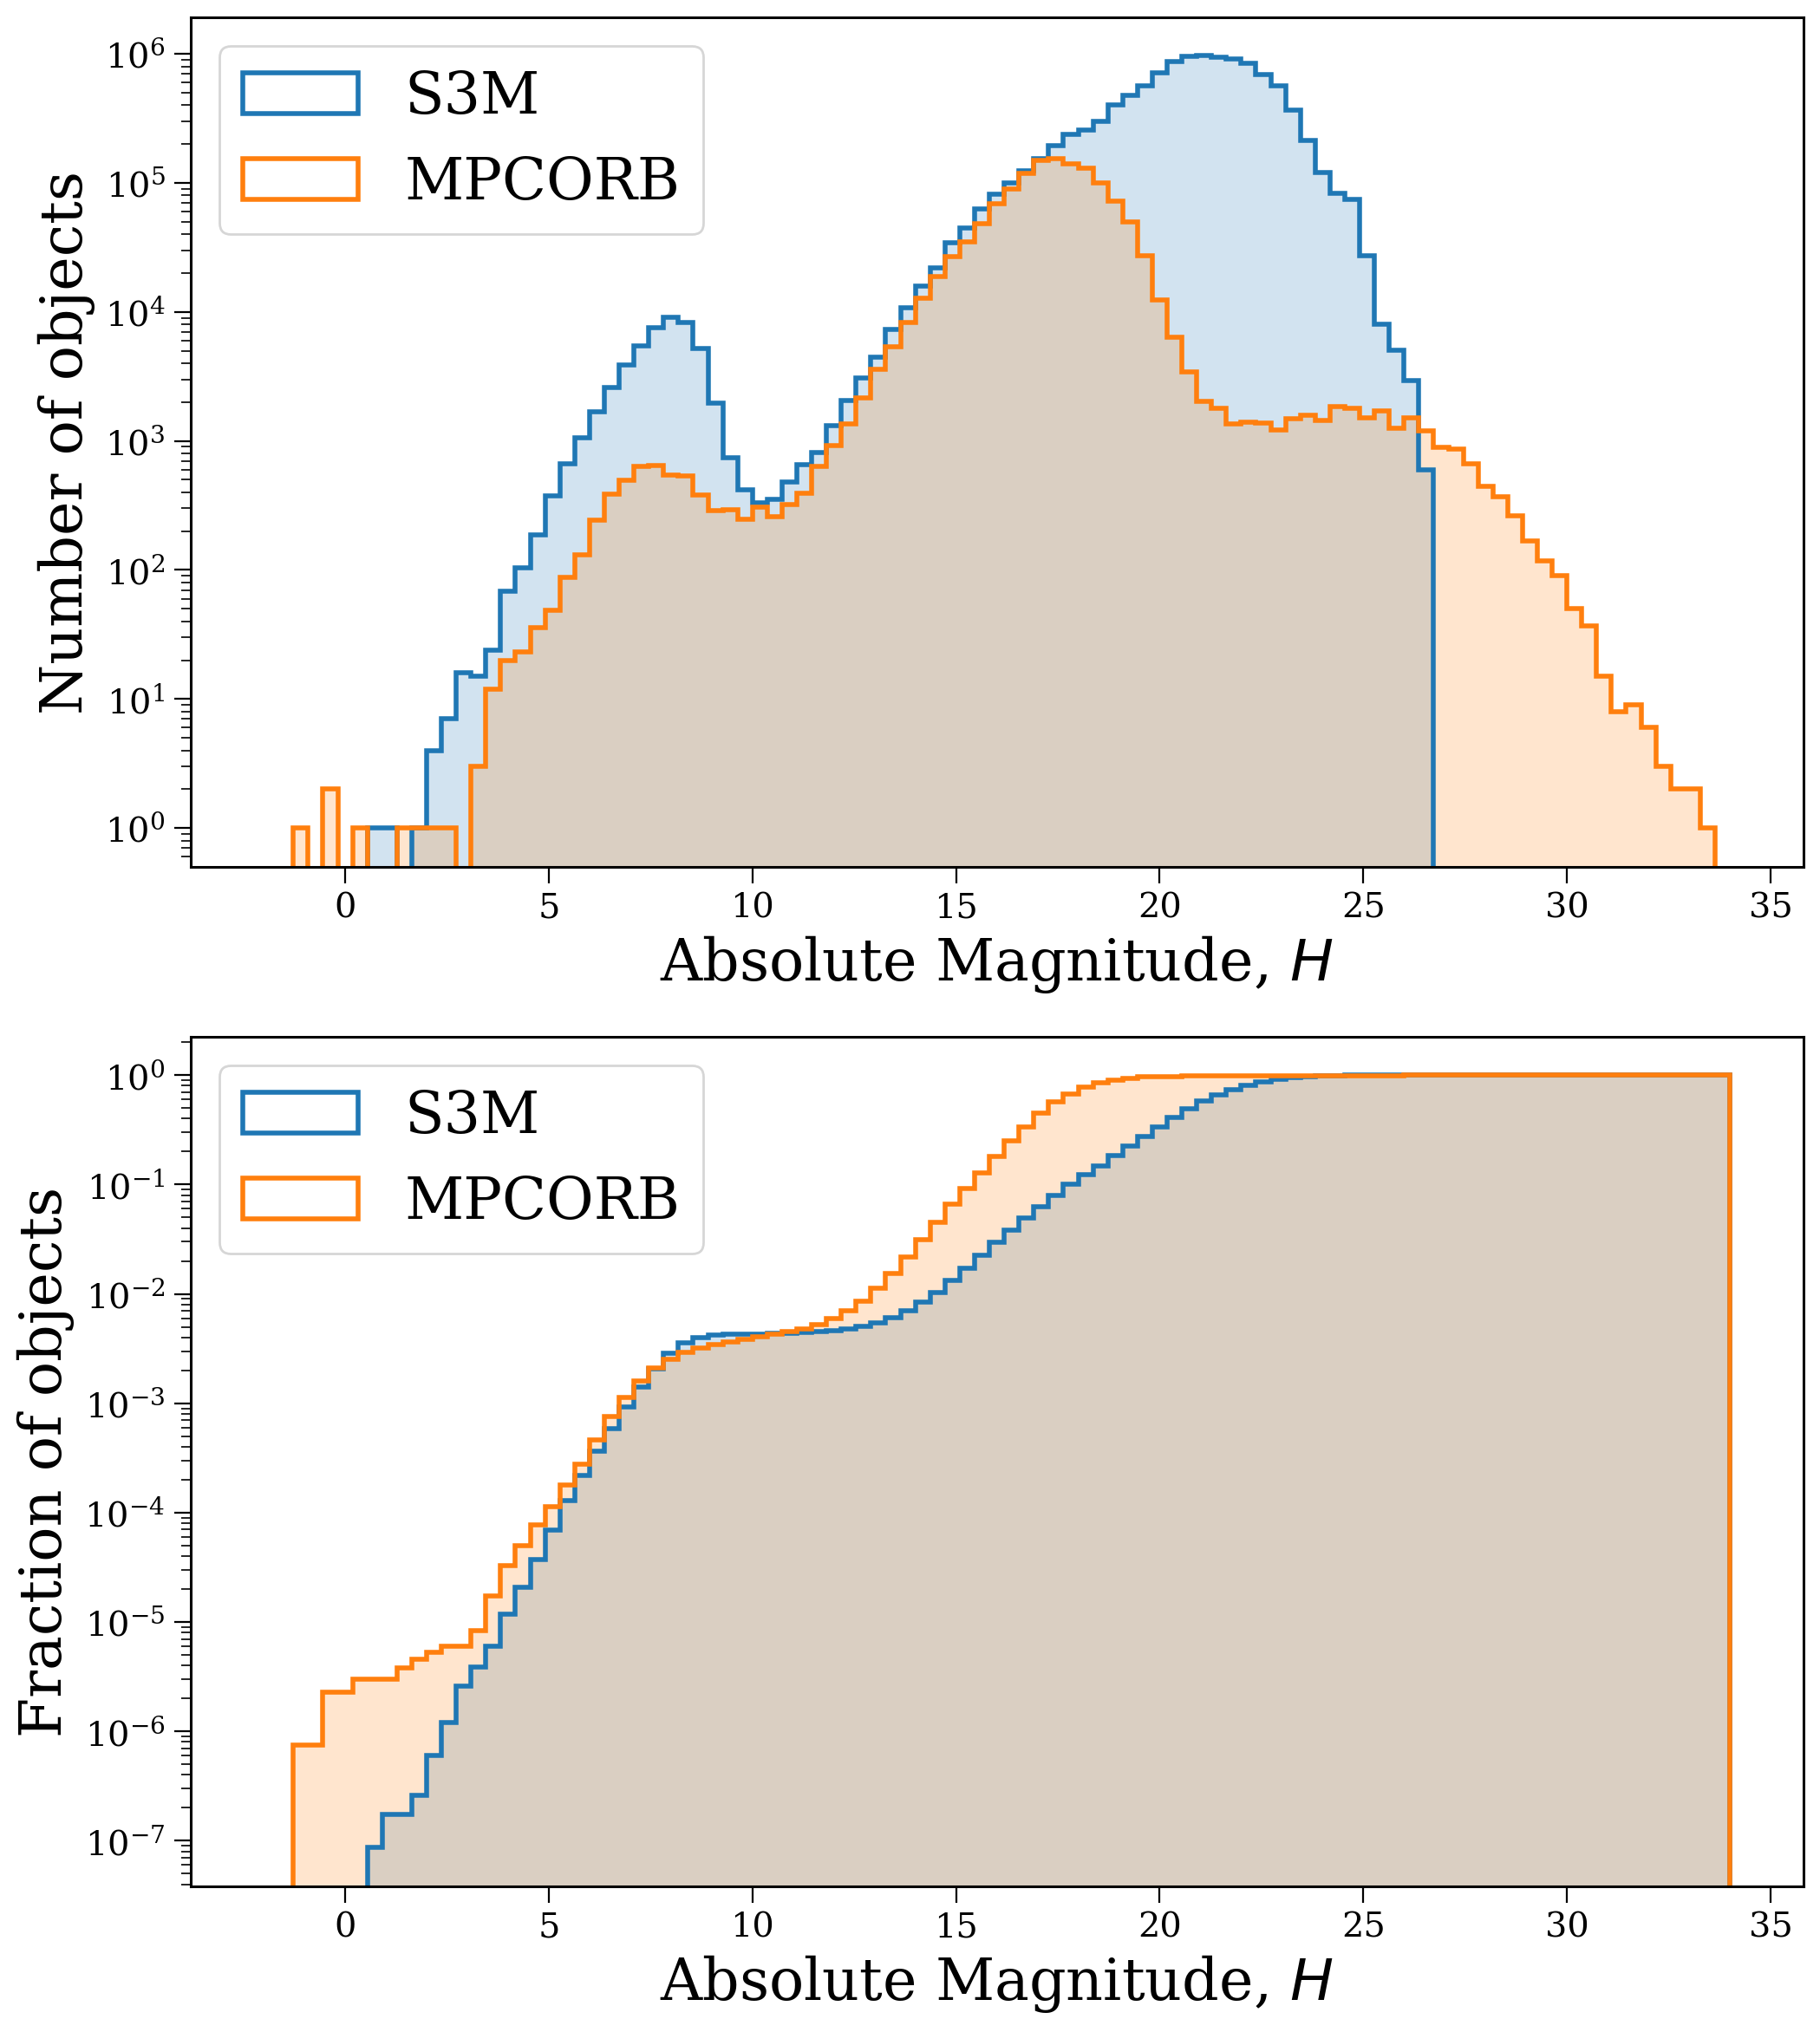

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(12, 14))


bins = np.linspace(-2, 34, 100)

for ax, m in zip(axes, [False, True]):
    ax.hist(cut_s3m["H"].values, bins=bins, histtype="step", lw=2, label="S3M", cumulative=m, density=m)
    ax.hist(cut_s3m["H"].values, bins=bins, alpha=0.2, color="C0", cumulative=m, density=m)
    ax.hist(mpcorb["H"].values, bins=bins, histtype="step", lw=2, label="MPCORB", cumulative=m, density=m)
    ax.hist(mpcorb["H"].values, bins=bins, alpha=0.2, color="C1", cumulative=m, density=m)
    ax.set(xlabel=r"Absolute Magnitude, $H$", ylabel="Fraction of objects" if m else "Number of objects",
           yscale="log")
    ax.legend()
    
plt.show()

# (Figure 1) Example night of observations

In [17]:
lon = coord.Angle(np.linspace(-180, 179.9, 1000)*u.degree)
lat = coord.Angle(np.zeros(1000)*u.degree)

ecliptic = coord.SkyCoord(lon=lon, lat=lat, frame='geocentrictrueecliptic').transform_to("icrs")
ecliptic.ra.radian = coord.Angle(ecliptic.ra).wrap_at('180d').radian

In [ ]:
47, 107, 205, 300

In [18]:
example_night = pd.read_hdf("../output/synthetic_obs/night_0047.h5")

In [19]:
import healpy as hp
from matplotlib.colors import LogNorm

# I edited this from this example: https://github.com/zonca/paperplots/blob/master/python/scripts/PlanckFig_map.py

nside = int(2**8)

ra = example_night["AstRA(deg)"].values
dec = example_night["AstDec(deg)"].values
ra, dec = np.radians(ra), np.radians(dec)
lat = np.pi / 2.0 - dec
hpids = hp.ang2pix(nside, lat, ra)

map_vals = np.zeros(hp.nside2npix(nside), dtype=float)
for idx in hpids:
    map_vals[idx] += 1

m = hp.ma(map_vals)

xsize = 2000
ysize = int(xsize/2)

theta = np.linspace(np.pi, 0, ysize)
phi   = np.linspace(-np.pi, np.pi, xsize)
longitude = np.radians(np.linspace(-180, 180, xsize))
latitude = np.radians(np.linspace(-90, 90, ysize))

# project the map to a rectangular matrix xsize x ysize
PHI, THETA = np.meshgrid(phi, theta)
grid_pix = hp.ang2pix(nside, THETA, PHI)

grid_map = m[grid_pix]

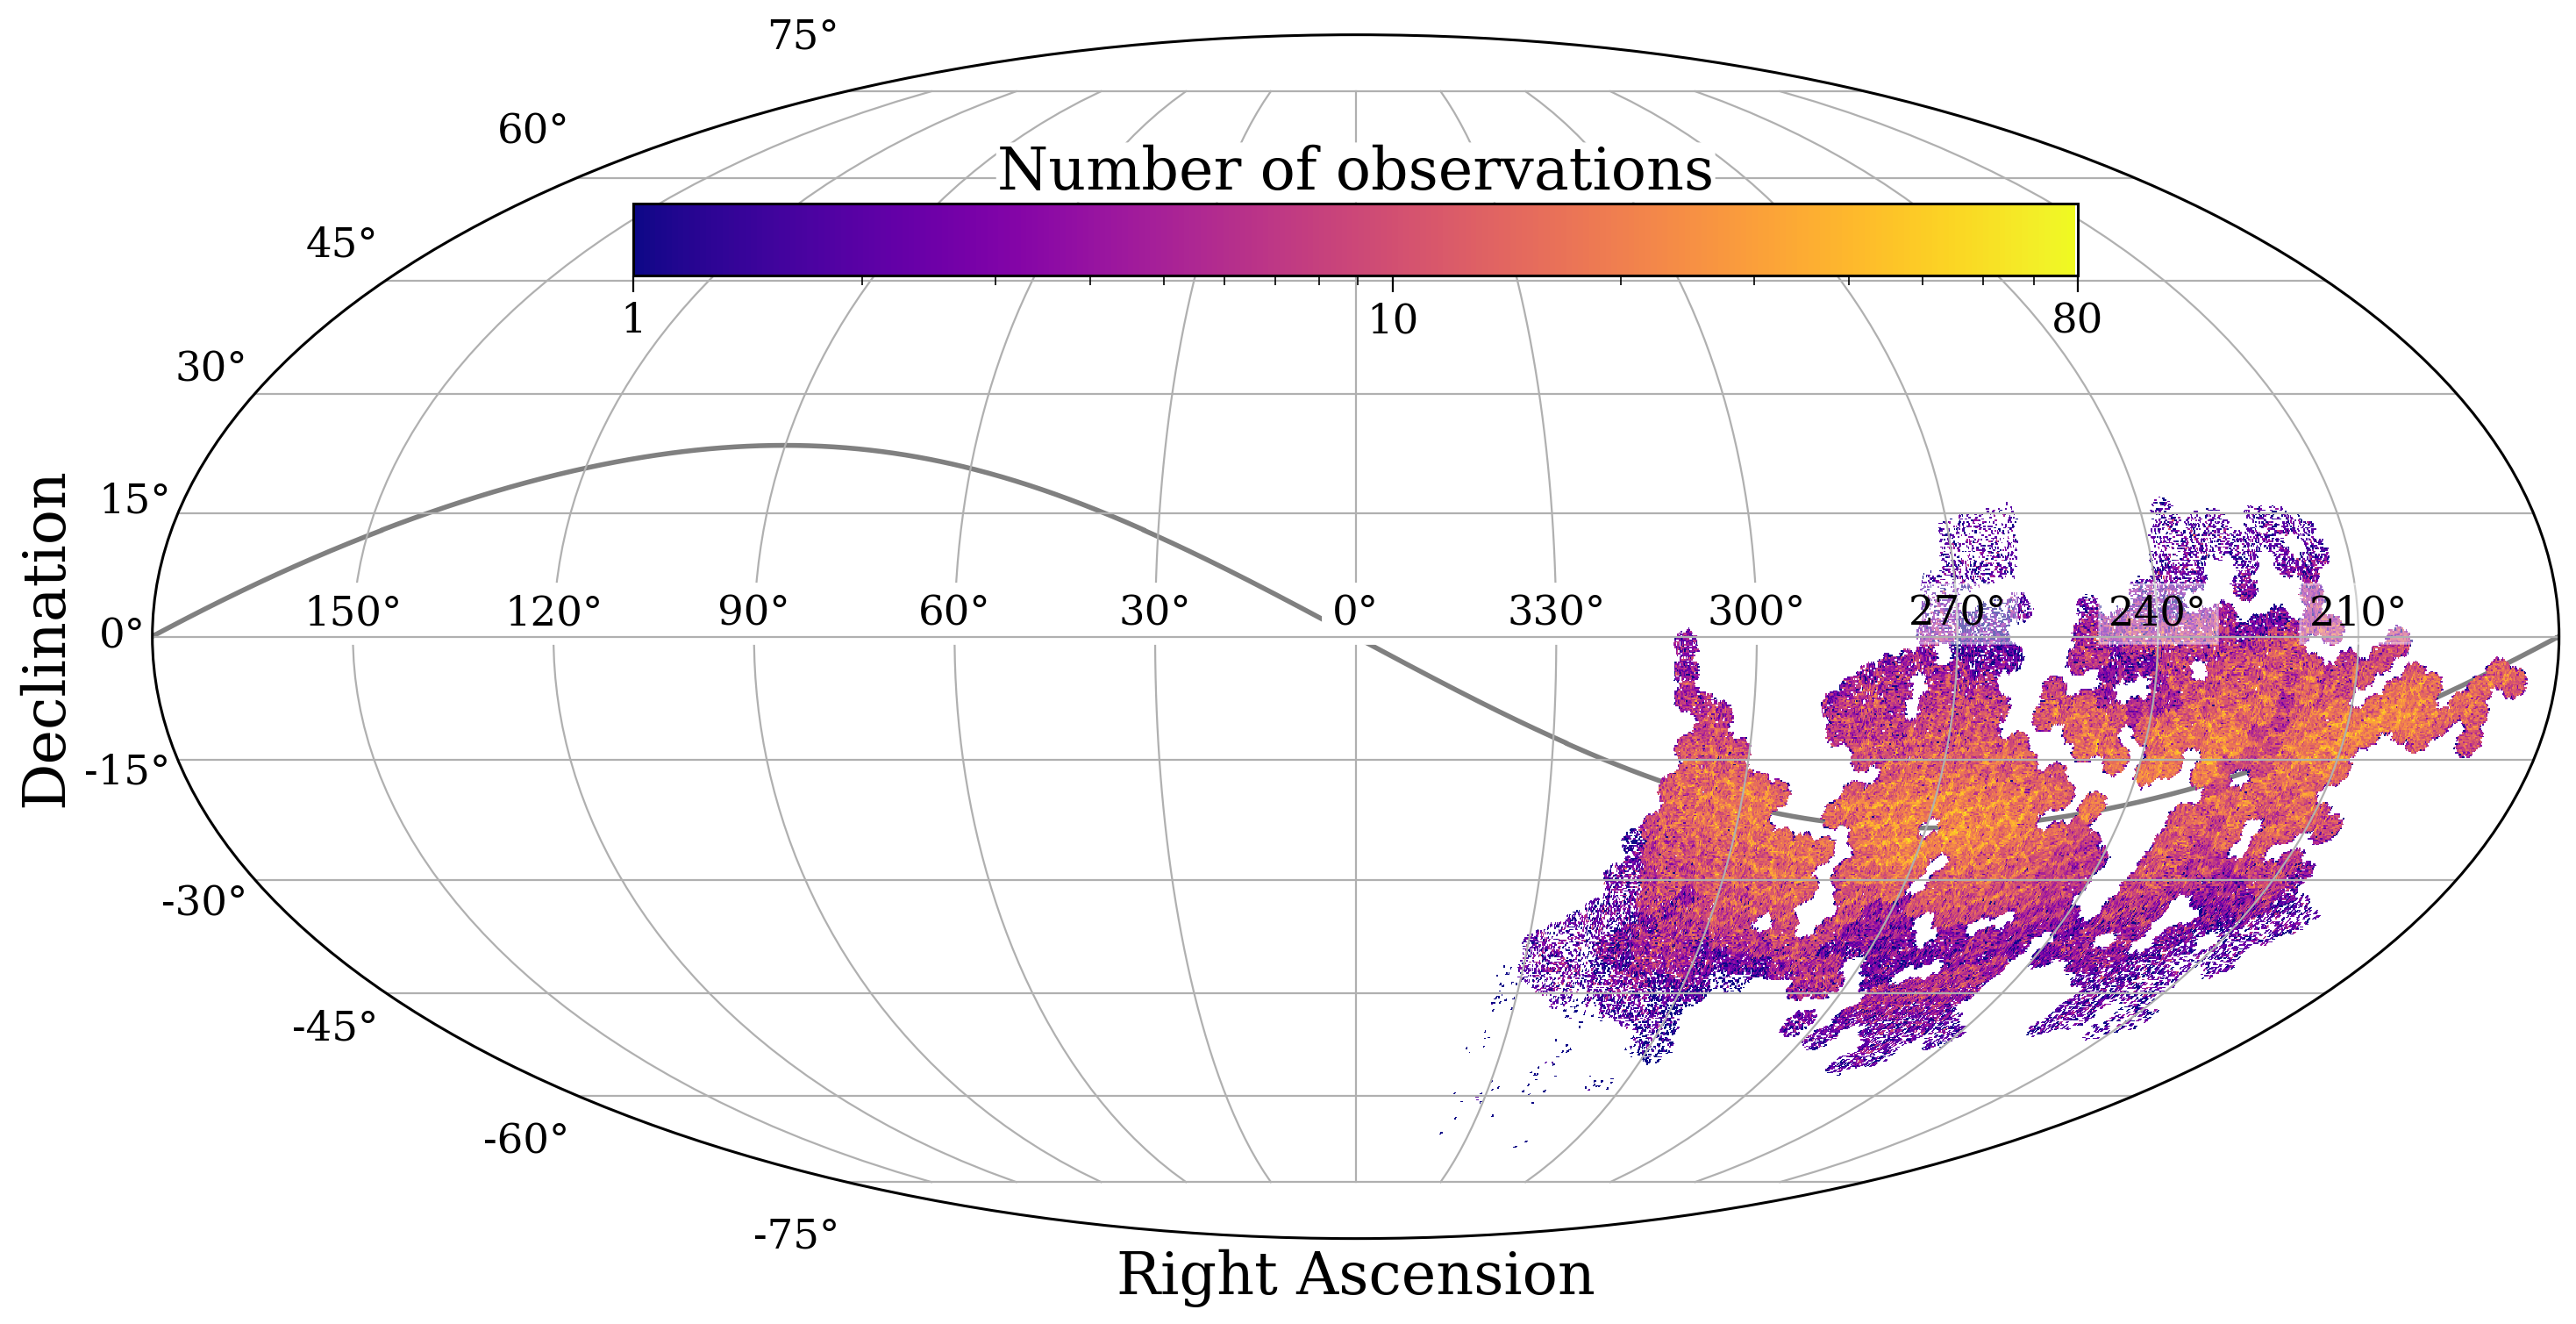

In [25]:
from matplotlib.projections.geo import GeoAxes

class ThetaFormatterShiftPi(GeoAxes.ThetaFormatter):
    """Shifts labelling by pi
    Shifts labelling from -180,180 to 0-360"""
    def __call__(self, x, pos=None):
        if x != 0:
            x *= -1
        if x < 0:
            x += 2*np.pi
        return GeoAxes.ThetaFormatter.__call__(self, x, pos)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='mollweide')

# flip longitude to the astro convention
image = plt.pcolormesh(longitude[::-1], latitude, grid_map, rasterized=True, cmap="plasma", norm=LogNorm())

# graticule
ax.set_longitude_grid(30)
ax.xaxis.set_major_formatter(ThetaFormatterShiftPi(30))

xticks = ax.xaxis.get_major_ticks()

ax.plot(ecliptic.ra.radian[::-1], ecliptic.dec.radian, color='grey', lw=2, zorder=-1)

# inset colorbar
inset_ax = ax.inset_axes([0.2, 0.8, 0.6, 0.06])
cb = fig.colorbar(image, orientation="horizontal", shrink=.6, pad=0.05, cax=inset_ax)#, ticks=[vmin, vmax])
inset_ax.set_title("Number of observations", fontsize=fs, bbox=dict(boxstyle="round", color="white", pad=0.0))
cb.ax.tick_params(labelsize=0.7*fs)
cb.solids.set_edgecolor("face")

cb.ax.set_xticks([1, 10, 80])
cb.ax.set_xticklabels(["1", "10", "80"])

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")

ax.tick_params(axis="x", labelsize=0.7*fs)
ax.tick_params(axis="y", labelsize=0.7*fs)

labels = ax.get_xticklabels()
for i in range(len(labels)):
    labels[i].set_backgroundcolor("white" if i < len(labels) - 3 else "#ffffff66")
    
# remove white space around figure
spacing = 0.01
plt.subplots_adjust(bottom=spacing, top=1-spacing, left=spacing, right=1-spacing)

plt.grid(True)

# annotation = ["Example night of LSST observations",
#               f"{len(example_night)} asteroids observed",
#               f"{example_night['ObjID'].str.startswith('S0').sum()}   NEOs observed"]
              
# ax.annotate('\n'.join(annotation), xy=(0.1, 0.25), xycoords="axes fraction", fontsize=0.7*fs,
#             bbox=dict(boxstyle="round", color="white", pad=0.0))

plt.savefig("../paper/figures/observations_example.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [20]:
len(example_night["ObjID"].unique())

419350

In [21]:
len(example_night)

780539

In [22]:
x = example_night[example_night["ObjID"].str.startswith("S0")]

In [23]:
len(x["ObjID"].unique())

1137

In [24]:
len(example_night), example_night["ObjID"].str.startswith("S0").sum()

(780539, 2073)

# (Figure 2) - Compare `digest2` performance

### Get scores by object type and traffic for different n_obs

In [29]:
delete_these_eight = []
for left, right in zip(list(np.arange(-2, 28 + 0.5, 0.5))[:-1], list(np.arange(-2, 28 + 0.5, 0.5))[1:]):
    matched = np.load("/epyc/projects/hybrid-sso-catalogs/catalogues/rescaled/output_0.8/matched_{}_{}.npy".format(left, right))
    delete_these_eight.extend(matched)

In [30]:
cut_s3m_masked = cut_s3m[~cut_s3m["id"].isin(delete_these_eight)]

In [26]:
df = pd.read_hdf(f"../output/synthetic_obs/filtered_night_{0:04d}_with_scores.h5")

In [42]:
grouped = df.groupby("hex_id").first()

In [59]:
def trim_s3m_obs(nights, path="../output/synthetic_obs/"):
    for night in nights:
        file_path = os.path.join(path, f"filtered_night_{night:04d}_with_scores.h5")
        if not os.path.isfile(file_path):
            continue
        df = pd.read_hdf(file_path)
        df = df[df["ObjID"].isin(cut_s3m_masked.index.values)]
        df.to_hdf(file_path.replace("scores", "scores_trimmed"), key="df")
        print(night)
trim_s3m_obs(range(366))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
15
16
17
19
20
21
22
26
27
32
33
34
36
37
45
46
47
48
49
50
52
53
54
56
57
58
59
60
61
62
65
66
67
68
69
70
71
72
74
75
76
77
78
79
80
81
82
83
85
86
87
88
90
91
93
94
100
101
102
104
105
106
107
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
133
134
135
136
137
138
139
140
141
142
143
144
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
290
291
292
293
294
295
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326


In [63]:
def get_traffic(nights, path="../output/synthetic_obs/", n_obs_list=[3, 3, 4, 5, 6], MAX_MAG=22):
    obj_types = ["neo", "mba", "centaur", "comet", "trojan", "tno", "sdo", "unknown"]
    traffic = {t: np.zeros((len(nights), len(n_obs_list)), dtype=int) for t in obj_types}
    
    scores, types = [], []
    
    for night in nights:
        file_path = os.path.join(path, f"filtered_night_{night:04d}_with_scores_trimmed.h5")
        if not os.path.isfile(file_path):
            continue
        df = pd.read_hdf(file_path)
        
        ot = np.repeat("unknown", len(df))
        for start, obj_type in zip(["S0", "S1", "CEN", "SL", "St5", "ST", "SS"],
                                   ["neo", "mba", "centaur", "comet", "trojan", "tno", "sdo"]):
            ot[df["ObjID"].str.startswith(start)] = obj_type
        df["obj_type"] = ot

        df["v_mag"] = magnitudes.convert_colour_mags(df["observedTrailedSourceMag"].values, out_colour="V",
                                                     in_colour=df["optFilter"].values)

        grouped = df.groupby("hex_id").first()
        grouped["max_v_mag"] = df.groupby("hex_id")["v_mag"].max()
        grouped = grouped[grouped["max_v_mag"].values <= MAX_MAG]
        
        scores = np.concatenate((scores, grouped["scores"].values))
        types = np.concatenate((types, grouped["obj_type"].values))

        # remove trailed NEOs and low scores
        df = df[(df["ang_vel"] < 1.5) & (df["scores"] >= 65)]

        # group on object ID and save faintest observation
        grouped = df.groupby("hex_id").first()
        grouped["max_v_mag"] = df.groupby("hex_id")["v_mag"].max()

        # create a mask for magnitudes
        mag_mask = grouped["max_v_mag"].values <= MAX_MAG

        # check for each object type
        for obj in obj_types:
            obj_mask = (grouped["obj_type"] == obj)
            
            # if there's at least one observation
            if obj_mask.sum() > 0:
                traffic[obj][night, 0] = ((grouped["n_obs"] >= 3) & obj_mask).sum()
                
                for i, n_obs in enumerate(n_obs_list[1:]):
                    full_mask = (grouped["n_obs"] >= n_obs) & mag_mask
                    this_traffic = (full_mask & obj_mask).sum()
                    
                    # no need to check later n_obs if this one is 0
                    if this_traffic == 0:
                        break
                    traffic[obj][night, i + 1] = this_traffic
                    
        print(night)
    return traffic, scores, types

In [48]:
%%time
traffic, scores, types = get_traffic(range(366), MAX_MAG=22)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
15
16
17
19
20
21
22
26
27
32
33
34
36
37
45
46
47
48
49
50
52
53
54
56
57
58
59
60
61
62
65
66
67
68
69
70
71
72
74
75
76
77
78
79
80
81
82
83
85
86
87
88
90
91
93
94
100
101
102
104
105
106
107
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
133
134
135
136
137
138
139
140
141
142
143
144
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
290
291
292
293
294
295
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326


In [66]:
%%time
traffic_21, scores_21, types_21 = get_traffic(range(366), MAX_MAG=21)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
15
16
17
19
20
21
22
26
27
32
33
34
36
37
45
46
47
48
49
50
52
53
54
56
57
58
59
60
61
62
65
66
67
68
69
70
71
72
74
75
76
77
78
79
80
81
82
83
85
86
87
88
90
91
93
94
100
101
102
104
105
106
107
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
133
134
135
136
137
138
139
140
141
142
143
144
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
290
291
292
293
294
295
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326


In [50]:
%%time
traffic_215, scores_215, types_215 = get_traffic(range(366), MAX_MAG=21.5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
15
16
17
19
20
21
22
26
27
32
33
34
36
37
45
46
47
48
49
50
52
53
54
56
57
58
59
60
61
62
65
66
67
68
69
70
71
72
74
75
76
77
78
79
80
81
82
83
85
86
87
88
90



KeyboardInterrupt



In [600]:
def compare_hists(scores, types, label, ylabel,
                  bins="fd", density="both", figsize=(8, 16),
                  colours = {
                      "neo": list(plt.get_cmap("tab10")(1)),
                      "mba": list(plt.get_cmap("tab10")(4))
                  },
                  save_plot=None):
    
    bad = np.isnan(scores)
    scores = scores[~bad]
    types = types[~bad]
    neo_obs = scores[types == "neo"]
    mba_obs = scores[types == "mba"]
    
    neo_hist, var_bins = np.histogram(neo_obs, bins=bins, density=False)
    mba_hist, var_bins = np.histogram(mba_obs, bins=var_bins, density=False)

    handles = [Patch(facecolor=colours["neo"][:-1] + [0.2],
                         edgecolor=colours["neo"],
                         label="NEOs", lw=3),
               Patch(facecolor=colours["mba"][:-1] + [0.2],
                         edgecolor=colours["mba"],
                         label="MBAs", lw=3)]
    
    def _hists(ax, dens):
        ax.hist(neo_obs, bins=var_bins, density=dens, label="NEOs", facecolor=colours["neo"][:-1] + [0.2], lw=3)
        ax.hist(neo_obs, bins=var_bins, density=dens, color=colours["neo"], histtype="step", lw=3)

        ax.hist(mba_obs, bins=var_bins, density=dens, label="MBAs", facecolor=colours["mba"][:-1] + [0.2], lw=3)
        ax.hist(mba_obs, bins=var_bins, density=dens, color=colours["mba"], histtype="step", lw=3)
        ax.legend(handles=handles, loc="upper center", ncol=2, fontsize=0.8 * fs)

        if dens:
            ax.set_ylabel(r"$\mathrm{d}N/\mathrm{d}$" + ylabel)
        else:
            ax.set_yscale("log")
            ax.set_ylabel("Number of objects")
    
    if density == "both":
        fig, axes = plt.subplots(3, 1, figsize=figsize, gridspec_kw={"height_ratios": [2, 2, 1]}, sharex=True)
        for ax, dens in zip(axes[:-1], [True, False]):
            _hists(ax, dens)
    else:
        fig, axes = plt.subplots(2, 1, figsize=figsize, gridspec_kw={"height_ratios": [2, 1]}, sharex=True)
        _hists(axes[0], density)
    
    centres = (var_bins[1:] + var_bins[:-1]) / 2
    axes[-1].plot(centres[mba_hist > 0], neo_hist[mba_hist > 0] / mba_hist[mba_hist > 0], marker="o")
    centres = (var_bins[1:] + var_bins[:-1]) / 2
    axes[-1].scatter(centres[mba_hist <= 0],
                     np.repeat(max(neo_hist[mba_hist > 0] / mba_hist[mba_hist > 0]), (mba_hist <= 0).sum()),
                     marker=r"$\infty$", color="tab:blue", zorder=10)
    axes[-1].set_yscale("log")
    axes[-1].set_xlabel(label)
    axes[-1].set_ylabel(r"$N_{\rm NEO}/N_{\rm MBA}$")
    axes[-1].grid()
    
    if np.any(neo_hist[mba_hist > 0] / mba_hist[mba_hist > 0] >= 1.0):
        axes[-1].axhline(1.0, linestyle="dotted", color="grey")
        
    for ax in axes[:-1]:
        ax.xaxis.set_tick_params(which='both', labelbottom=True)
        
    axes[0].annotate("a", xy=(0.02, 0.98), xycoords="axes fraction", fontsize=0.5*fs, va="top",
                     bbox=dict(boxstyle="circle", facecolor="lightgrey", edgecolor="none"))
    axes[1].annotate("b", xy=(0.98, 0.98), xycoords="axes fraction", fontsize=0.5*fs, va="top", ha="right",
                     bbox=dict(boxstyle="circle", facecolor="lightgrey", edgecolor="none"))
    axes[2].annotate("c", xy=(0.02, 0.96), xycoords="axes fraction", fontsize=0.5*fs, va="top",
                     bbox=dict(boxstyle="circle", facecolor="lightgrey", edgecolor="none"))    
        
    if save_plot is not None:
        plt.savefig(save_plot, format="pdf", bbox_inches="tight")

    plt.show()

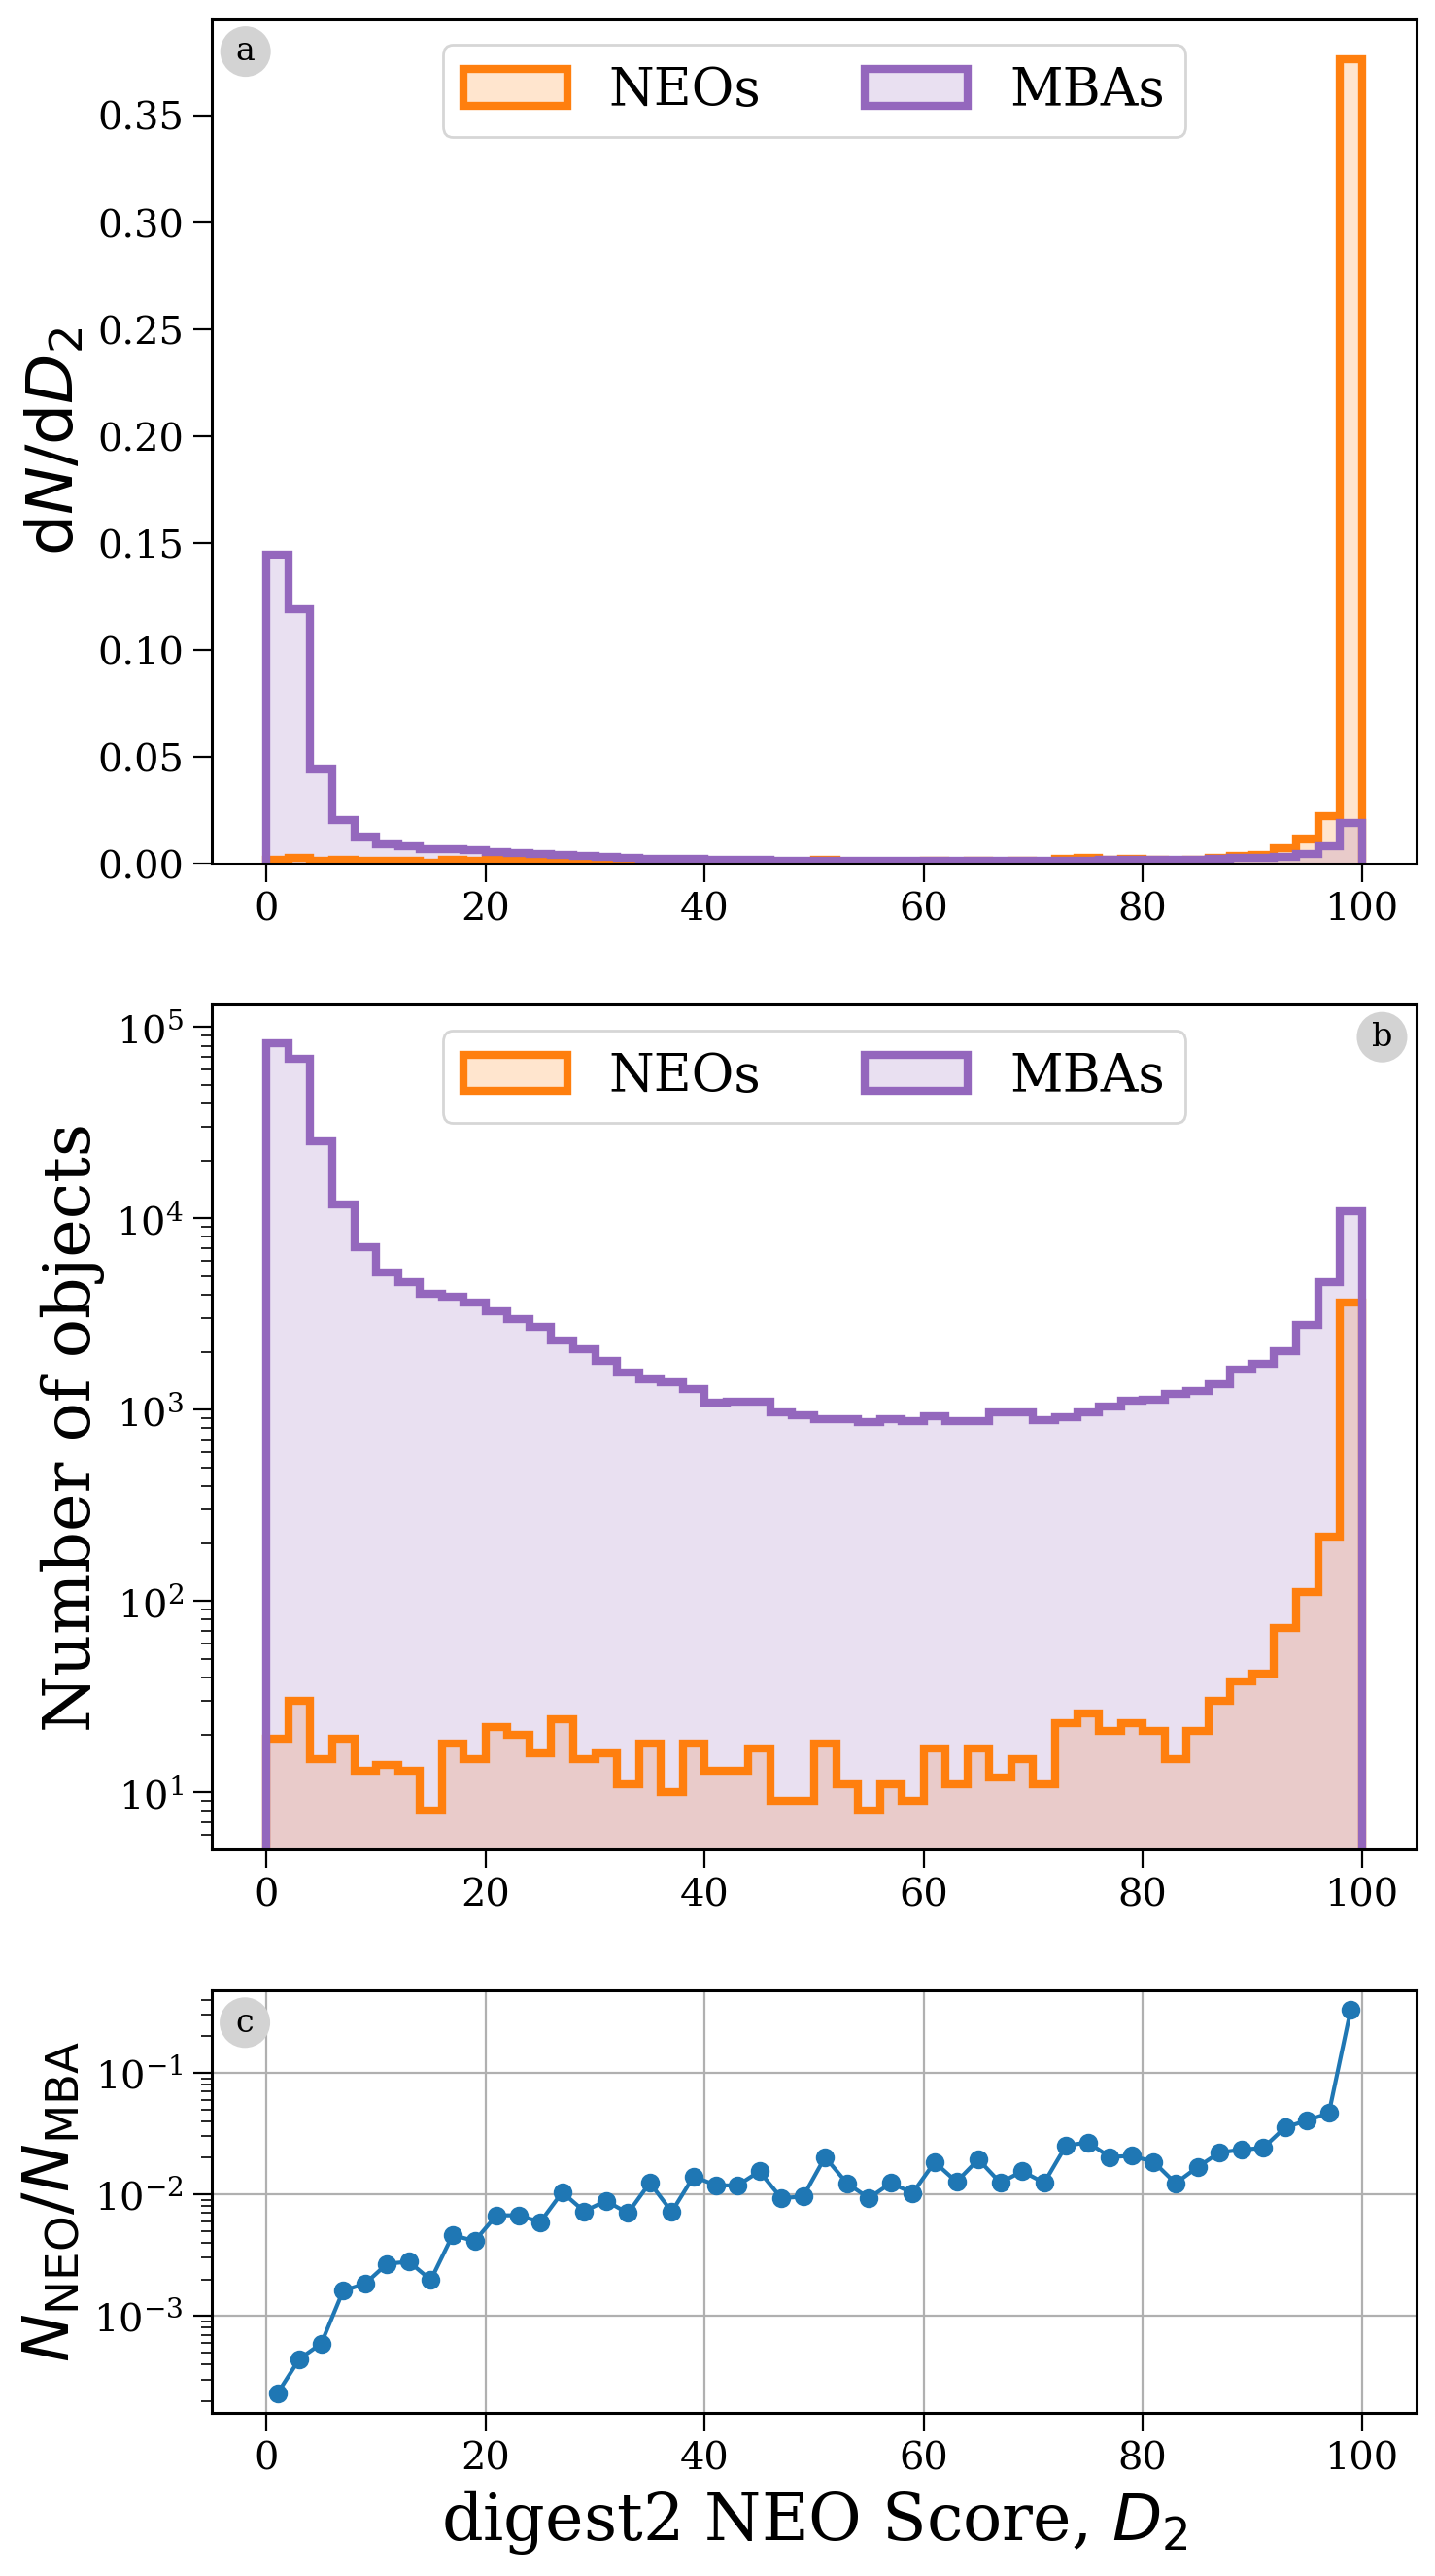

In [601]:
compare_hists(scores, types, r"digest2 NEO Score, $D_2$", r"$D_2$", density="both",
              bins=np.linspace(0, 100, 51), figsize=(8, 16),
              save_plot="../paper/figures/digest2_pollution.pdf")

# (Figure 3) NEOCP Traffic and Purity using current criteria

In [70]:
nights = np.arange(366)
n_obs_list = [3, 4, 5, 6]

In [75]:
def weekly_mean(x, bad_weather, size=3):
    y = np.repeat(np.nan, len(x))
    for i in range(len(x)):
        if i not in bad_weather:
            inds = np.arange(max(0, i - size), min(i + size + 1, len(x)))
            inds = inds[~np.isin(inds, bad_weather)]
            y[i] = np.nanmean(x[inds])
    return y

In [167]:
def traffic_purity_plot(traffic, smoothing_window=10, lw=3, fig=None, axes=None, show=True):
    if fig is None or axes is None:
        fig, axes = plt.subplots(2, 1, figsize=(12, 10))
        fig.subplots_adjust(hspace=0.05)

    total_traffic = traffic["neo"] + traffic["mba"]
    bad_weather = nights[total_traffic[:, 0] == 0]
    purity = traffic["neo"] / total_traffic
        
    colours = [plt.get_cmap("viridis", len(n_obs_list) + 2)(i + 1) for i in range(len(n_obs_list))]

    for i in range(len(n_obs_list)):
        t = weekly_mean(total_traffic.T[i + 1], bad_weather, size=smoothing_window)
        axes[0].plot(nights, t, color=colours[i], lw=3, marker="o", markersize=np.sqrt(3))


    t = weekly_mean(total_traffic.T[0], bad_weather, size=smoothing_window)
    axes[0].plot(nights, t, color=colours[0], lw=1, linestyle="--")

    axes[0].set_ylabel("Traffic")
    axes[0].set_yscale("log")

    axes[1].plot(nights, weekly_mean(purity.T[0], bad_weather, size=smoothing_window),
                 color=colours[0], lw=1, linestyle="--")
    for i in range(len(n_obs_list)):
        axes[1].plot(nights, weekly_mean(purity.T[i + 1], bad_weather, size=smoothing_window),
                     label=fr"$N_{{\rm obs}} \geq$ {n_obs_list[i]}",
                     color=colours[i], lw=3)

    # axes[1].set_yscale("log")
    axes[1].set_xlabel("Night")
    axes[1].set_ylabel("Purity")

    leg = axes[1].legend(loc="lower left", ncol=2, fontsize=0.65*fs)#, bbox_to_anchor=(0.3, 1))
    # for legobj in leg.legendHandles:
    #     legobj.set_linewidth(5.0)

    labels = ["May", "June", "July", "August", "September", "October", "November",
              "December", "January", "February", "March", "April", "May"]
    labels_short = [label[:3] for label in labels]
    days = [0 for label in labels]
    for i, month in enumerate(range(3, 16)):
        act_month, year = month % 12, month // 12
        if act_month == 0:
            act_month = 12
            year = 0
        days[i] = (date(2022 + year, act_month, 1) - date(2022, 3, 1)).days


    axes[0].xaxis.tick_top()
    axes[0].xaxis.set_label_position('top') 

    axes[0].set_xticks(days)
    axes[0].set_xticklabels(labels_short, rotation=45)

    for ax in axes:
        ax.set_xlim(0, 365)
        ax.grid(axis="y")

        # loop over every day of bad weather
        i = 0
        while i < len(bad_weather):
            # if this is not the last entry and the subsequent entry is a contiguous block of nights
            if i < len(bad_weather) - 1 and bad_weather[i + 1] - bad_weather[i] == 1:
                # track the lower edge of the bad weather gap
                gap_low = bad_weather[i]
                i += 1
                while bad_weather[i] - bad_weather[i - 1] == 1 and i < len(bad_weather) - 1:
                    i += 1
                gap_high = bad_weather[i - 1]

                ax.axvspan(gap_low, gap_high, color="grey", alpha=0.1)
            else:
                ax.axvline(bad_weather[i], color="grey", alpha=0.1)
                i += 1

    axes[0].axhline(20, color="grey", linestyle="--", lw=1)
    axes[0].annotate("Current NEOCP average traffic", xy=(3, 18), ha="left", va="top", color="grey", zorder=10)

    # plt.savefig("../paper/figures/traffic_purity.pdf", format="pdf", bbox_inches="tight")

    if show:
        plt.show()
        
    return fig, axes

/tmp/ipykernel_71031/1497929327.py:8: RuntimeWarning: invalid value encountered in true_divide
  purity = traffic["neo"] / total_traffic


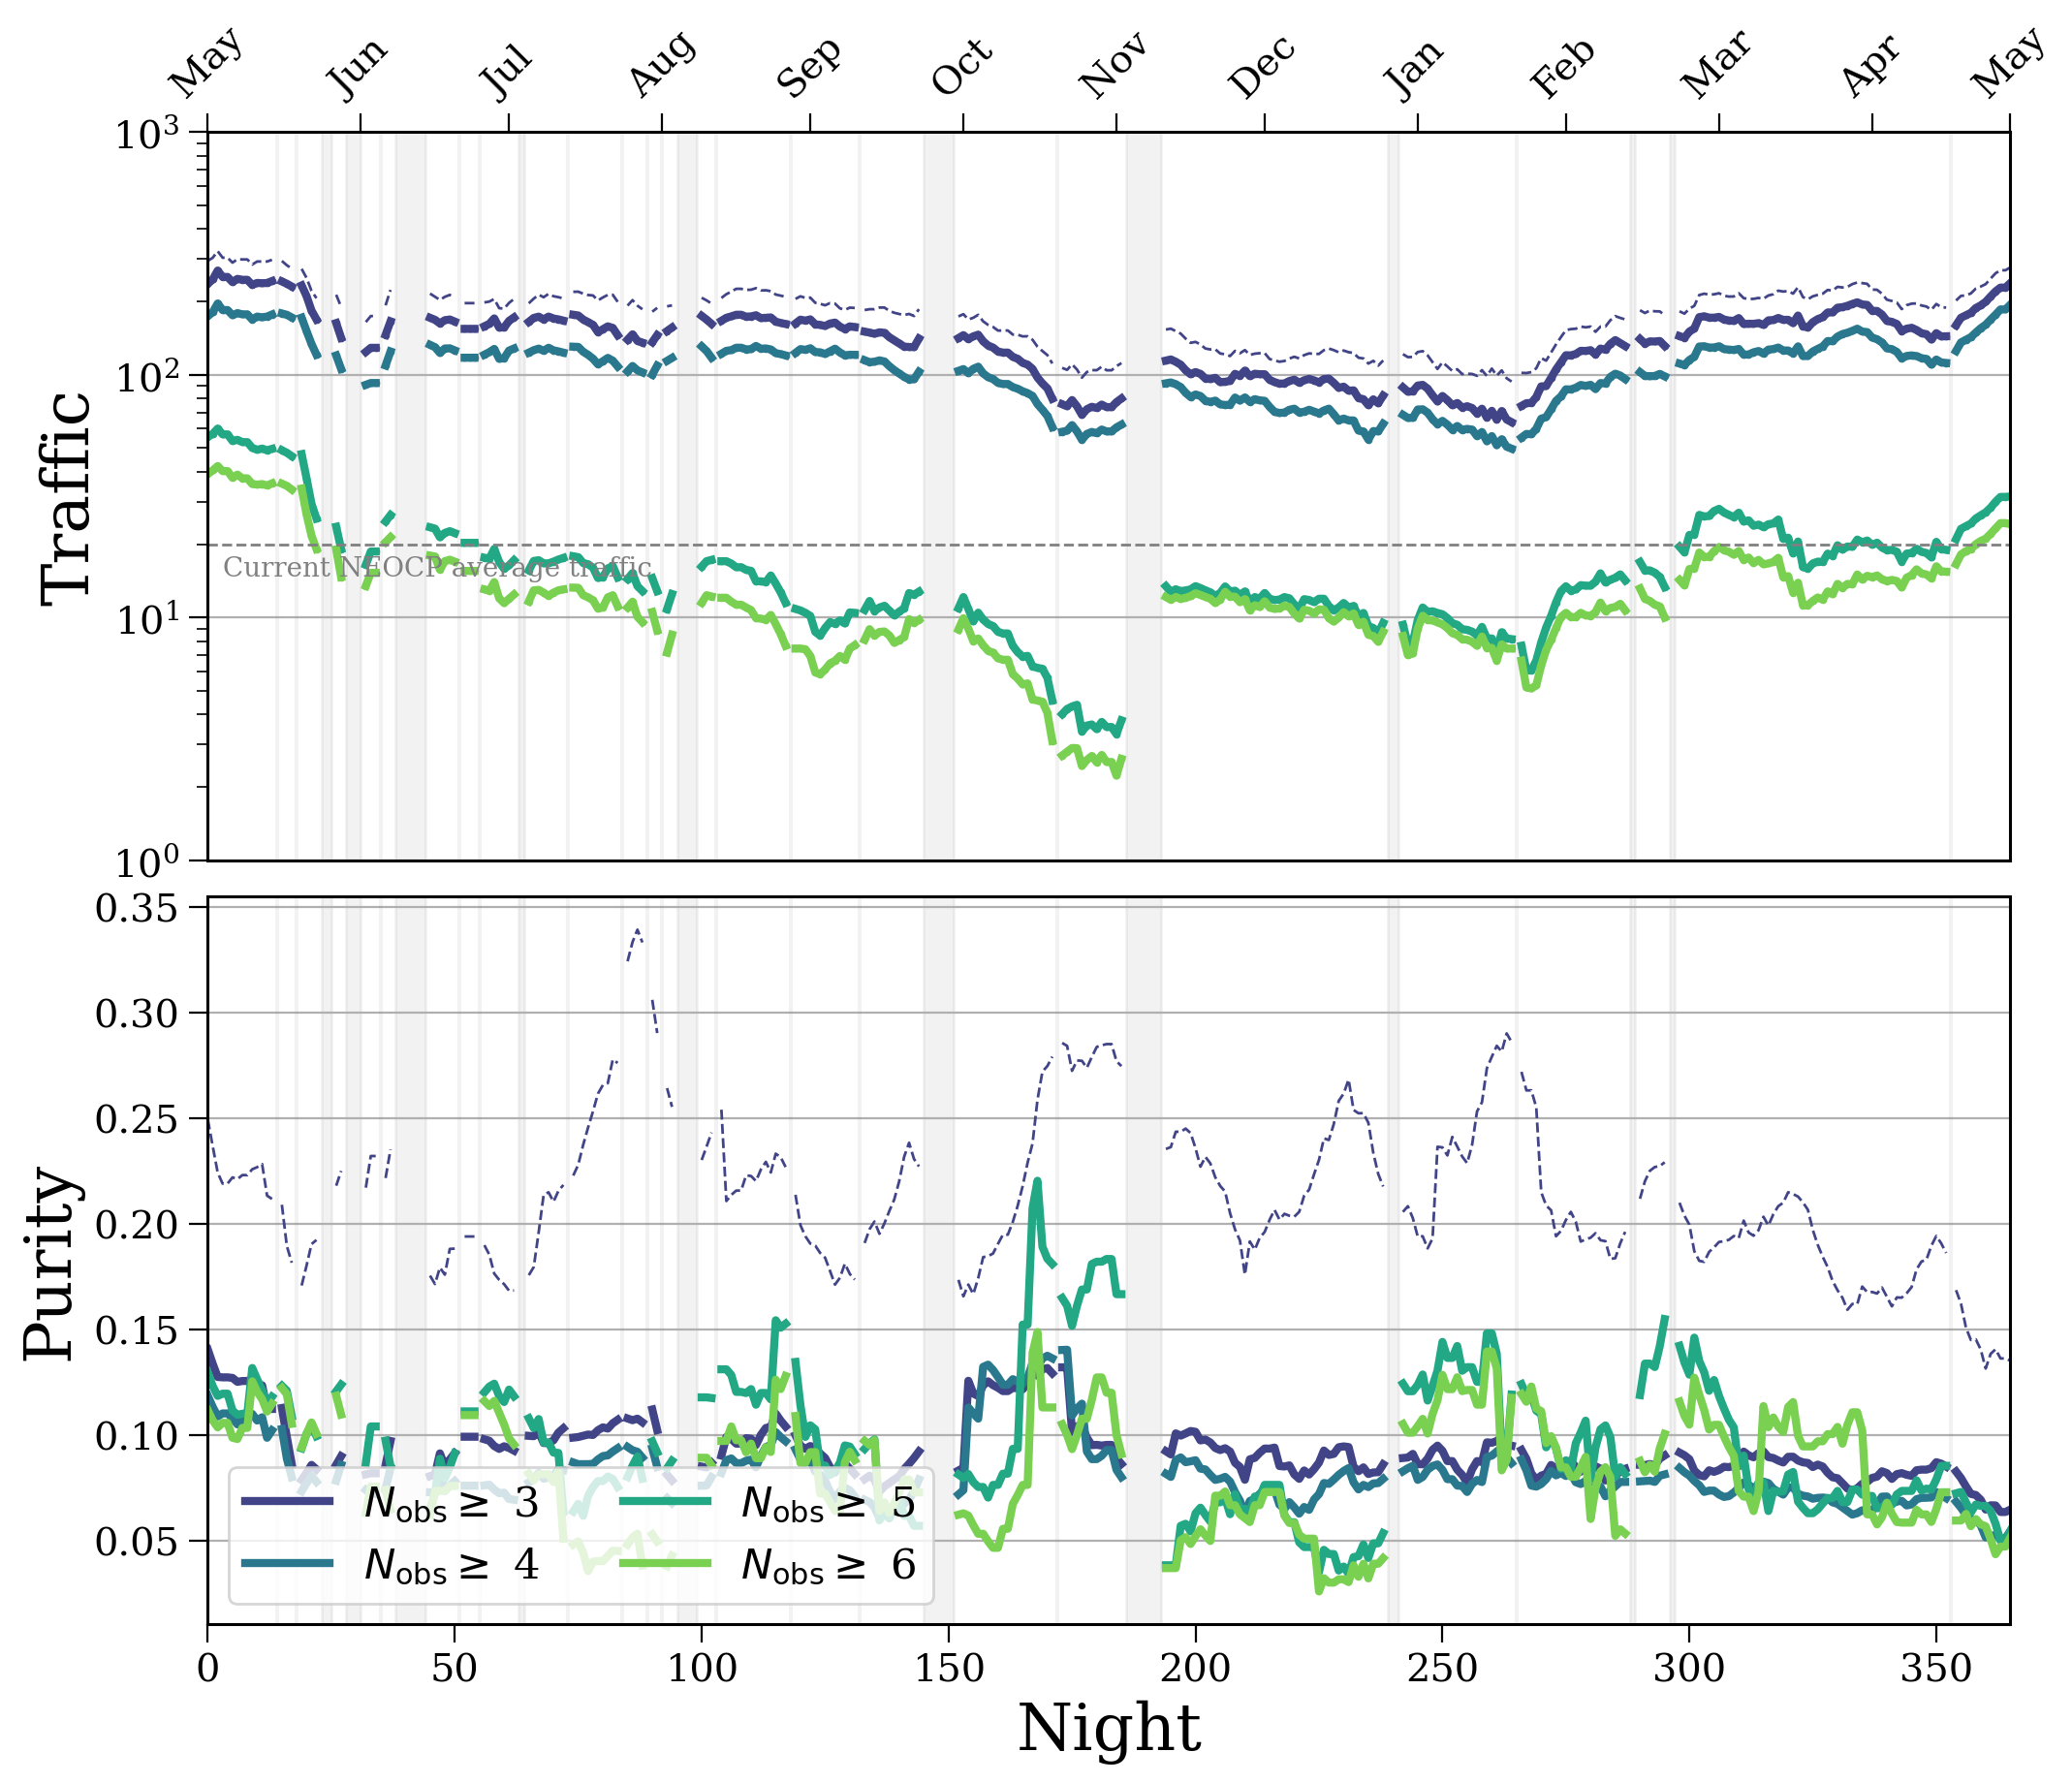

In [166]:
fig, axes = traffic_purity_plot(traffic, show=False)
axes[0].set_ylim((1e0, 1e3))
plt.show()

# Magnitudes of NEOs

In [293]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [339]:
total_traffic_unfindable.sum(axis=0)

array([50965, 15845, 11996,  1940,  1483])

In [342]:
neo_counts_unfindable.sum(axis=0)

array([2248,  375,  271,   43,   35])

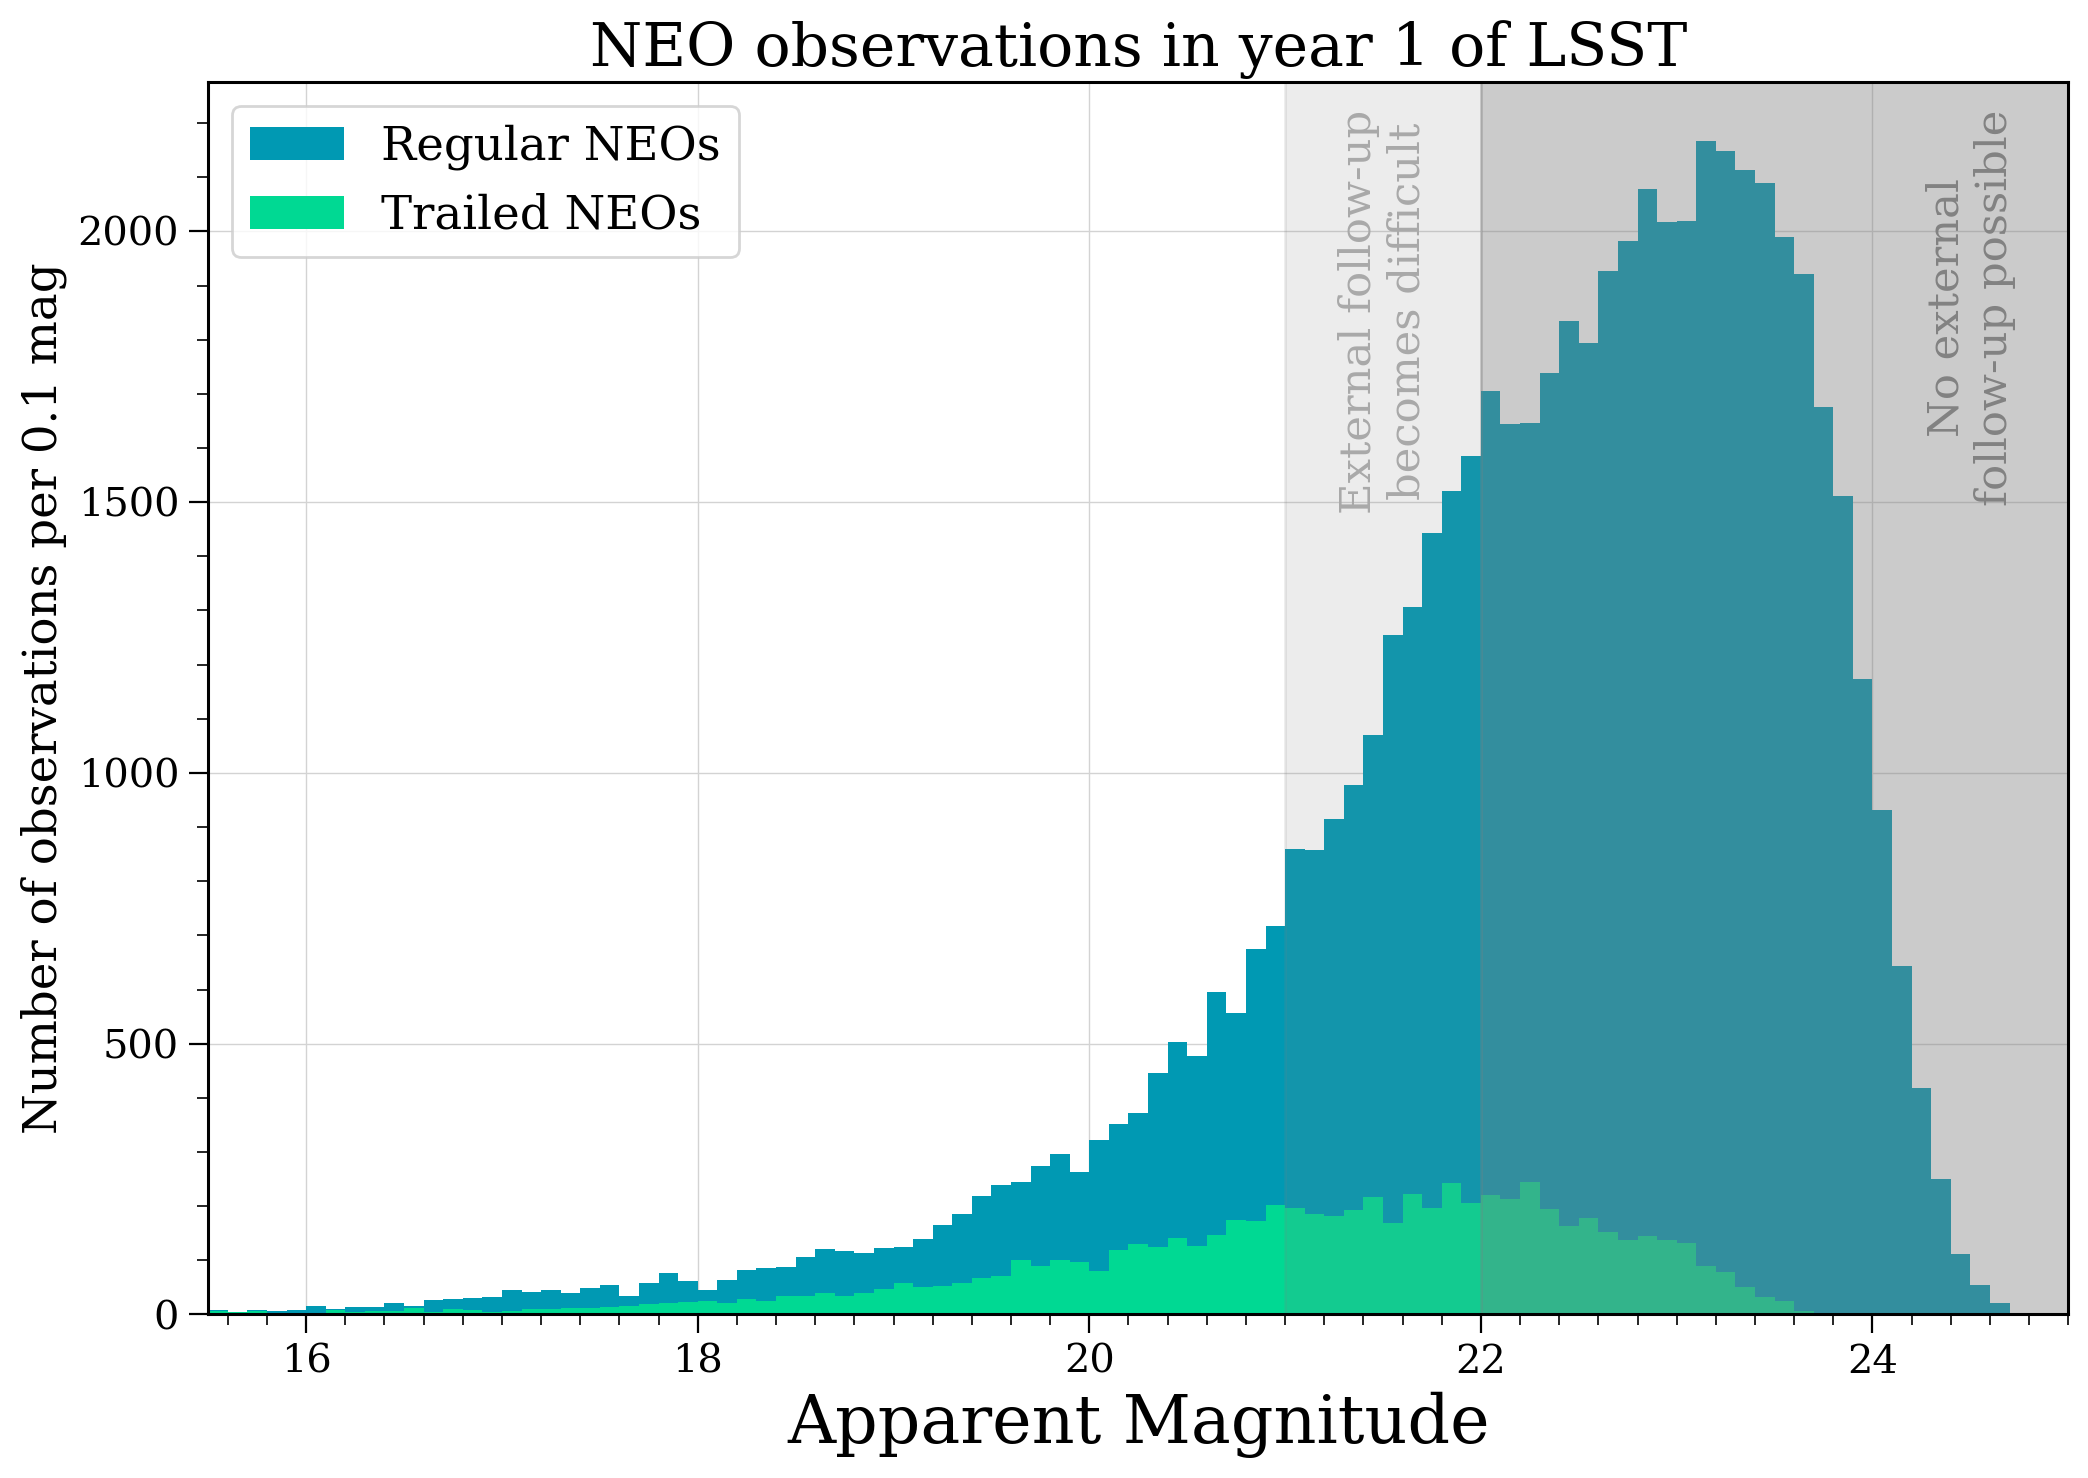

In [337]:
plt.figure(figsize=(12, 8))
plt.hist(all_mags, bins=np.arange(15.5, 25, 0.1), label="Regular NEOs",
         color=plt.get_cmap("winter")(0.6), histtype="stepfilled")#, edgecolor=plt.get_cmap("winter")(0.5))
plt.hist(fast_mags, bins=np.arange(15.5, 25, 0.1), label="Trailed NEOs",
         color=plt.get_cmap("winter")(0.85), histtype="stepfilled")#, edgecolor=plt.get_cmap("winter")(0.8))
plt.axvspan(21, 26, color="grey", alpha=0.15)#, lw=3, linestyle="--")
plt.axvspan(22, 26, color="grey", alpha=0.3)#, lw=3, linestyle="--")
plt.legend(fontsize=0.7*fs)
plt.xlim(15.5, 25)
plt.xlabel("Apparent Magnitude")
plt.ylabel("Number of observations per 0.1 mag", fontsize=0.7*fs)
plt.title("NEO observations in year 1 of LSST", fontsize=0.9*fs)

plt.annotate("External follow-up\nbecomes difficult", xy=(21.5, 2225),
             ha="center", va="top", rotation=90, color="darkgrey", zorder=10, fontsize=0.65*fs)
plt.annotate("No external\nfollow-up possible", xy=(24.5, 2225),
             ha="center", va="top", rotation=90, color="#828282", zorder=10, fontsize=0.65*fs)

plt.ylim(top=2275)
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.2))
plt.gca().yaxis.set_minor_locator(MultipleLocator(100))

for x in plt.xticks()[0]:
    plt.axvline(x, zorder=-1, color="lightgrey", lw=0.5)
for y in plt.yticks()[0]:
    plt.axhline(y, zorder=-1, color="lightgrey", lw=0.5)

plt.savefig("../paper/figures/neo_magnitudes.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [305]:
f'{(all_mags < 22).sum() / len(all_mags) * 100:1.0f}% of regular brighter than 22'

'34% of regular brighter than 22'

In [306]:
f'{(fast_mags < 22).sum() / len(fast_mags) * 100:1.0f}% of trailed brighter than 22'

'68% of trailed brighter than 22'

# Traffic and Purity with future knowledge

Let's apply `difi` to see which ones are findable

In [40]:
def get_findable_hex_ids(path="neo/", file_ids=range(22)):
                         
    obs_dfs = [pd.read_hdf(path + f"filtered_visit_scores_{i:03d}.h5").sort_values("FieldMJD")[["FieldMJD", "night"]]
               for i in file_ids]
    all_obs = pd.concat(obs_dfs)
    all_obs["obs_id"] = np.arange(len(all_obs))
    all_obs.reset_index(inplace=True)
    
    print("Obs file done")

    findable_hex_ids = None

    all_truths, findable_obs, summary = difi.analyzeObservations(
        observations=all_obs,
        classes=None,
        metric="nightly_linkages",
        column_mapping={"obs_id": "obs_id", "truth": "hex_id", "night": "night", "time": "FieldMJD"}
    )

    findable_hex_ids = all_truths[all_truths["findable"] == 1]["hex_id"].values

    return findable_hex_ids

In [23]:
%%time
findable_neo_hex_ids = get_findable_hex_ids()

Obs file done
CPU times: user 12.3 s, sys: 423 ms, total: 12.8 s
Wall time: 12.8 s


In [41]:
%%time
findable_mba_hex_ids = get_findable_hex_ids(path="mba/")

Obs file done
CPU times: user 31min 11s, sys: 2min 36s, total: 33min 48s
Wall time: 32min


In [42]:
unique_findable_neo_hex_ids = np.unique(findable_neo_hex_ids)
unique_findable_mba_hex_ids = np.unique(findable_mba_hex_ids)

In [43]:
np.save("unique_findable_neo_hex_ids_linked.npy", unique_findable_neo_hex_ids)
np.save("unique_findable_mba_hex_ids_linked.npy", unique_findable_mba_hex_ids)

In [44]:
unique_findable_neo_hex_ids = np.load("unique_findable_neo_hex_ids_linked.npy", allow_pickle=True)
unique_findable_mba_hex_ids = np.load("unique_findable_mba_hex_ids_linked.npy", allow_pickle=True)

## New try

In [112]:
findable_obs = pd.read_hdf("../output/findable_obs_year_1.h5")

In [129]:
findable_obs.loc["0DBBB91"]

318

In [138]:
((traffic_unfindable["neo"] + traffic_unfindable["mba"]) / (traffic["neo"] + traffic["mba"]))[:, ]

/tmp/ipykernel_71031/4074342659.py:1: RuntimeWarning: invalid value encountered in true_divide
  ((traffic_unfindable["neo"] + traffic_unfindable["mba"]) / (traffic["neo"] + traffic["mba"])).shape


(366, 5)

In [130]:
traffic_unfindable

{'neo': array([[21,  5,  3,  1,  1],
        [13,  2,  2,  0,  0],
        [30,  5,  1,  1,  1],
        ...,
        [12,  6,  5,  0,  0],
        [23, 16, 13,  2,  2],
        [ 7,  4,  2,  0,  0]]),
 'mba': array([[ 95,  86,  82,  11,  10],
        [ 13,   8,   6,   2,   1],
        [ 53,  42,  31,  12,   6],
        ...,
        [ 72,  64,  51,   2,   2],
        [145, 134, 113,  20,  16],
        [178, 174, 152,  14,  12]]),
 'centaur': array([[1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        ...,
        [1, 1, 1, 0, 0],
        [2, 2, 2, 1, 1],
        [2, 2, 2, 1, 1]]),
 'comet': array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 'trojan': array([[ 2,  2,  2,  0,  0],
        [ 1,  1,  0,  0,  0],
        [ 8,  8,  5,  2,  1],
        ...,
        [21, 13, 10,  0,  0],
        [24, 23, 18,  6,  4],
        [37, 36, 25,  7,  6]]),
 'tno': arr

In [127]:
df

ObjID  night  FieldMJD_TAI  AstRA(deg)  AstDec(deg)  \
0       CEN09014      0   60796.14240  169.692541     5.293690   
1       CEN09014      0   60796.14463  169.692479     5.293704   
2       CEN09014      0   60796.16587  169.691901     5.293862   
3       CEN09014      0   60796.16793  169.691859     5.293856   
4       CEN09045      0   60796.41719    3.897013    -6.750743   
...          ...    ...           ...         ...          ...   
11567  St5006r7a      0   60796.13659  160.695782     2.799037   
11568  St5006r7a      0   60796.16010  160.695615     2.799476   
11569  St500hWva      0   60796.11685  160.778983    -1.951533   
11570  St500hWva      0   60796.11730  160.778973    -1.951514   
11571  St500hWva      0   60796.13525  160.778677    -1.951066   

       AstrometricSigma(deg)  PhotometricSigmaTrailedSource(mag)  \
0                   0.000003                               0.006   
1                   0.000003                               0.006   
2                   0.000008                               0.052   
3                   0.000006                               0.043   
4                   0.000005                               0.015   
...                      ...                                 ...   
11567               0.000016                               0.106   
11568               0.000061                               0.414   
11569               0.000013                               0.120   
11570               0.000021                               0.150   
11571               0.000022                               0.157   

       observedTrailedSourceMag optFilter   hex_id  n_obs  scores   ang_vel  
0                        20.172         g  0DBBB91      4       5  0.027401  
1                        20.180         g  0DBBB91      4       5  0.027401  
2                        21.488         u  0DBBB91      4       5  0.027401  
3                        21.513         u  0DBBB91      4       5  0.027401  
4                        19.040         r  0DBBBB0      4      66  0.073850  
...                         ...       ...      ...    ...     ...       ...  
11567                    22.810         g  0D87C30      3       1  0.020716  
11568                    24.803         u  0D87C30      3       1  0.020716  
11569                    24.080         g  0D928F6      3       1  0.030319  
11570                    24.159         g  0D928F6      3       1  0.030319  
11571                    24.168         g  0D928F6      3       1  0.030319  

[11572 rows x 13 columns]

In [126]:
~df["hex_id"].isin(findable_obs.index.values)

0        False
1        False
2        False
3        False
4         True
         ...  
11567     True
11568     True
11569     True
11570     True
11571     True
Name: hex_id, Length: 11572, dtype: bool

In [122]:
def get_unfindable_traffic(nights, path="../output/synthetic_obs/", n_obs_list=[3, 3, 4, 5, 6], MAX_MAG=22):
    obj_types = ["neo", "mba", "centaur", "comet", "trojan", "tno", "sdo", "unknown"]
    traffic = {t: np.zeros((len(nights), len(n_obs_list)), dtype=int) for t in obj_types}
    
    scores, types = [], []
    
    for night in nights:
        file_path = os.path.join(path, f"filtered_night_{night:04d}_with_scores_trimmed.h5")
        if not os.path.isfile(file_path):
            continue
        df = pd.read_hdf(file_path)
        df = df[~df["hex_id"].isin(findable_obs.index.values)]
        
        ot = np.repeat("unknown", len(df))
        for start, obj_type in zip(["S0", "S1", "CEN", "SL", "St5", "ST", "SS"],
                                   ["neo", "mba", "centaur", "comet", "trojan", "tno", "sdo"]):
            ot[df["ObjID"].str.startswith(start)] = obj_type
        df["obj_type"] = ot

        df["v_mag"] = magnitudes.convert_colour_mags(df["observedTrailedSourceMag"].values, out_colour="V",
                                                     in_colour=df["optFilter"].values)

        grouped = df.groupby("hex_id").first()
        grouped["max_v_mag"] = df.groupby("hex_id")["v_mag"].max()
        grouped = grouped[grouped["max_v_mag"].values <= MAX_MAG]
        
        scores = np.concatenate((scores, grouped["scores"].values))
        types = np.concatenate((types, grouped["obj_type"].values))

        # remove trailed NEOs and low scores
        df = df[(df["ang_vel"] < 1.5) & (df["scores"] >= 65)]

        # group on object ID and save faintest observation
        grouped = df.groupby("hex_id").first()
        grouped["max_v_mag"] = df.groupby("hex_id")["v_mag"].max()

        # create a mask for magnitudes
        mag_mask = grouped["max_v_mag"].values <= MAX_MAG

        # check for each object type
        for obj in obj_types:
            obj_mask = (grouped["obj_type"] == obj)
            
            # if there's at least one observation
            if obj_mask.sum() > 0:
                traffic[obj][night, 0] = ((grouped["n_obs"] >= 3) & obj_mask).sum()
                
                for i, n_obs in enumerate(n_obs_list[1:]):
                    full_mask = (grouped["n_obs"] >= n_obs) & mag_mask
                    this_traffic = (full_mask & obj_mask).sum()
                    
                    # no need to check later n_obs if this one is 0
                    if this_traffic == 0:
                        break
                    traffic[obj][night, i + 1] = this_traffic
                    
        print(night)
    return traffic, scores, types

In [123]:
%%time
traffic_unfindable, scores_unfindable, types_unfindable = get_unfindable_traffic(range(366))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
15
16
17
19
20
21
22
26
27
32
33
34
36
37
45
46
47
48
49
50
52
53
54
56
57
58
59
60
61
62
65
66
67
68
69
70
71
72
74
75
76
77
78
79
80
81
82
83
85
86
87
88
90
91
93
94
100
101
102
104
105
106
107
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
133
134
135
136
137
138
139
140
141
142
143
144
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
290
291
292
293
294
295
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326


/tmp/ipykernel_71031/2710765768.py:8: RuntimeWarning: invalid value encountered in true_divide
  purity = traffic["neo"] / total_traffic


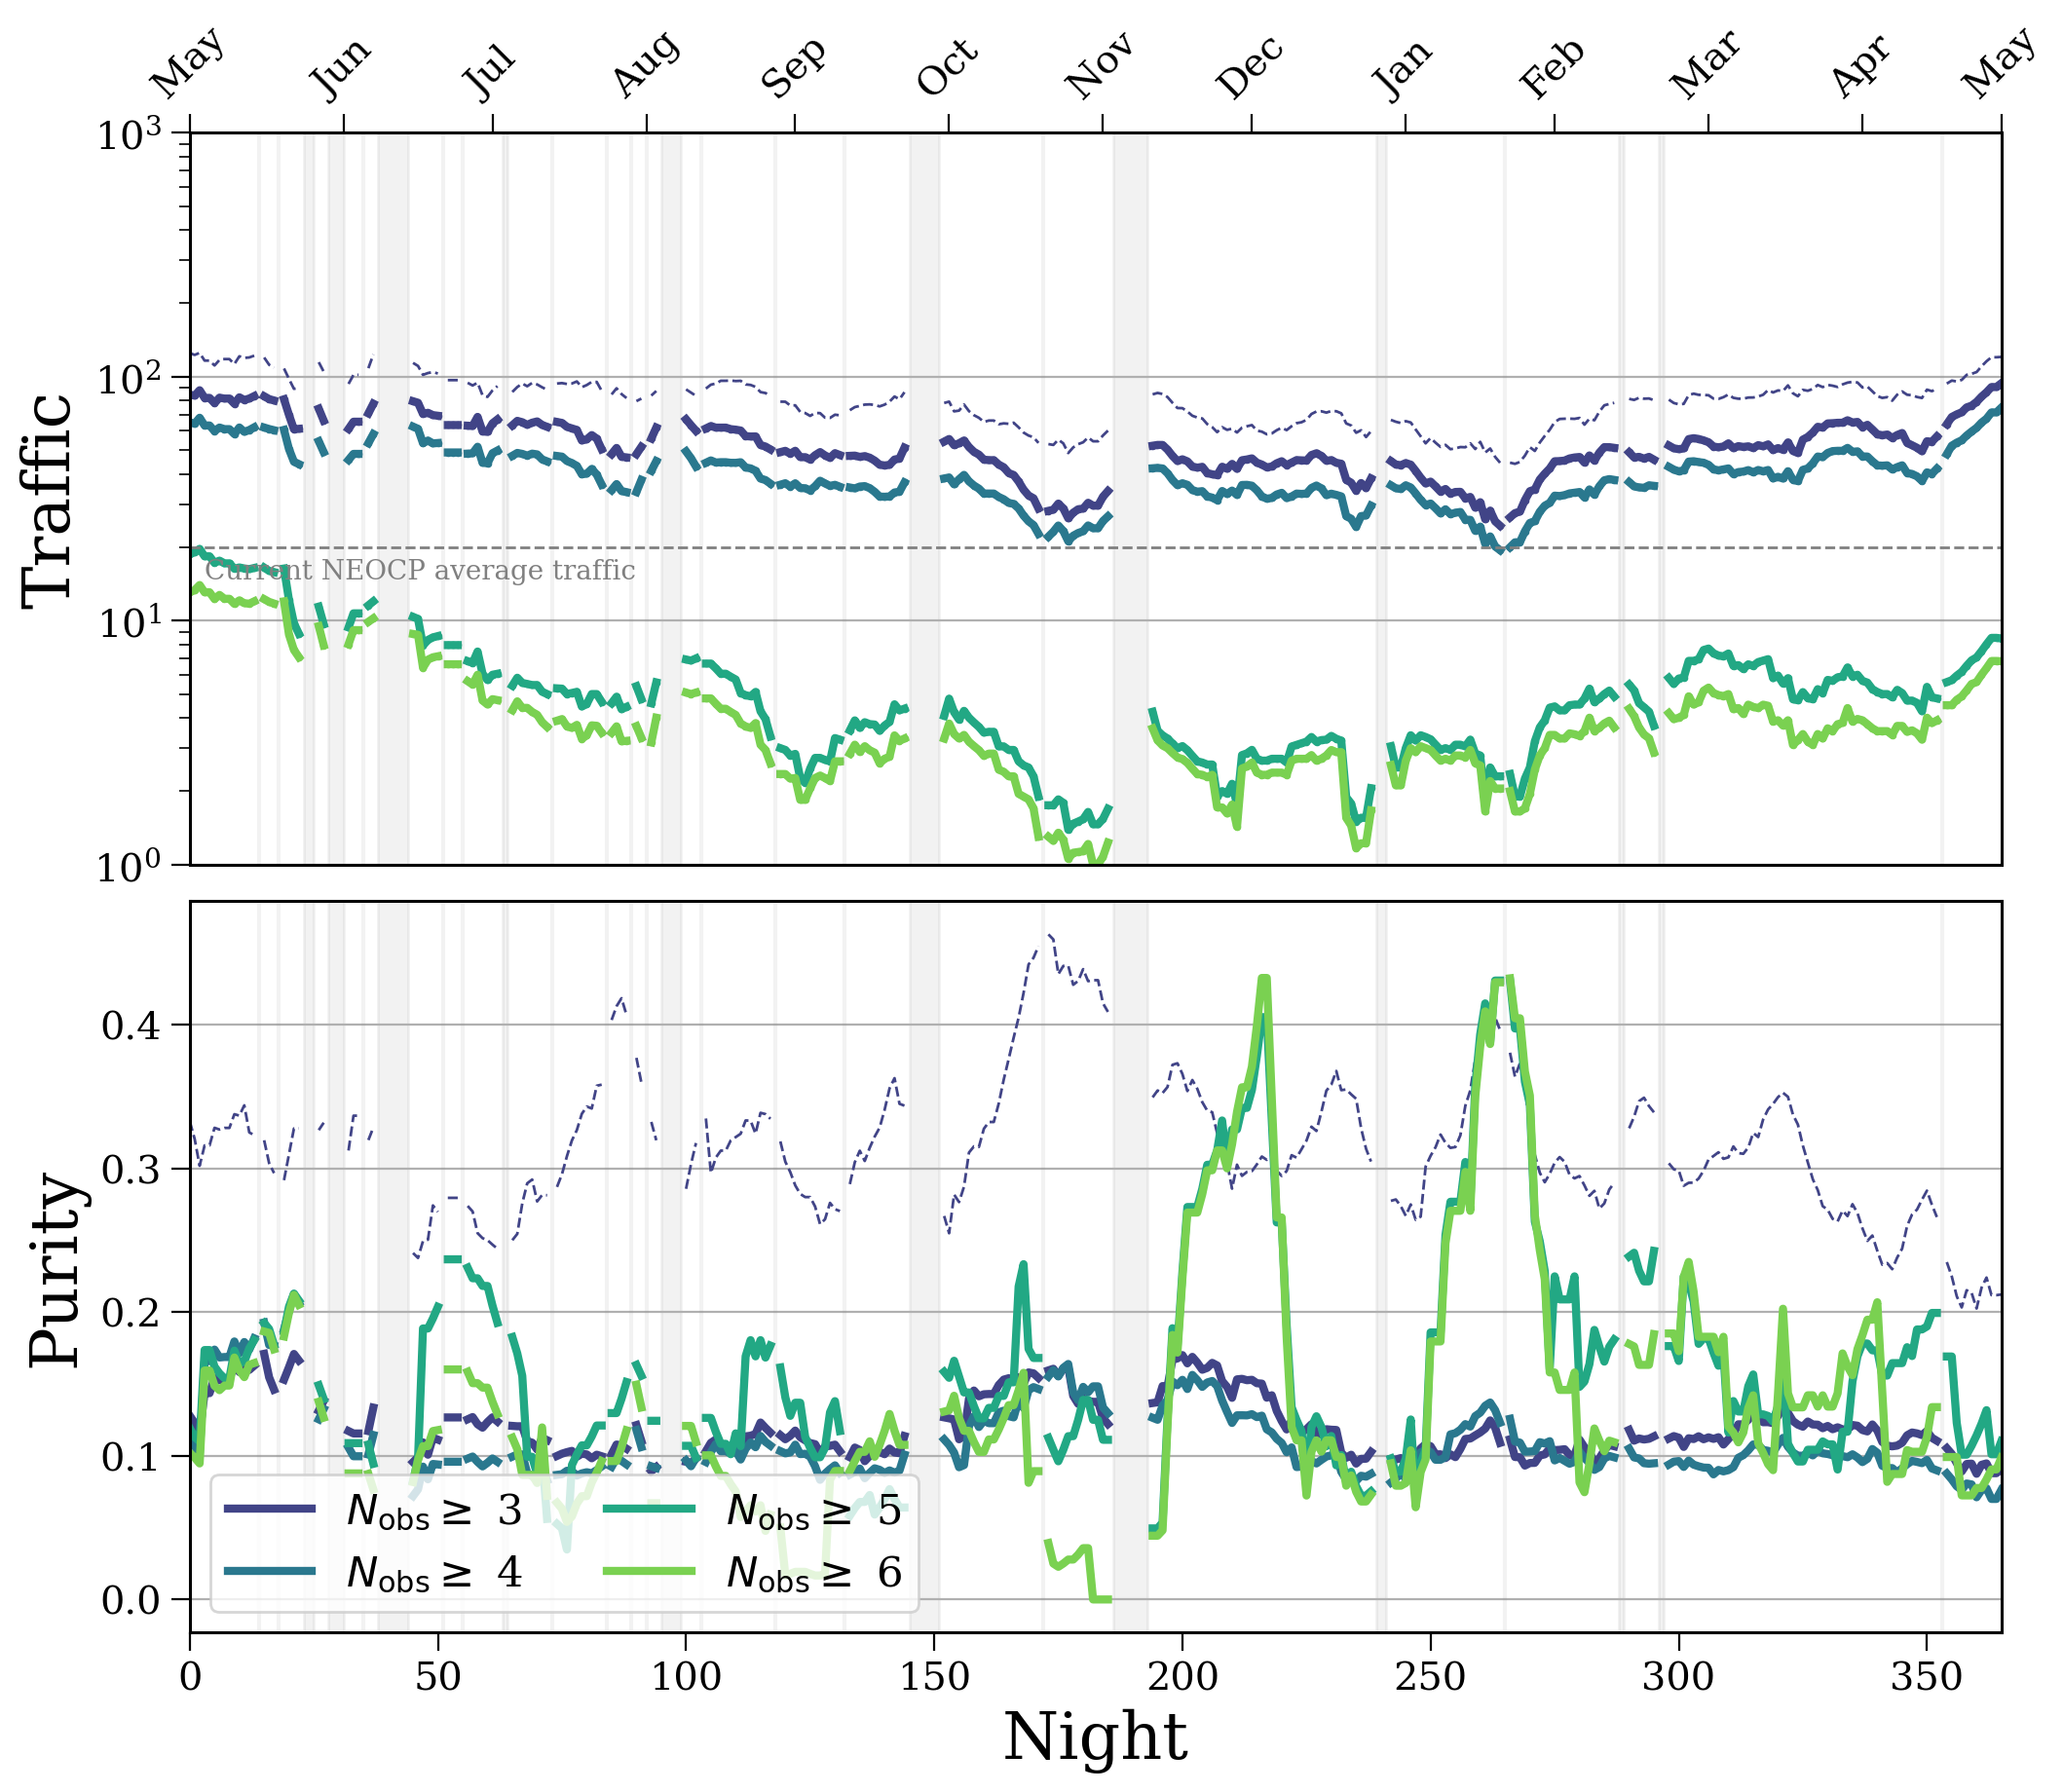

In [145]:
fig, axes = traffic_purity_plot(traffic_unfindable, show=False)
axes[0].set_ylim((1e0, 1e3))
plt.show()

In [48]:
total_traffic_unfindable = neo_counts_unfindable + mba_counts_unfindable

In [49]:
purity_unfindable = neo_counts_unfindable / total_traffic_unfindable

/tmp/ipykernel_60809/1320287732.py:1: RuntimeWarning: invalid value encountered in true_divide
  purity_unfindable = neo_counts_unfindable / total_traffic_unfindable


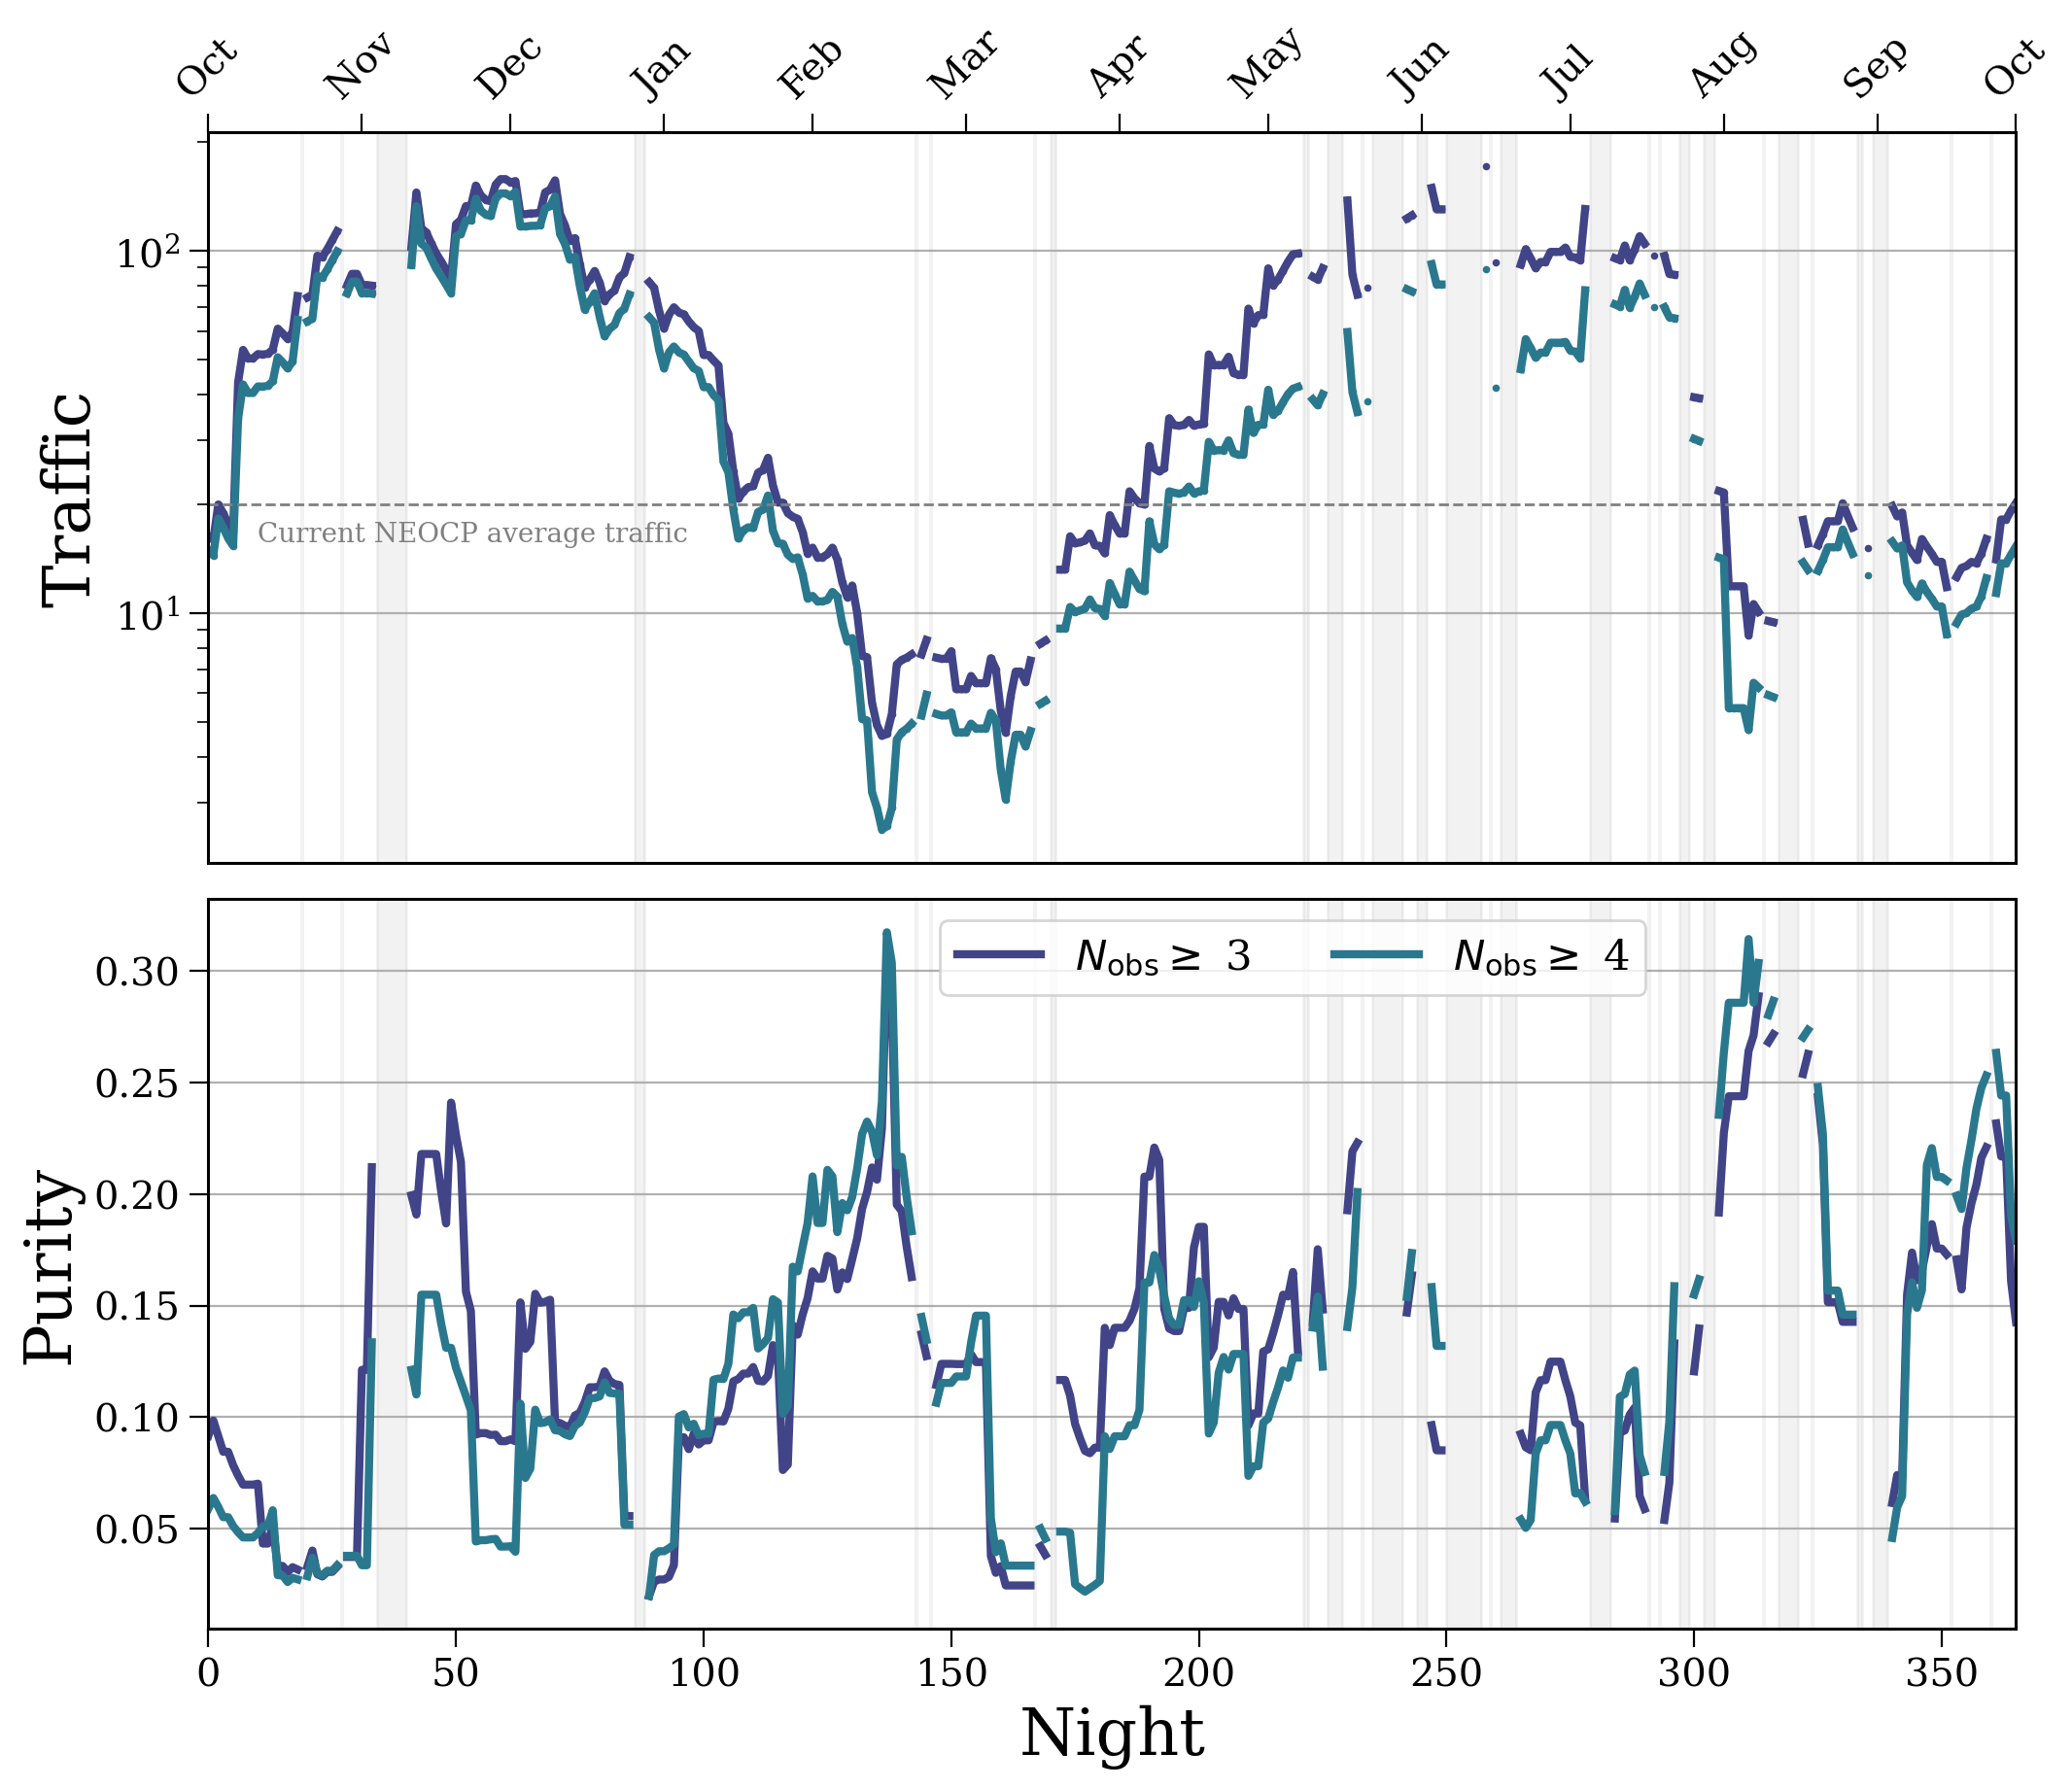

In [241]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05)

colours = [plt.get_cmap("viridis", len(n_obs_list) + 2)(i + 1) for i in range(len(n_obs_list))]
lw = 3

n_obs_range = [0, 1]

smoothing_window = 10

for i in n_obs_range:
    axes[0].plot(nights, weekly_mean(total_traffic_unfindable.T[i + 1],
                                     bad_weather, size=smoothing_window),
                 color=colours[i], lw=3, marker="o", markersize=np.sqrt(3))
# axes[0].plot(nights, weekly_mean(total_traffic_unfindable.T[0], bad_weather, size=smoothing_window),
#              color=colours[0], lw=1, linestyle="--")
axes[0].set_ylabel("Traffic")
axes[0].set_yscale("log")

# axes[1].plot(nights, weekly_mean(purity_unfindable.T[0], bad_weather, size=smoothing_window),
#              label=fr"$N_{{\rm obs}} \geq$ {n_obs_list[0]}, all $m$",
#              color=colours[0], lw=1, linestyle="--")
for i in n_obs_range:
    axes[1].plot(nights, weekly_mean(purity_unfindable.T[i + 1],
                                     bad_weather, size=smoothing_window),
                 label=fr"$N_{{\rm obs}} \geq$ {n_obs_list[i]}",
                 color=colours[i], lw=3)
    
# axes[1].set_yscale("log")
axes[1].set_xlabel("Night")
axes[1].set_ylabel("Purity")
    
leg = axes[1].legend(loc="upper center", ncol=2, fontsize=0.65*fs, bbox_to_anchor=(0.6, 1))
# for legobj in leg.legendHandles:
#     legobj.set_linewidth(5.0)

labels = ["October", "November", "December", "January", "February",
          "March", "April", "May", "June", "July", "August", "September", "October"]
labels_short = [label[:3] for label in labels]
days = [0 for label in labels]
for i, month in enumerate(range(3, 16)):
    act_month, year = month % 12, month // 12
    if act_month == 0:
        act_month = 12
        year = 0
    days[i] = (date(2022 + year, act_month, 1) - date(2022, 3, 1)).days
    

axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position('top') 
    
axes[0].set_xticks(days)
axes[0].set_xticklabels(labels_short, rotation=45)

for ax in axes:
    ax.set_xlim(0, 365)
    ax.grid(axis="y")
    
    # loop over every day of bad weather
    i = 0
    while i < len(bad_weather):
        # if this is not the last entry and the subsequent entry is a contiguous block of nights
        if i < len(bad_weather) - 1 and bad_weather[i + 1] - bad_weather[i] == 1:
            # track the lower edge of the bad weather gap
            gap_low = bad_weather[i]
            i += 1
            while bad_weather[i] - bad_weather[i - 1] == 1 and i < len(bad_weather) - 1:
                i += 1
            gap_high = bad_weather[i - 1]
            
            ax.axvspan(gap_low, gap_high, color="grey", alpha=0.1)
        else:
            ax.axvline(bad_weather[i], color="grey", alpha=0.1)
            i += 1
            
axes[0].axhline(20, color="grey", linestyle="--", lw=1)
axes[0].annotate("Current NEOCP average traffic", xy=(10, 18), ha="left", va="top", color="grey")
            
plt.savefig("../paper/figures/traffic_purity_unfindable.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [243]:
np.nanmean(purity_unfindable[:, 1])

0.12935538359581758

<hr height="10px">

# OLD

## Check tracklet lengths

In [6]:
def get_tracklet_length(df):
    init = SkyCoord(ra=df["AstRA(deg)"].iloc[0], dec=df["AstDec(deg)"].iloc[0], unit="deg")
    final = SkyCoord(ra=df["AstRA(deg)"].iloc[-1], dec=df["AstDec(deg)"].iloc[-1], unit="deg")
    
    return init.separation(final).to(u.arcsecond).value

In [16]:
mba_df = pd.read_hdf("mba/filtered_visit_000.h5")

In [20]:
%%time
mba_lengths = mba_df[mba_df["night"] == 0].groupby("ObjID").apply(get_tracklet_length)

CPU times: user 1min 4s, sys: 0 ns, total: 1min 4s
Wall time: 1min 4s


Text(0.5, 1.0, 'Tracklet lengths for night 0 of simulated data')

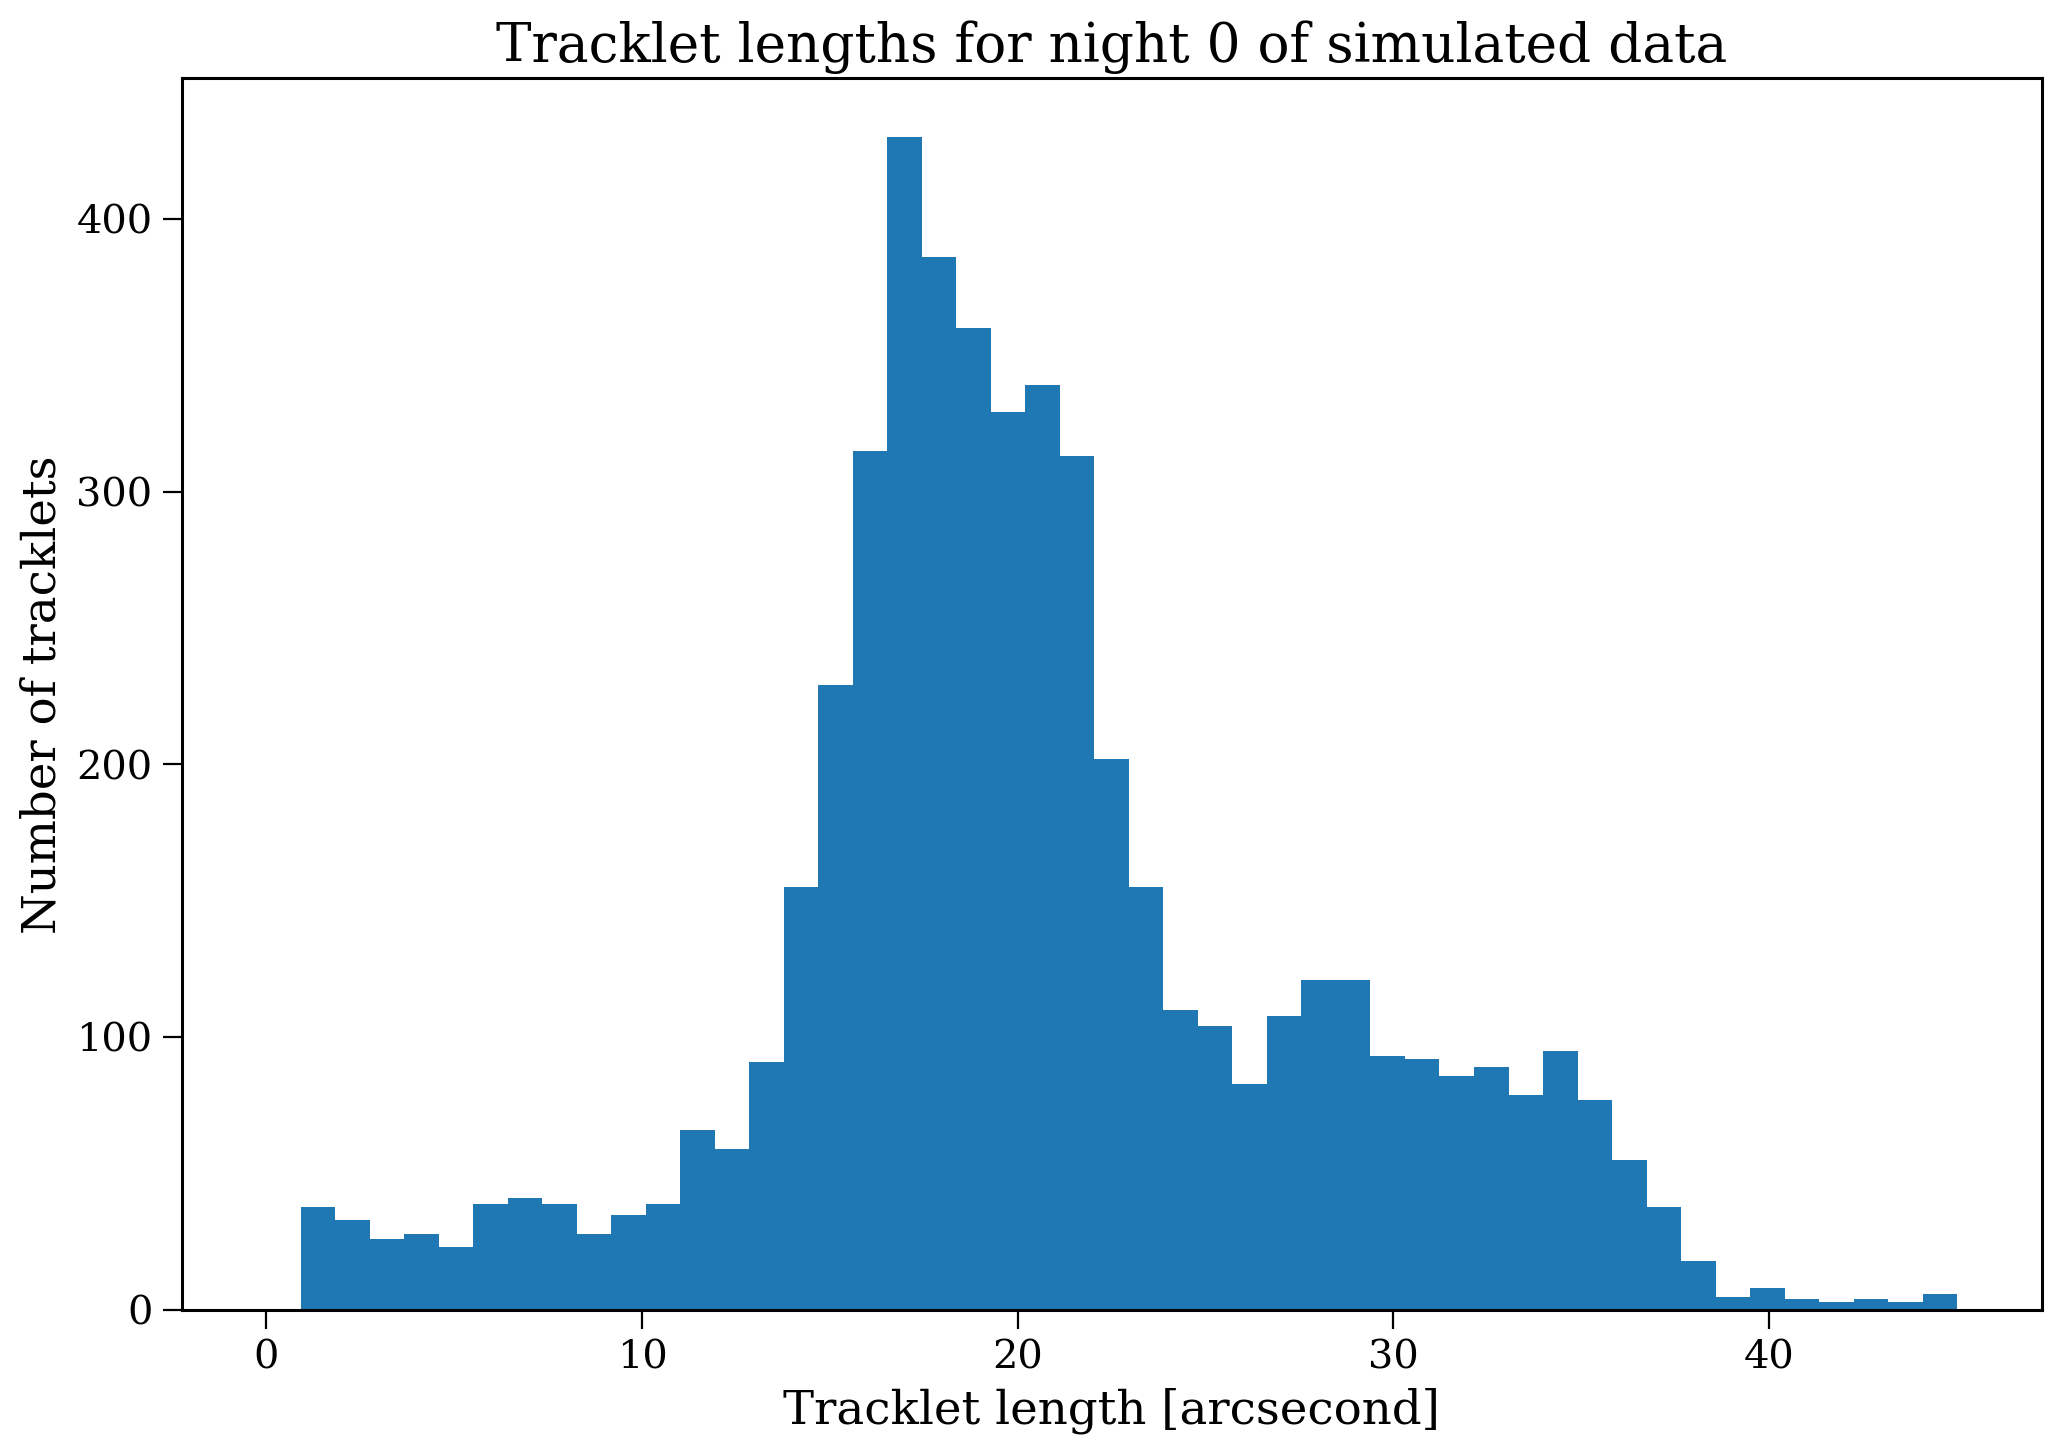

In [28]:
plt.hist(mba_lengths.values, bins="fd", range=(0, 45));
plt.xlabel("Tracklet length [arcsecond]", fontsize=0.7*fs)
plt.ylabel("Number of tracklets", fontsize=0.7*fs)
plt.title("Tracklet lengths for night 0 of simulated data", fontsize=0.8*fs)

In [147]:
def get_counts(path="neo/", n_obs_list=[3, 3, 4, 5, 6], last_night=373, remove_streaks=True):
    counts = np.zeros((last_night, len(n_obs_list))).astype(int)
    streak_counts = np.zeros(last_night).astype(int)
    n_too_faint = 0
    
    all_mags = []
    fast_mags = []
    
    problems = 0
    alt_problems = 0
    
    for file in range(22):
        print(f"file {file}")
        visit_file = pd.read_hdf(path + f"filtered_visit_scores_{file:03d}.h5")
        visit_file["v_mag"] = magnitudes.convert_colour_mags(visit_file["MaginFilter"].values, out_colour="V",
                                                             in_colour=visit_file["filter"].values)
        nights = visit_file["night"].unique()
        for night in nights:
            if night >= last_night:
                break
            nightly_visit = visit_file[visit_file["night"] == night]
            grouped = nightly_visit.groupby("hex_id").first()
            
            grouped["max_v_mag"] = nightly_visit.groupby("hex_id")["v_mag"].max()
            

            if path == "neo/" and remove_streaks:
                no_streaks = ~(np.isin(grouped["ObjID"], neo_streakers["ObjID"][neo_streakers["night"] == night]))
                fast_mags = np.concatenate((fast_mags, grouped["v_mag"][~no_streaks]))
                grouped = grouped[no_streaks]
                streak_counts[night] = (~no_streaks).sum()
            
            max_mag = 21
            
            proper_mag_mask = grouped["max_v_mag"].values <= max_mag
            
#             print((grouped["v_mag"] <= 22).sum() - proper_mag_mask.sum())
#             print(proper_mag_mask)
#             print(grouped["v_mag"].values <= 22, '\n')
            
            assert proper_mag_mask.sum() <= (grouped["v_mag"] <= max_mag).sum()
            problems += (grouped["v_mag"] <= max_mag).sum() - proper_mag_mask.sum()
            
            for i, n_obs in enumerate(n_obs_list):
                no_mag_mask = (grouped["n_obs"] >= n_obs) & (grouped["scores"] >= 65)
                full_mask = no_mag_mask & proper_mag_mask
                
                if i == 0:
                    n_too_faint += (no_mag_mask.sum() - full_mask.sum())
                    counts[night, i] += no_mag_mask.sum()
                    all_mags = np.concatenate((all_mags, grouped["v_mag"]))
                    alt_problems += (no_mag_mask & (grouped["v_mag"] <= max_mag)).sum() - full_mask.sum()
                else:
                    counts[night, i] += full_mask.sum()

    print("PROBLEMS", problems)
    print("REAL PROBLEMS", alt_problems)
    print(n_too_faint)
    
    if path == "neo/":
        return counts, streak_counts, all_mags, fast_mags
    else:           
        return counts

In [148]:
%%time
neo_counts, streak_counts, all_mags, fast_mags = get_counts()

file 0
file 1
file 2
file 3
file 4
file 5
file 6
file 7
file 8
file 9
file 10
file 11
file 12
file 13
file 14
file 15
file 16
file 17
file 18
file 19
file 20
file 21
PROBLEMS 302
REAL PROBLEMS 249
37767
CPU times: user 3.38 s, sys: 184 ms, total: 3.56 s
Wall time: 3.52 s


In [169]:
neo_counts[:, 0:2].sum(axis=0)

array([45515,  7748])

In [136]:
"With 21st", neo_counts[:, 1].sum()

('With 21st', 2284)

In [139]:
"With 22nd", neo_counts[:, 1].sum()

('With 22nd', 4864)

In [130]:
neo_counts[:, 0].sum() - neo_counts[:, 1].sum()

12086

In [134]:
(neo_counts[:, 0].sum() - neo_counts[:, 1].sum()) / neo_counts[:, 0].sum()

0.8143994799284902

In [143]:
%%time
mba_counts = get_counts(path="mba/")

file 0
file 1
file 2
file 3
file 4
file 5
file 6
file 7
file 8
file 9
file 10
file 11
file 12
file 13
file 14
file 15
file 16
file 17
file 18
file 19
file 20
file 21
PROBLEMS 51053
REAL PROBLEMS 3616
217998
CPU times: user 2min 58s, sys: 31.2 s, total: 3min 29s
Wall time: 3min 27s


In [119]:
(mba_counts[:, 0].sum() - mba_counts[:, 1].sum()) / mba_counts[:, 0].sum()

0.31659647160595233

In [144]:
"With 21st", mba_counts[:, 1].sum()

('With 21st', 239774)

In [141]:
"With 22nd", mba_counts[:, 1].sum()

('With 22nd', 312843)

# Test S3M

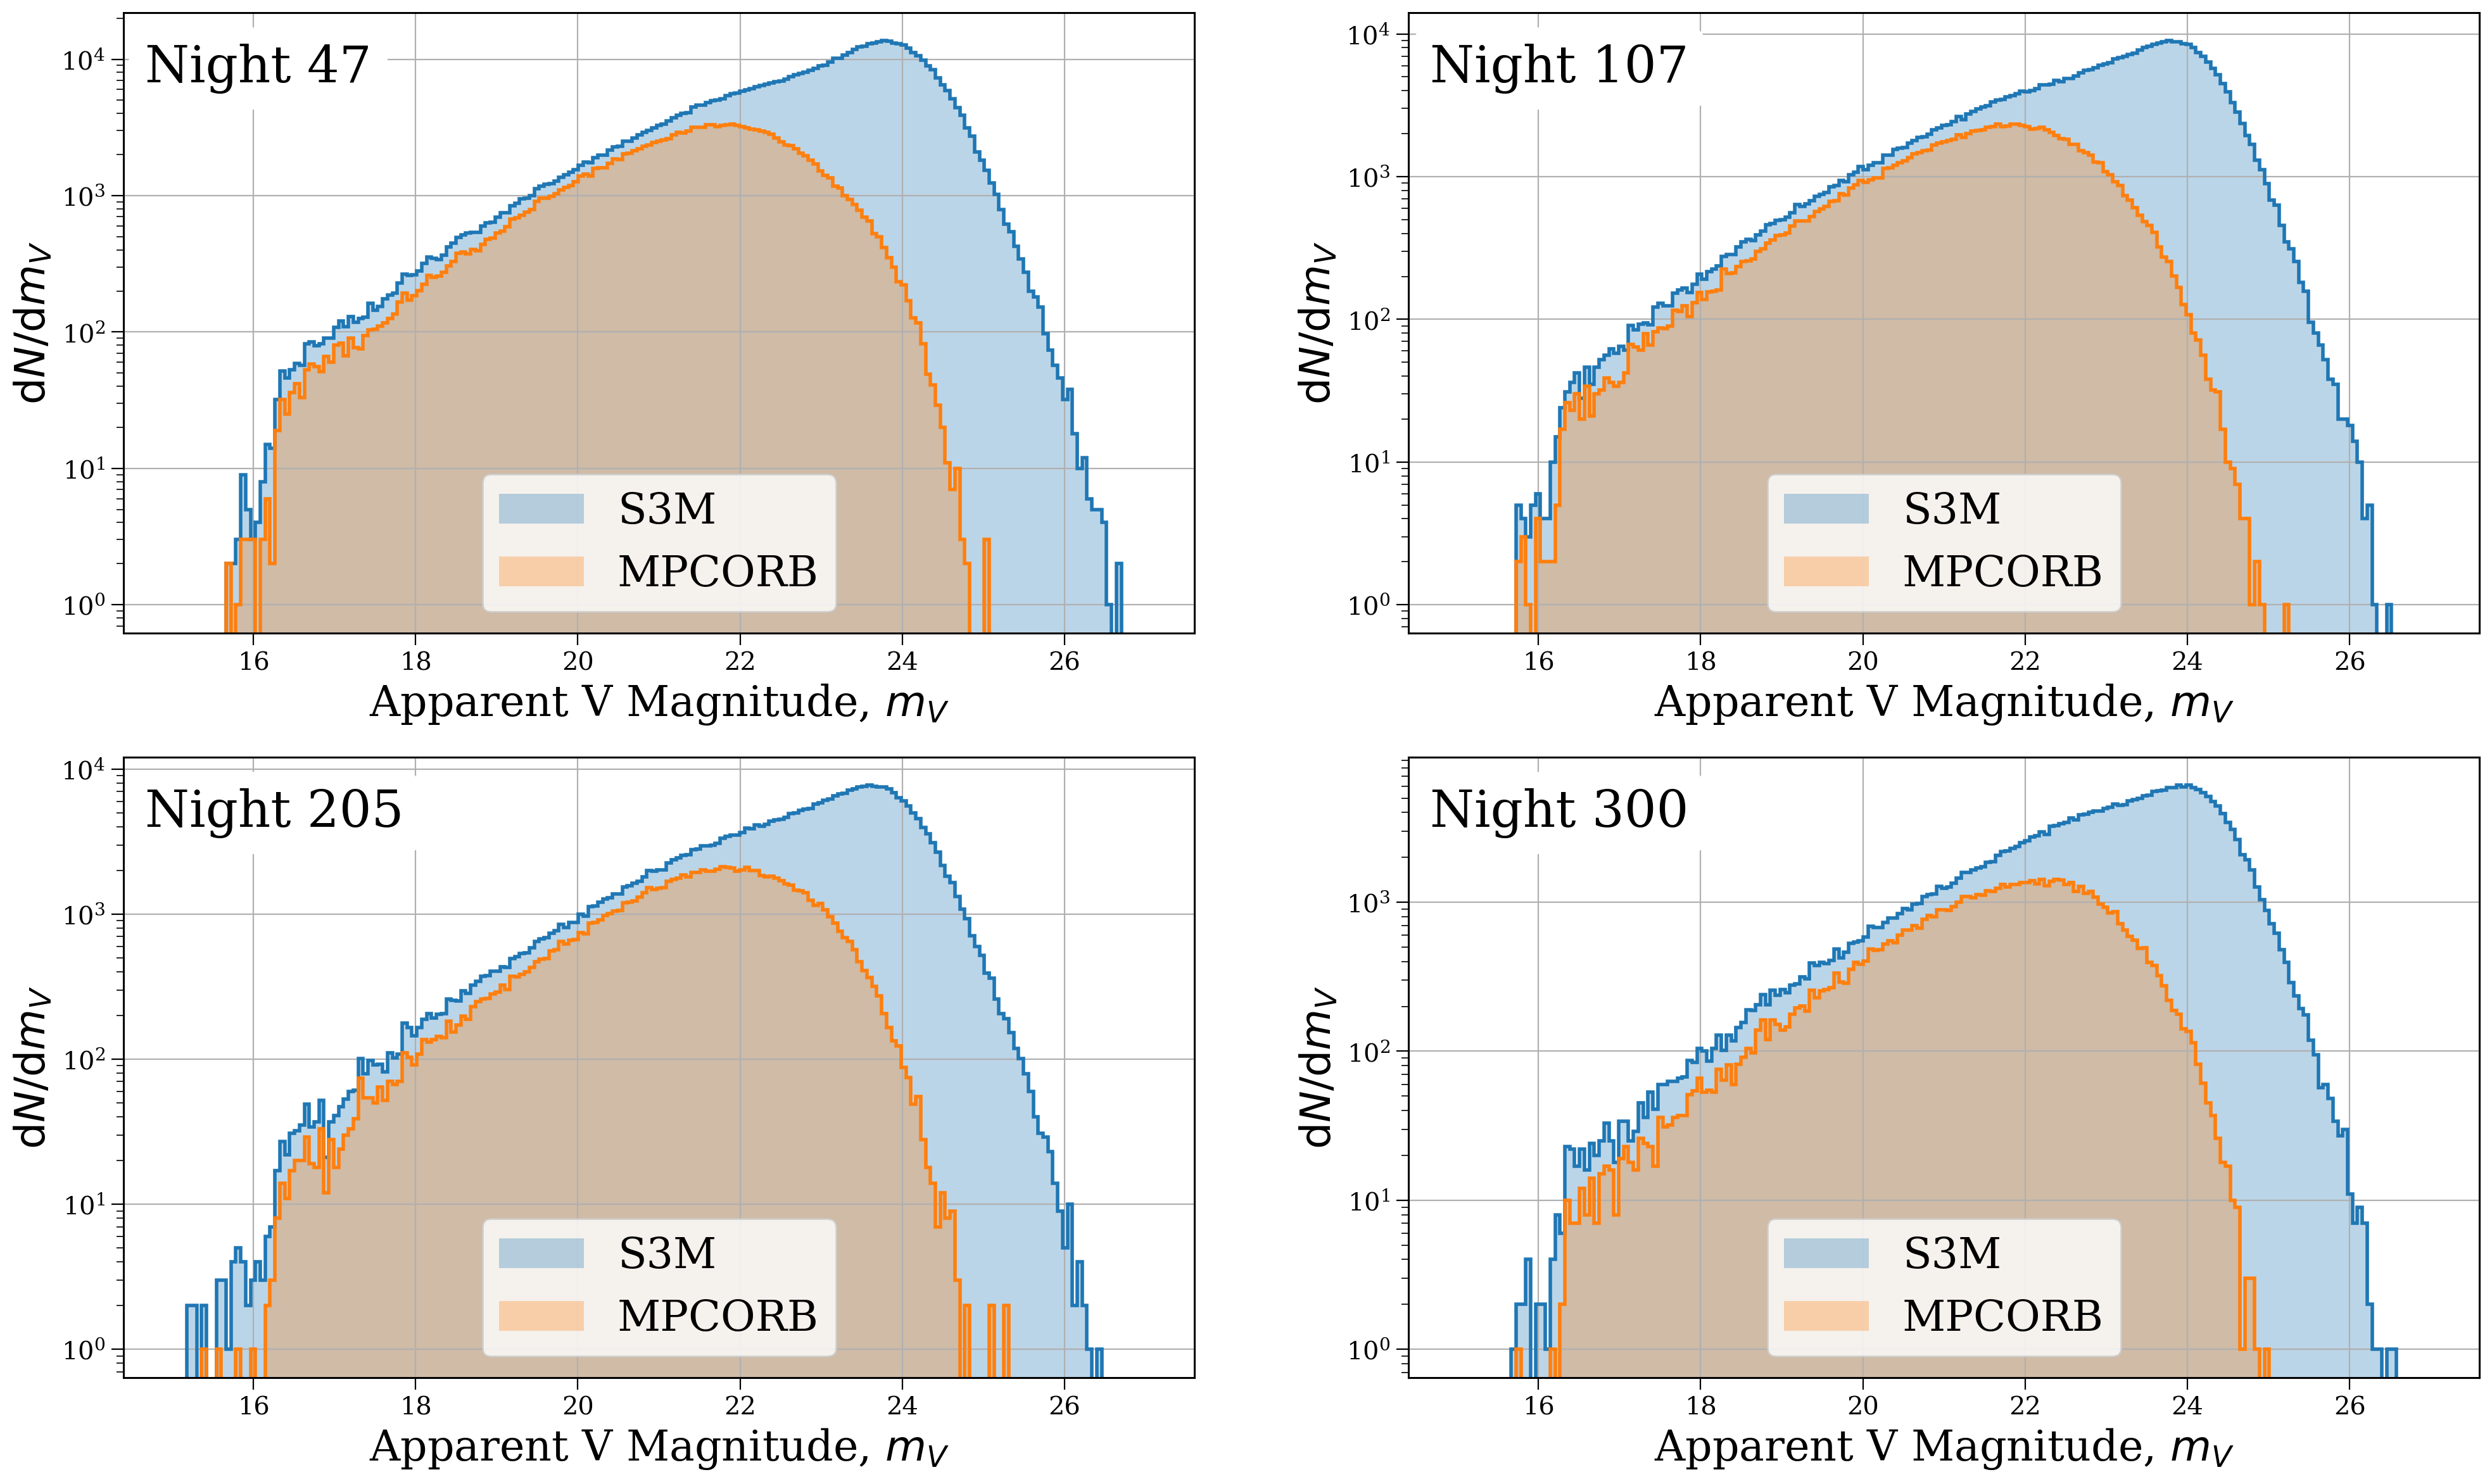

CPU times: user 15.8 s, sys: 398 ms, total: 16.2 s
Wall time: 16.2 s


In [173]:
%%time

fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for night, ax in zip([47, 107, 205, 300], axes.ravel()):
    
    obs = {'s3m': pd.read_hdf(f"../output/synthetic_obs/night_{night:04d}.h5"),
           'mpcorb': pd.read_hdf(f"../output/synthetic_obs/mpcorb_night_{night:04d}.h5")}

    for k in obs:
        obs[k]["v_mag"] = magnitudes.convert_colour_mags(obs[k]["observedTrailedSourceMag"].values,
                                                         out_colour="V",
                                                         in_colour=np.array(obs[k]["optFilter"].values))

    v_mags = {k: obs[k].groupby("ObjID")["v_mag"].mean().values for k in obs}
    v_mags["s3m"] = np.concatenate((v_mags["s3m"], v_mags["mpcorb"]))

    for k, label, c in zip(v_mags, ["S3M", "MPCORB"], ["C0", "C1"]):
        ax.hist(v_mags[k], bins=np.linspace(15, 27, 200), label=label, alpha=0.3, color=c, range=(15, 27))
        ax.hist(v_mags[k], bins=np.linspace(15, 27, 200), color=c, histtype="step", lw=2, range=(15, 27))

    ax.set(xlabel=r"Apparent V Magnitude, $m_V$", ylabel=r"${\rm d}N/{\rm d}m_V$",
           yscale="log")
    ax.annotate(f"Night {night}", xy=(0.02, 0.95), xycoords="axes fraction", va="top", fontsize=1.2*fs,
                bbox=dict(boxstyle="round", fc="white", ec="white"))
    ax.legend(loc="lower center")

    ax.grid()

plt.show()

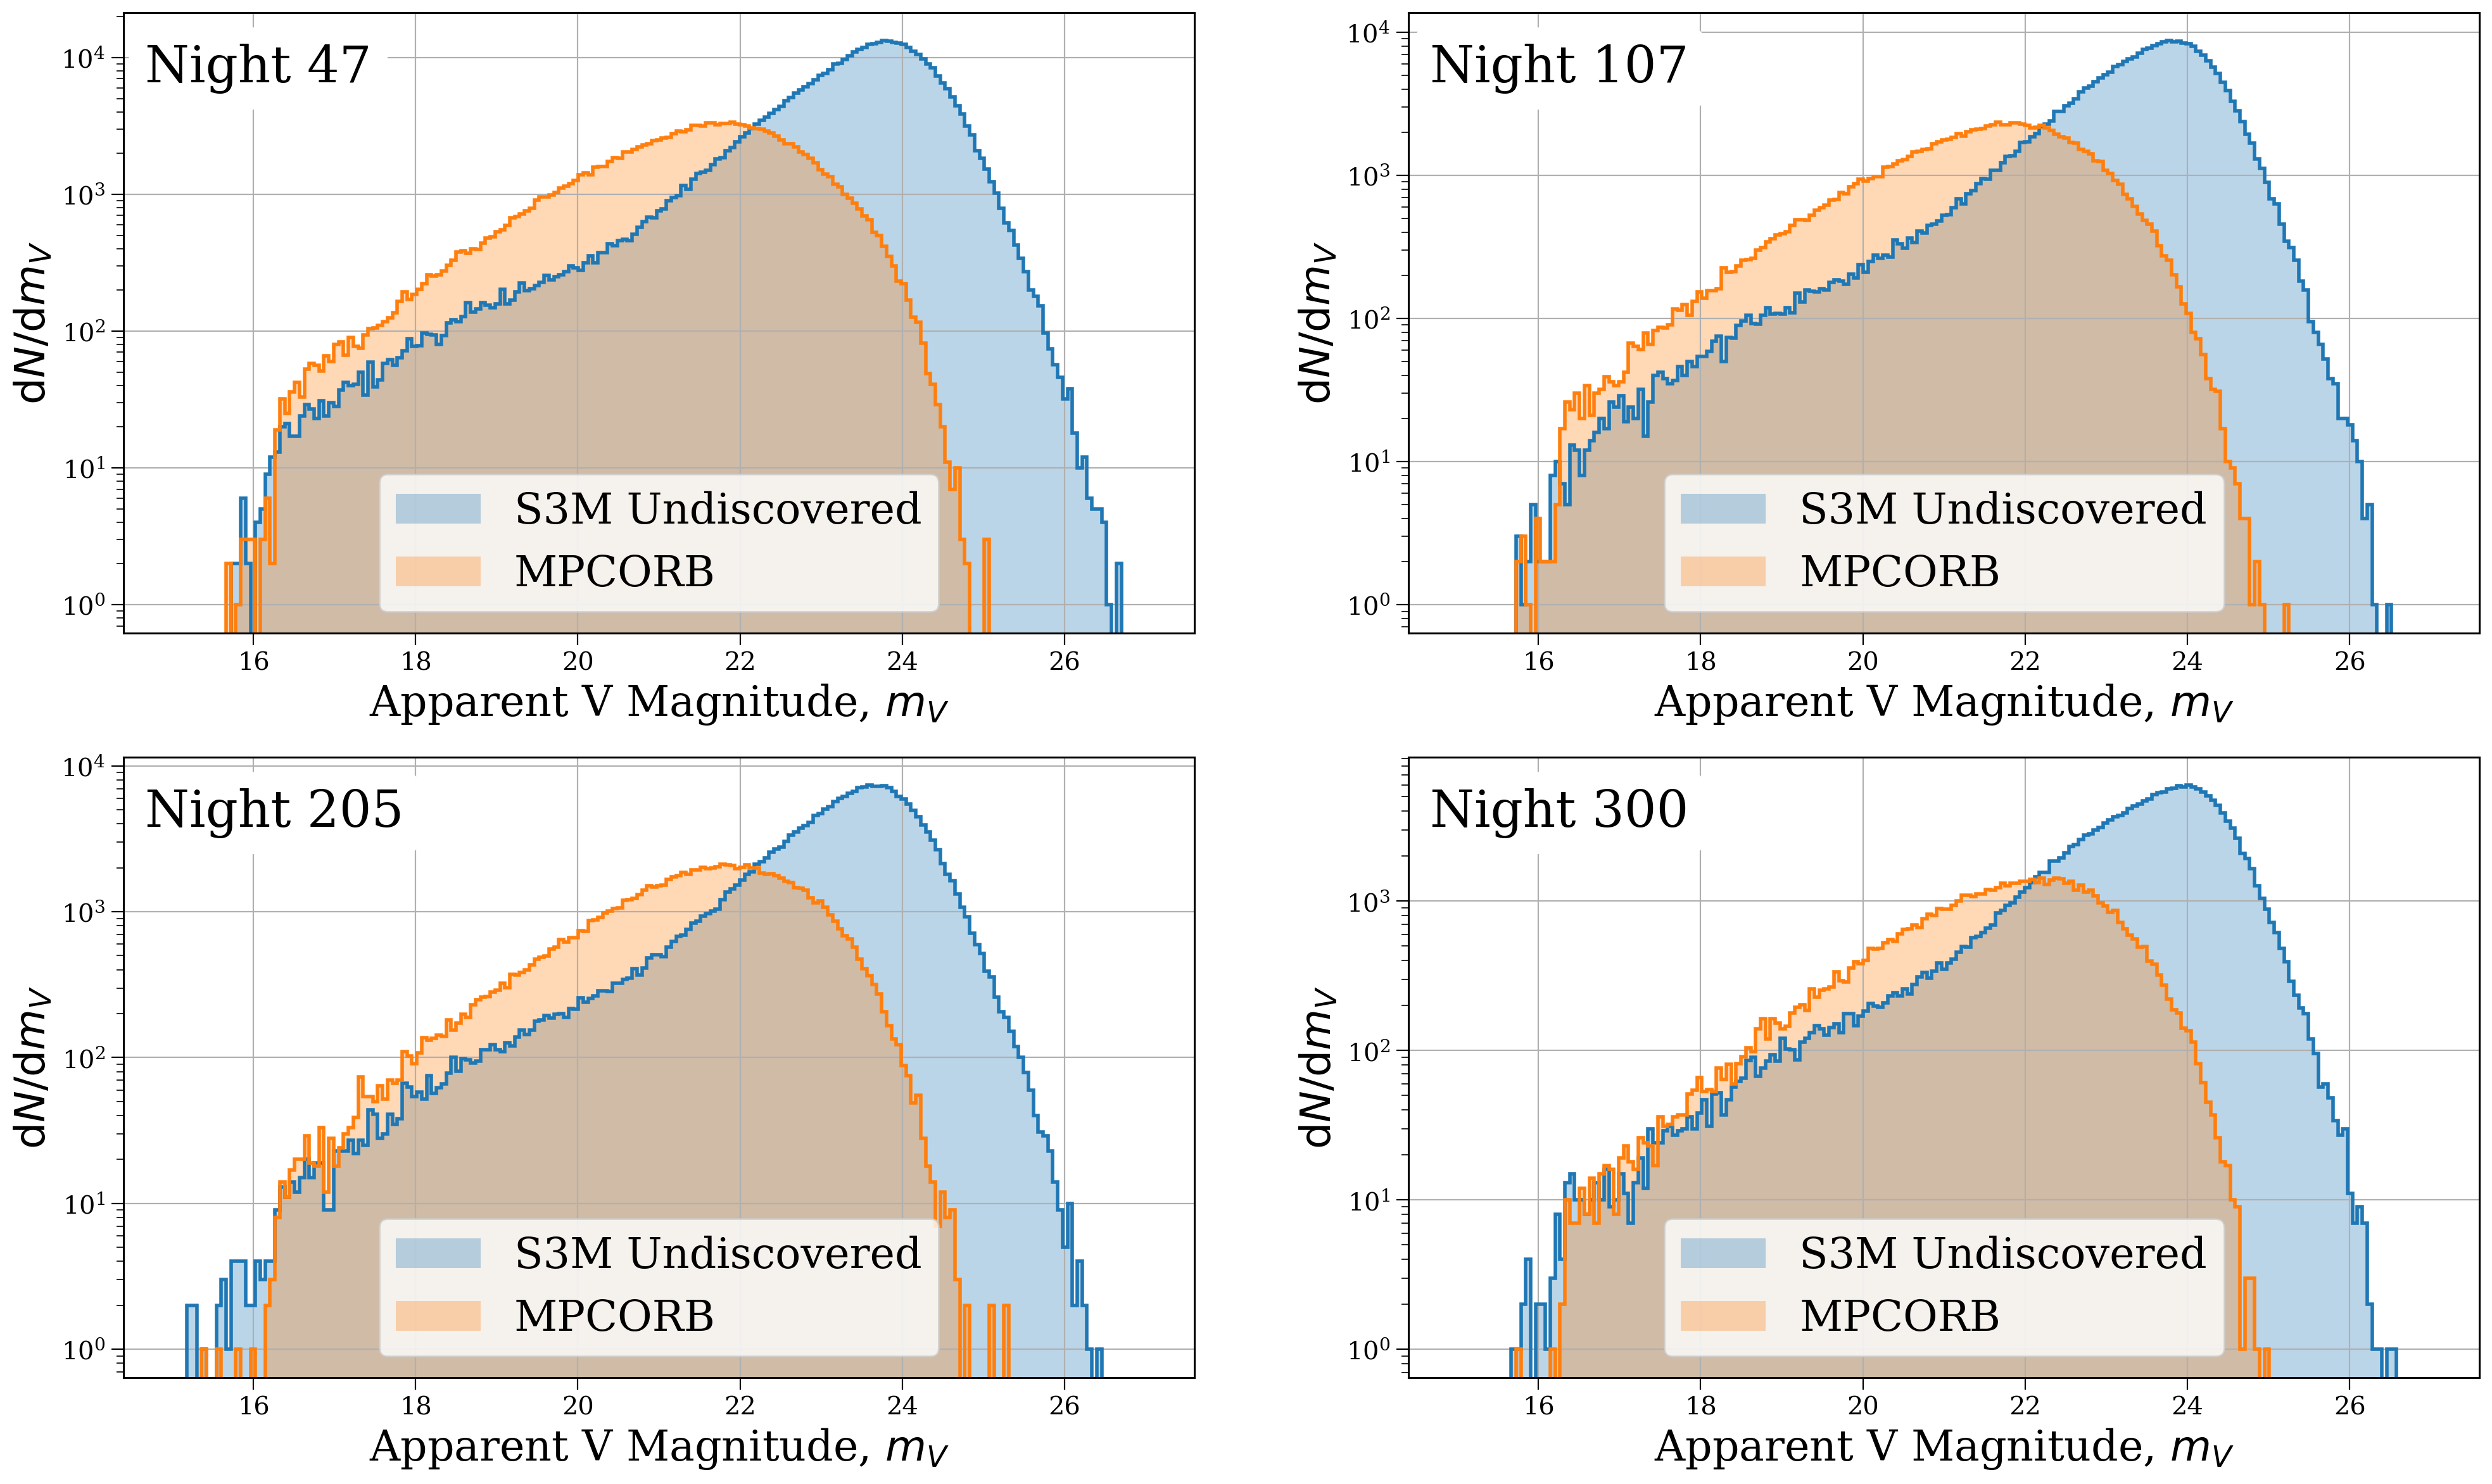

CPU times: user 25.7 s, sys: 433 ms, total: 26.2 s
Wall time: 26.2 s


In [174]:
%%time

fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for night, ax in zip([47, 107, 205, 300], axes.ravel()):
    
    obs = {'s3m': pd.read_hdf(f"../output/synthetic_obs/night_{night:04d}.h5"),
           'mpcorb': pd.read_hdf(f"../output/synthetic_obs/mpcorb_night_{night:04d}.h5")}

    for k in obs:
        obs[k]["v_mag"] = magnitudes.convert_colour_mags(obs[k]["observedTrailedSourceMag"].values,
                                                         out_colour="V",
                                                         in_colour=np.array(obs[k]["optFilter"].values))

    v_mags = {k: obs[k].groupby("ObjID")["v_mag"].mean().values for k in obs}

    for k, label, c in zip(v_mags, ["S3M Undiscovered", "MPCORB"], ["C0", "C1"]):
        ax.hist(v_mags[k], bins=np.linspace(15, 27, 200), label=label, alpha=0.3, color=c, range=(15, 27))
        ax.hist(v_mags[k], bins=np.linspace(15, 27, 200), color=c, histtype="step", lw=2, range=(15, 27))

    ax.set(xlabel=r"Apparent V Magnitude, $m_V$", ylabel=r"${\rm d}N/{\rm d}m_V$",
           yscale="log")
    ax.annotate(f"Night {night}", xy=(0.02, 0.95), xycoords="axes fraction", va="top", fontsize=1.2*fs,
                bbox=dict(boxstyle="round", fc="white", ec="white"))
    ax.legend(loc="lower center")

    ax.grid()

plt.show()

In [529]:
cut_s3m = pd.read_hdf("/epyc/projects/hybrid-sso-catalogs/catalogues/rescaled/s3m_propagated_cart_0.80.h5")

In [469]:
hybrid = pd.read_hdf("/epyc/projects/hybrid-sso-catalogs/catalogues/rescaled/hybrid_0.67.h5")

In [79]:
len(cut_s3m) / len(s3m)

0.7999999583399497

In [536]:
%%time
obs = [{'s3m': pd.read_hdf(f"../output/synthetic_obs/night_{night:04d}.h5"),
        'mpcorb': pd.read_hdf(f"../output/synthetic_obs/mpcorb_night_{night:04d}.h5")}
       for night in [47, 107, 205, 300]]

CPU times: user 5.65 s, sys: 695 ms, total: 6.35 s
Wall time: 22.7 s


In [537]:
%%time
v_mags = []
for o in obs:
    v_mag = {}
    for k in o:
        o[k]["v_mag"] = magnitudes.convert_colour_mags(o[k]["observedTrailedSourceMag"].values,
                                                       out_colour="V",
                                                       in_colour=np.array(o[k]["optFilter"].values))
        v_mag[k] = o[k].groupby("ObjID")["v_mag"].mean().values
    v_mag["s3m"] = np.concatenate((v_mag["s3m"], v_mag["mpcorb"]))
    v_mags.append(v_mag)

CPU times: user 4.14 s, sys: 0 ns, total: 4.14 s
Wall time: 4.13 s


In [538]:
%%time
v_mags_adjusted = []
for o in obs:
    v_mag = {}
    for k in o:
        print(len(o[k]["observedTrailedSourceMag"]))
        if k == "s3m":
            o[k] = o[k][o[k]["ObjID"].isin(cut_s3m_masked.index.values)]
        print(len(o[k]["observedTrailedSourceMag"]))
                
        o[k]["v_mag"] = magnitudes.convert_colour_mags(o[k]["observedTrailedSourceMag"].values,
                                                       out_colour="V",
                                                       in_colour=np.array(o[k]["optFilter"].values))
        v_mag[k] = o[k].groupby("ObjID")["v_mag"].mean().values
    v_mag["s3m"] = np.concatenate((v_mag["s3m"], v_mag["mpcorb"]))
    v_mags_adjusted.append(v_mag)

780539
519916
385995
385995
491307
320461
247721
247721
395891
235839
244152
244152
436831
266728
214936
214936
CPU times: user 11.9 s, sys: 352 ms, total: 12.3 s
Wall time: 12.2 s


In [428]:
ratio[(bin_centres > 19) & (bin_centres < 21.5)].min()

1.3509615384615385

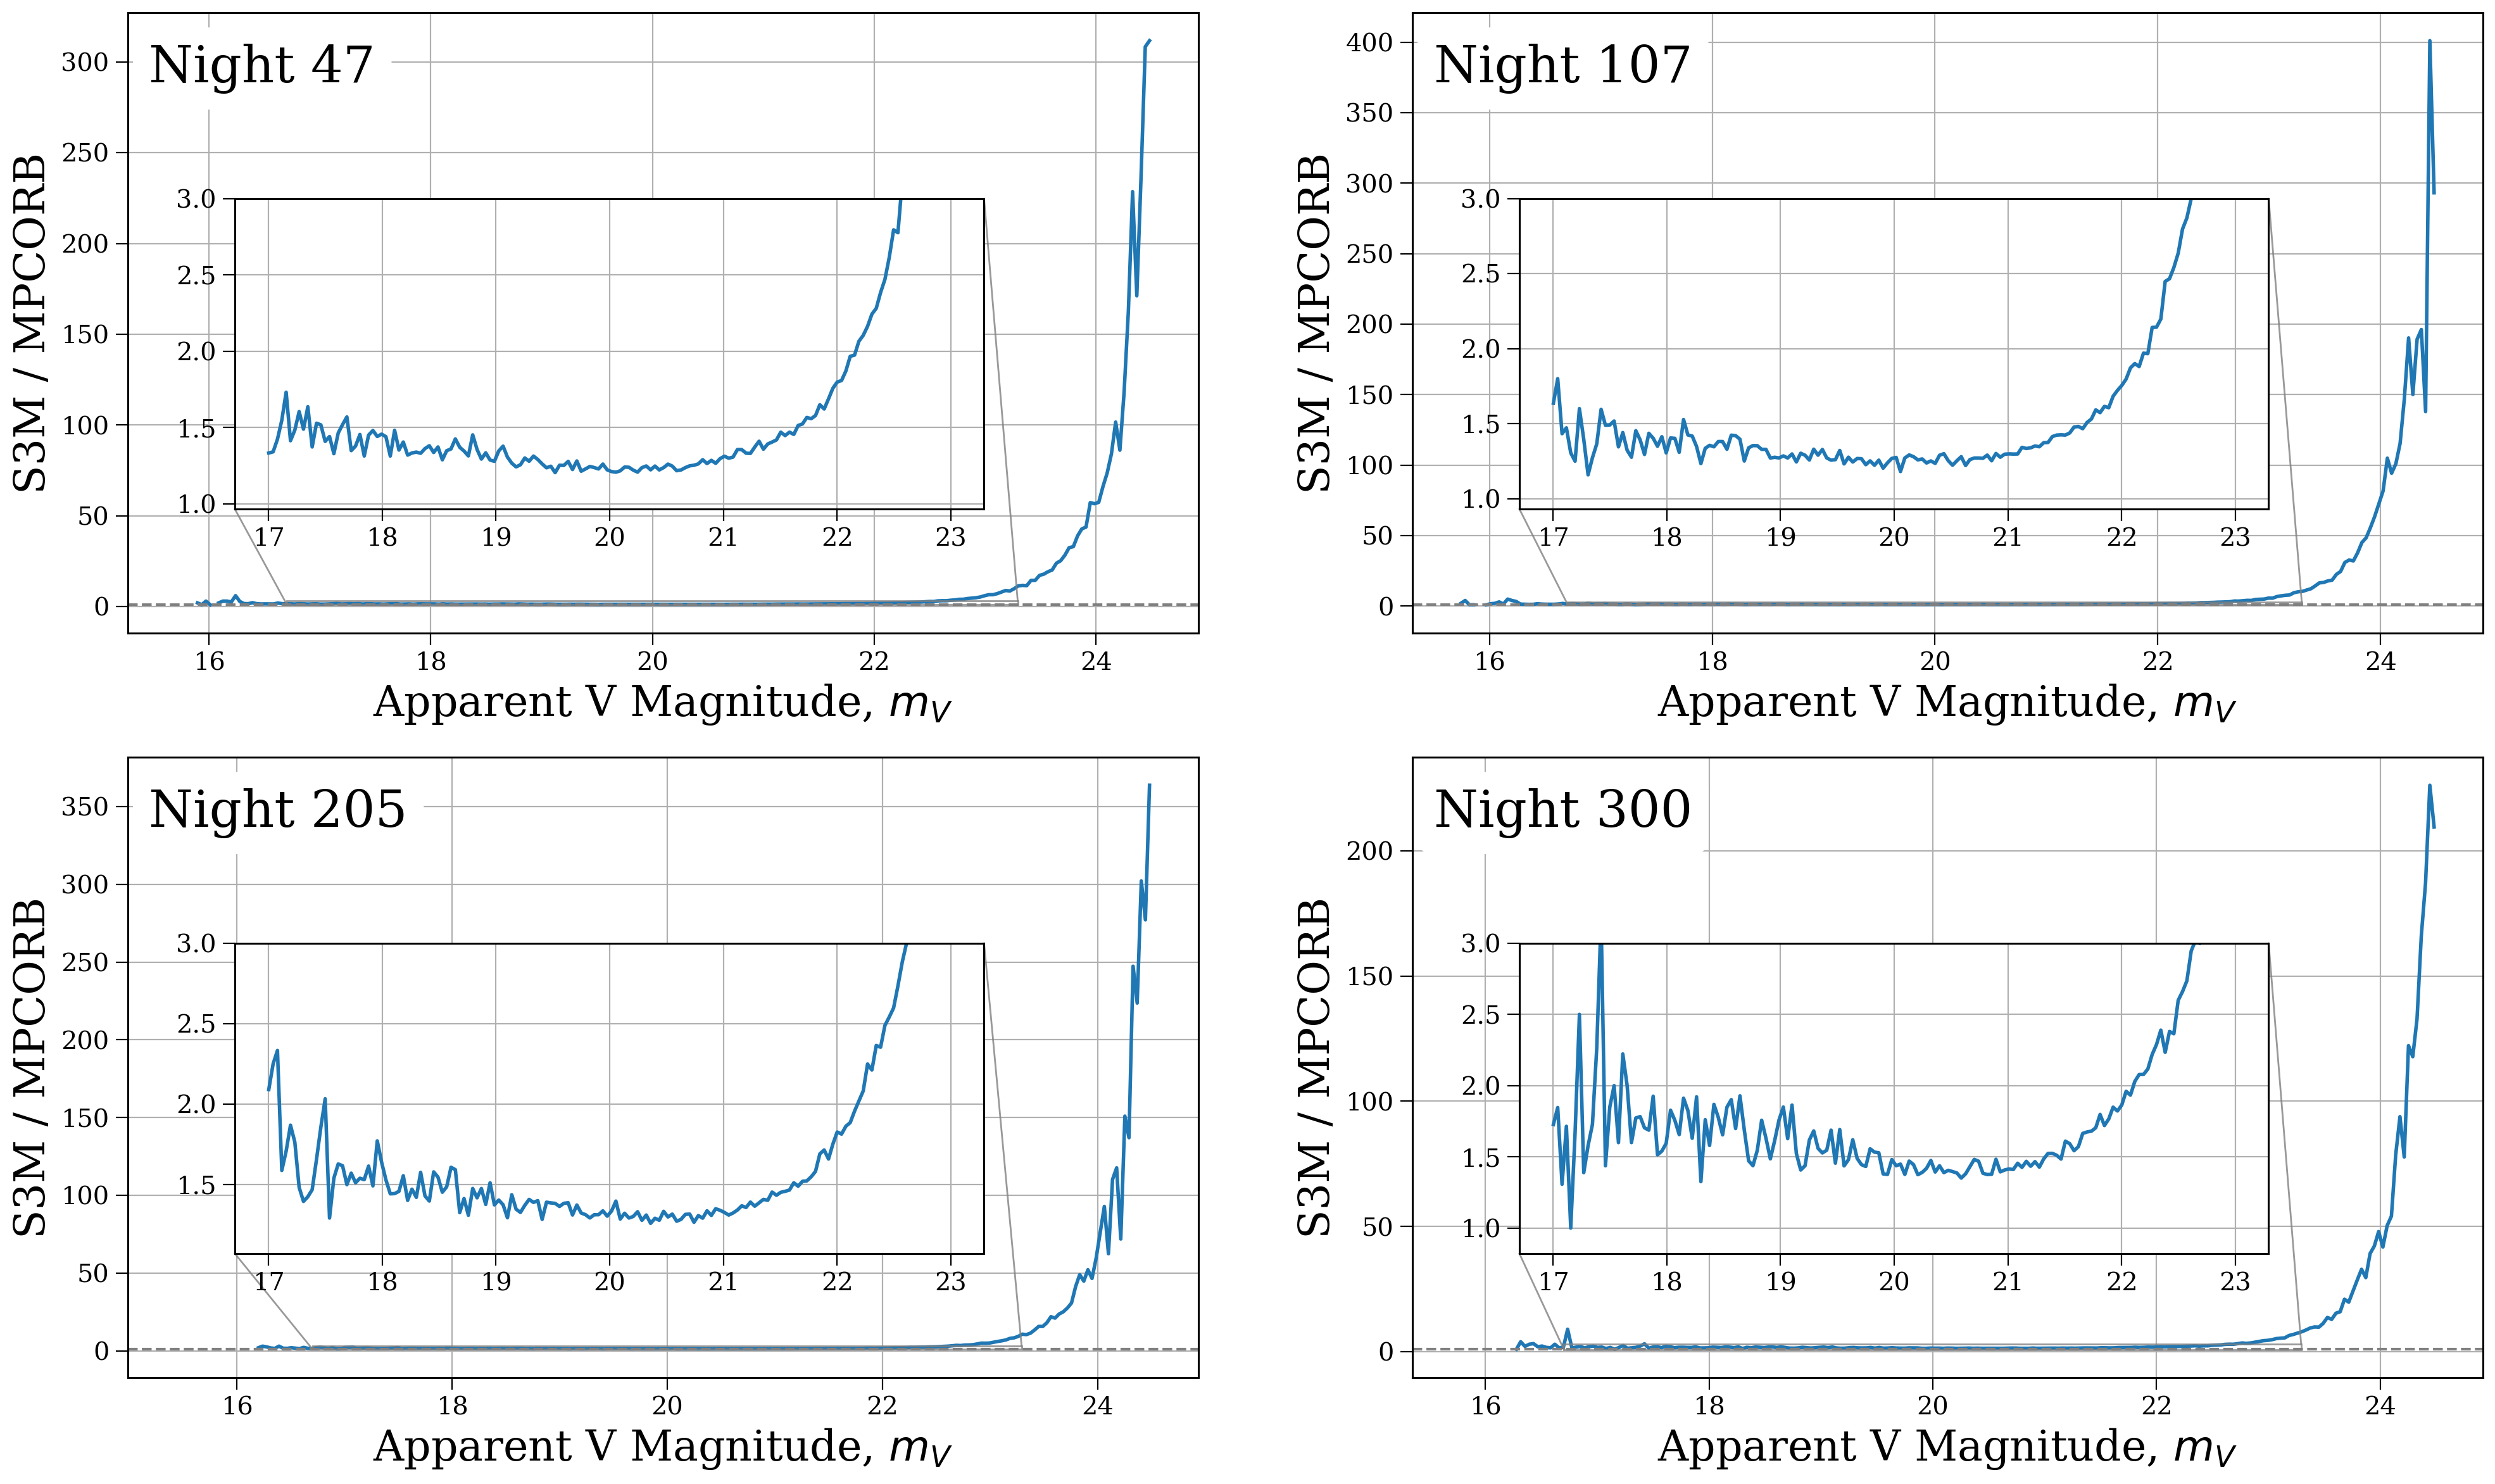

In [383]:
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for night, ax, v_mag in zip([47, 107, 205, 300], axes.ravel(), v_mags):

    bins = np.linspace(15, 24.5, 250)
    h_s3m, _ = np.histogram(v_mag['s3m'], bins=bins)
    h_mpcorb, _ = np.histogram(v_mag['mpcorb'], bins=bins)
    
    bin_centres = (bins[1:] + bins[:-1]) / 2
    ratio = np.repeat(np.nan, len(bin_centres))
    ratio[h_mpcorb > 0] = h_s3m[h_mpcorb > 0] / h_mpcorb[h_mpcorb > 0]
    ax.plot(bin_centres, ratio, lw=2)
    ax.axhline(1, linestyle="--", color="grey")
    
    inset_ax = ax.inset_axes([0.1, 0.2, 0.7, 0.5])
    inset_lim = (bin_centres > 17) & (bin_centres < 23)
    inset_ax.plot(bin_centres[inset_lim], ratio[inset_lim], lw=2)
    inset_ax.set_ylim(top=3)
    inset_ax.grid()
    
    ax.indicate_inset_zoom(inset_ax, alpha=0.8)
    
    ax.set(xlabel=r"Apparent V Magnitude, $m_V$", ylabel=r"S3M / MPCORB")
    ax.annotate(f"Night {night}", xy=(0.02, 0.95), xycoords="axes fraction", va="top", fontsize=1.2*fs,
                bbox=dict(boxstyle="round", fc="white", ec="white"))
    #     ax.legend(loc="lower center")

    ax.grid()

plt.show()

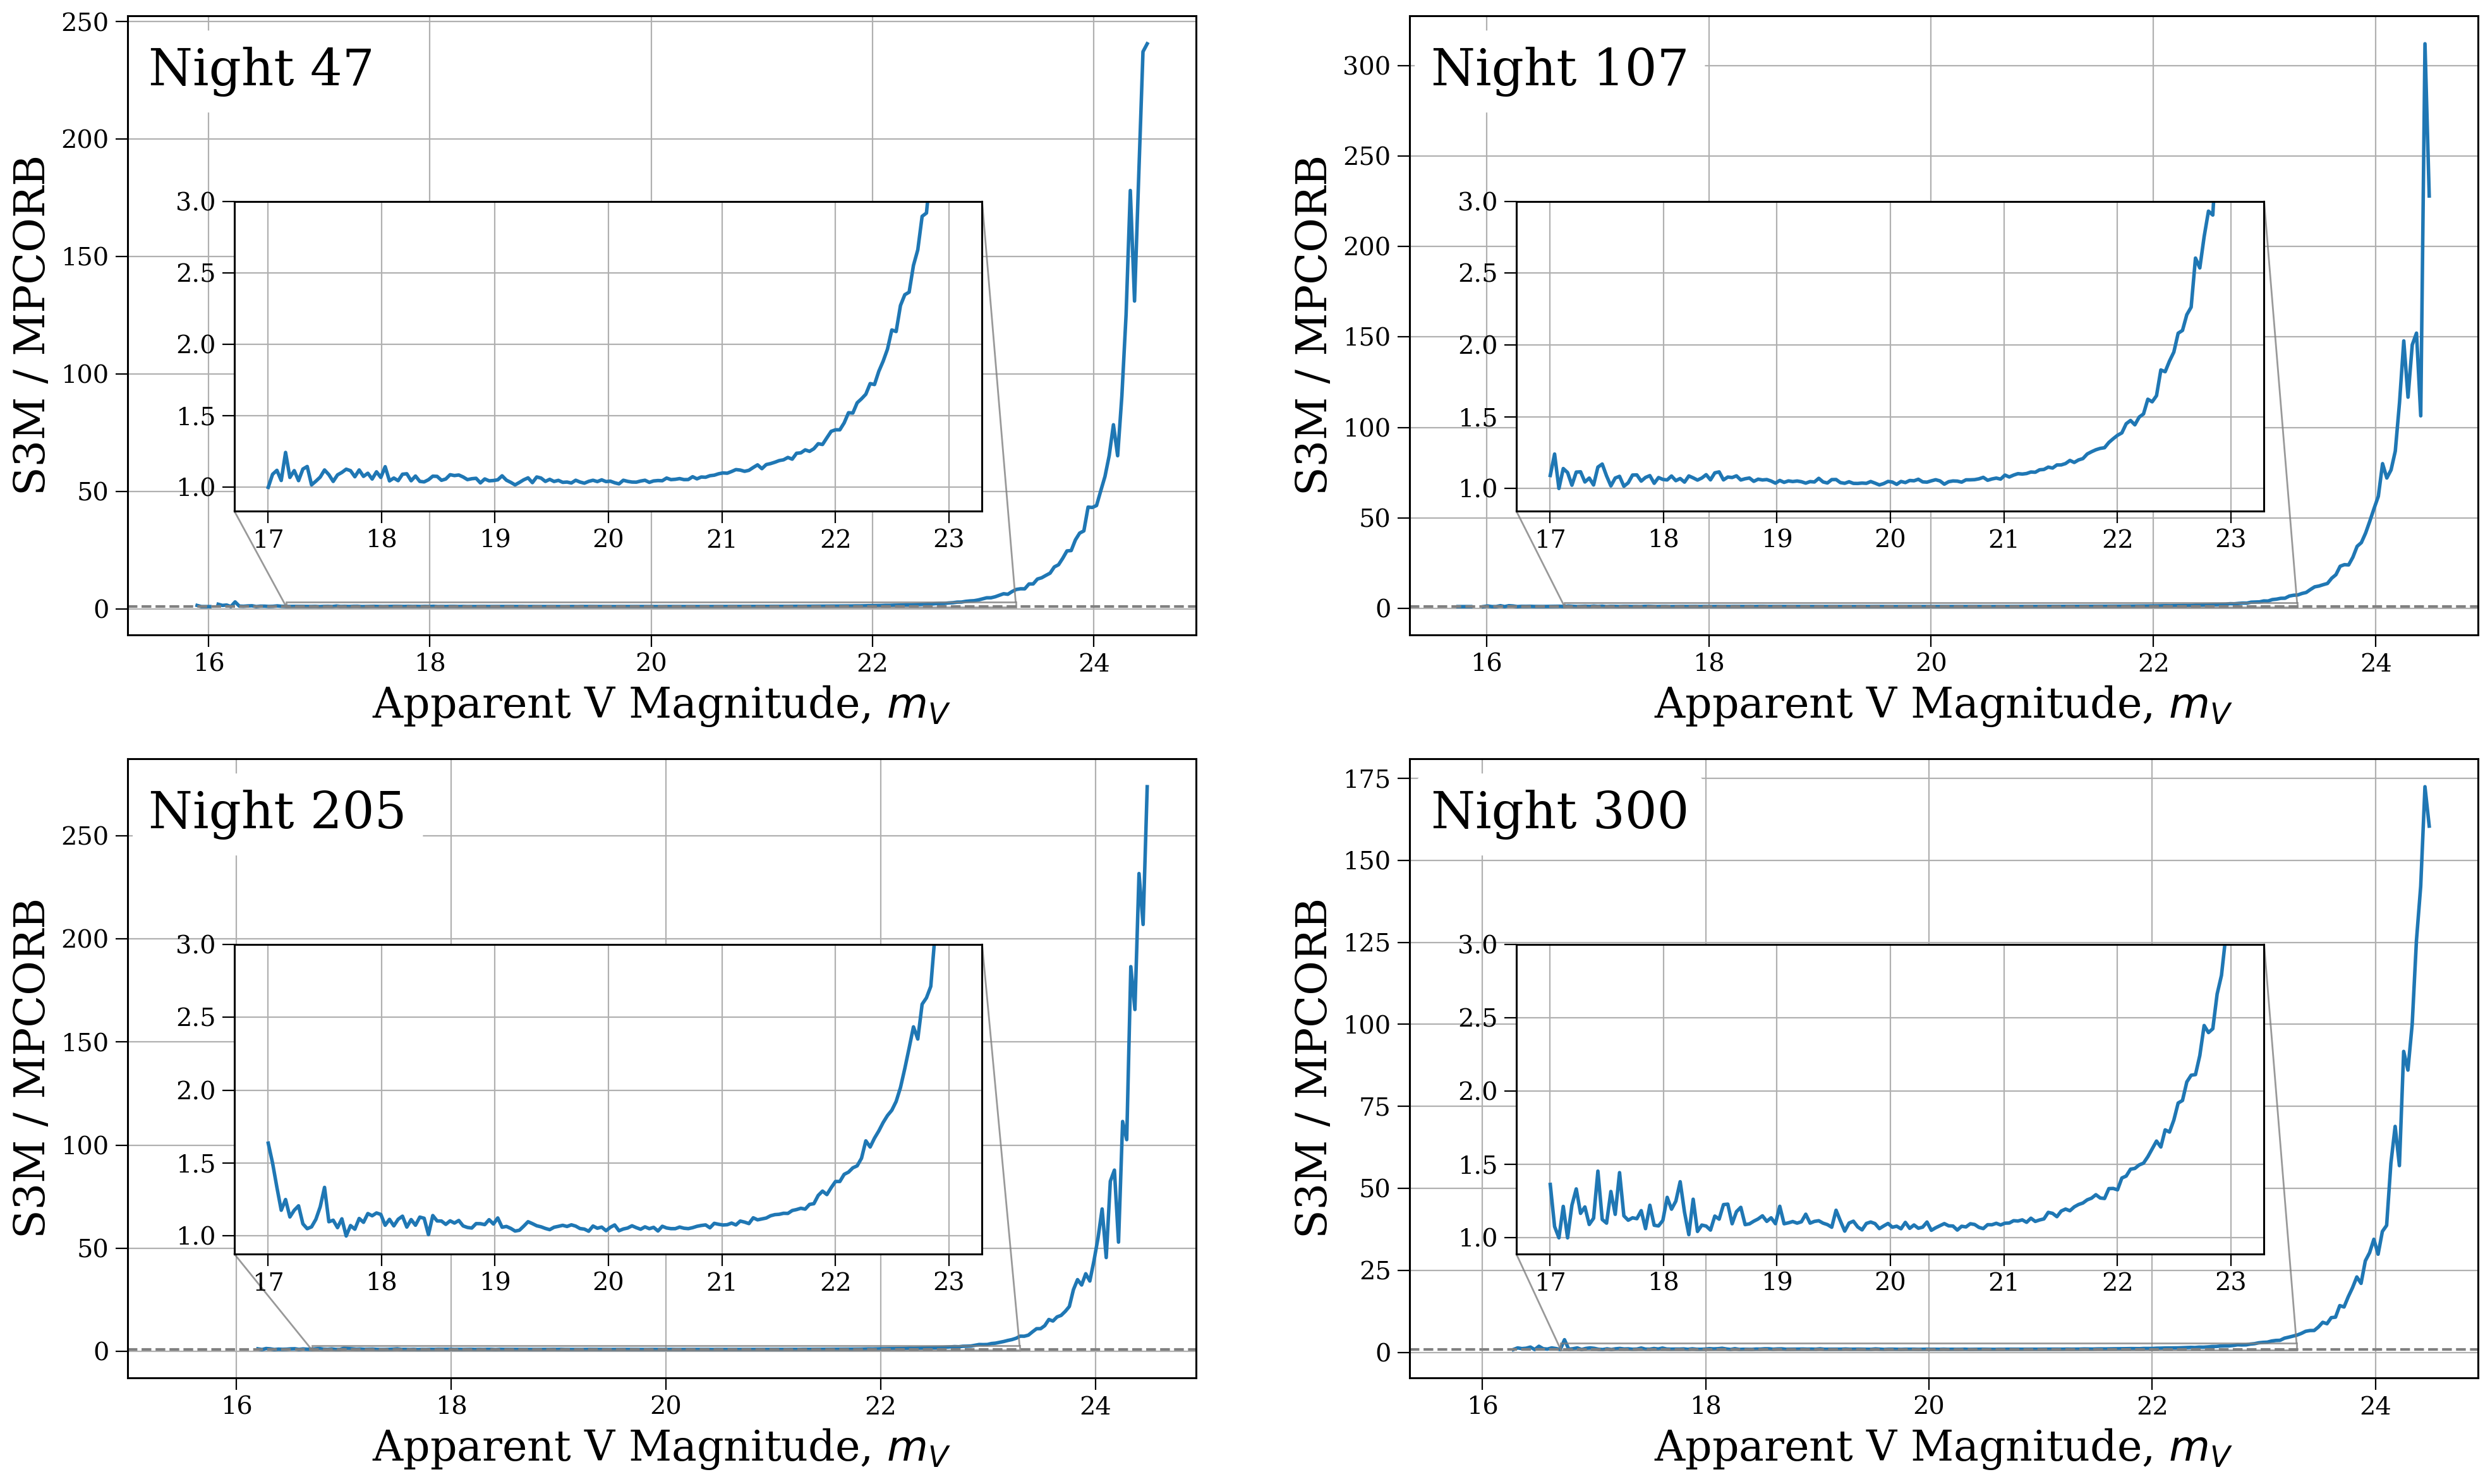

In [539]:
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for night, ax, v_mag in zip([47, 107, 205, 300], axes.ravel(), v_mags_adjusted):

    bins = np.linspace(15, 24.5, 250)
    h_s3m, _ = np.histogram(v_mag['s3m'], bins=bins)
    h_mpcorb, _ = np.histogram(v_mag['mpcorb'], bins=bins)
    
    bin_centres = (bins[1:] + bins[:-1]) / 2
    ratio = np.repeat(np.nan, len(bin_centres))
    ratio[h_mpcorb > 0] = h_s3m[h_mpcorb > 0] / h_mpcorb[h_mpcorb > 0]
    ax.plot(bin_centres, ratio, lw=2)
    ax.axhline(1, linestyle="--", color="grey")
    
    inset_ax = ax.inset_axes([0.1, 0.2, 0.7, 0.5])
    inset_lim = (bin_centres > 17) & (bin_centres < 23)
    inset_ax.plot(bin_centres[inset_lim], ratio[inset_lim], lw=2)
    inset_ax.set_ylim(top=3)
    inset_ax.grid()
    
    ax.indicate_inset_zoom(inset_ax, alpha=0.8)
    
    ax.set(xlabel=r"Apparent V Magnitude, $m_V$", ylabel=r"S3M / MPCORB")
    ax.annotate(f"Night {night}", xy=(0.02, 0.95), xycoords="axes fraction", va="top", fontsize=1.2*fs,
                bbox=dict(boxstyle="round", fc="white", ec="white"))
    #     ax.legend(loc="lower center")

    ax.grid()

plt.show()

In [454]:
len(cut_s3m) / len(s3m)

0.4999999652832915

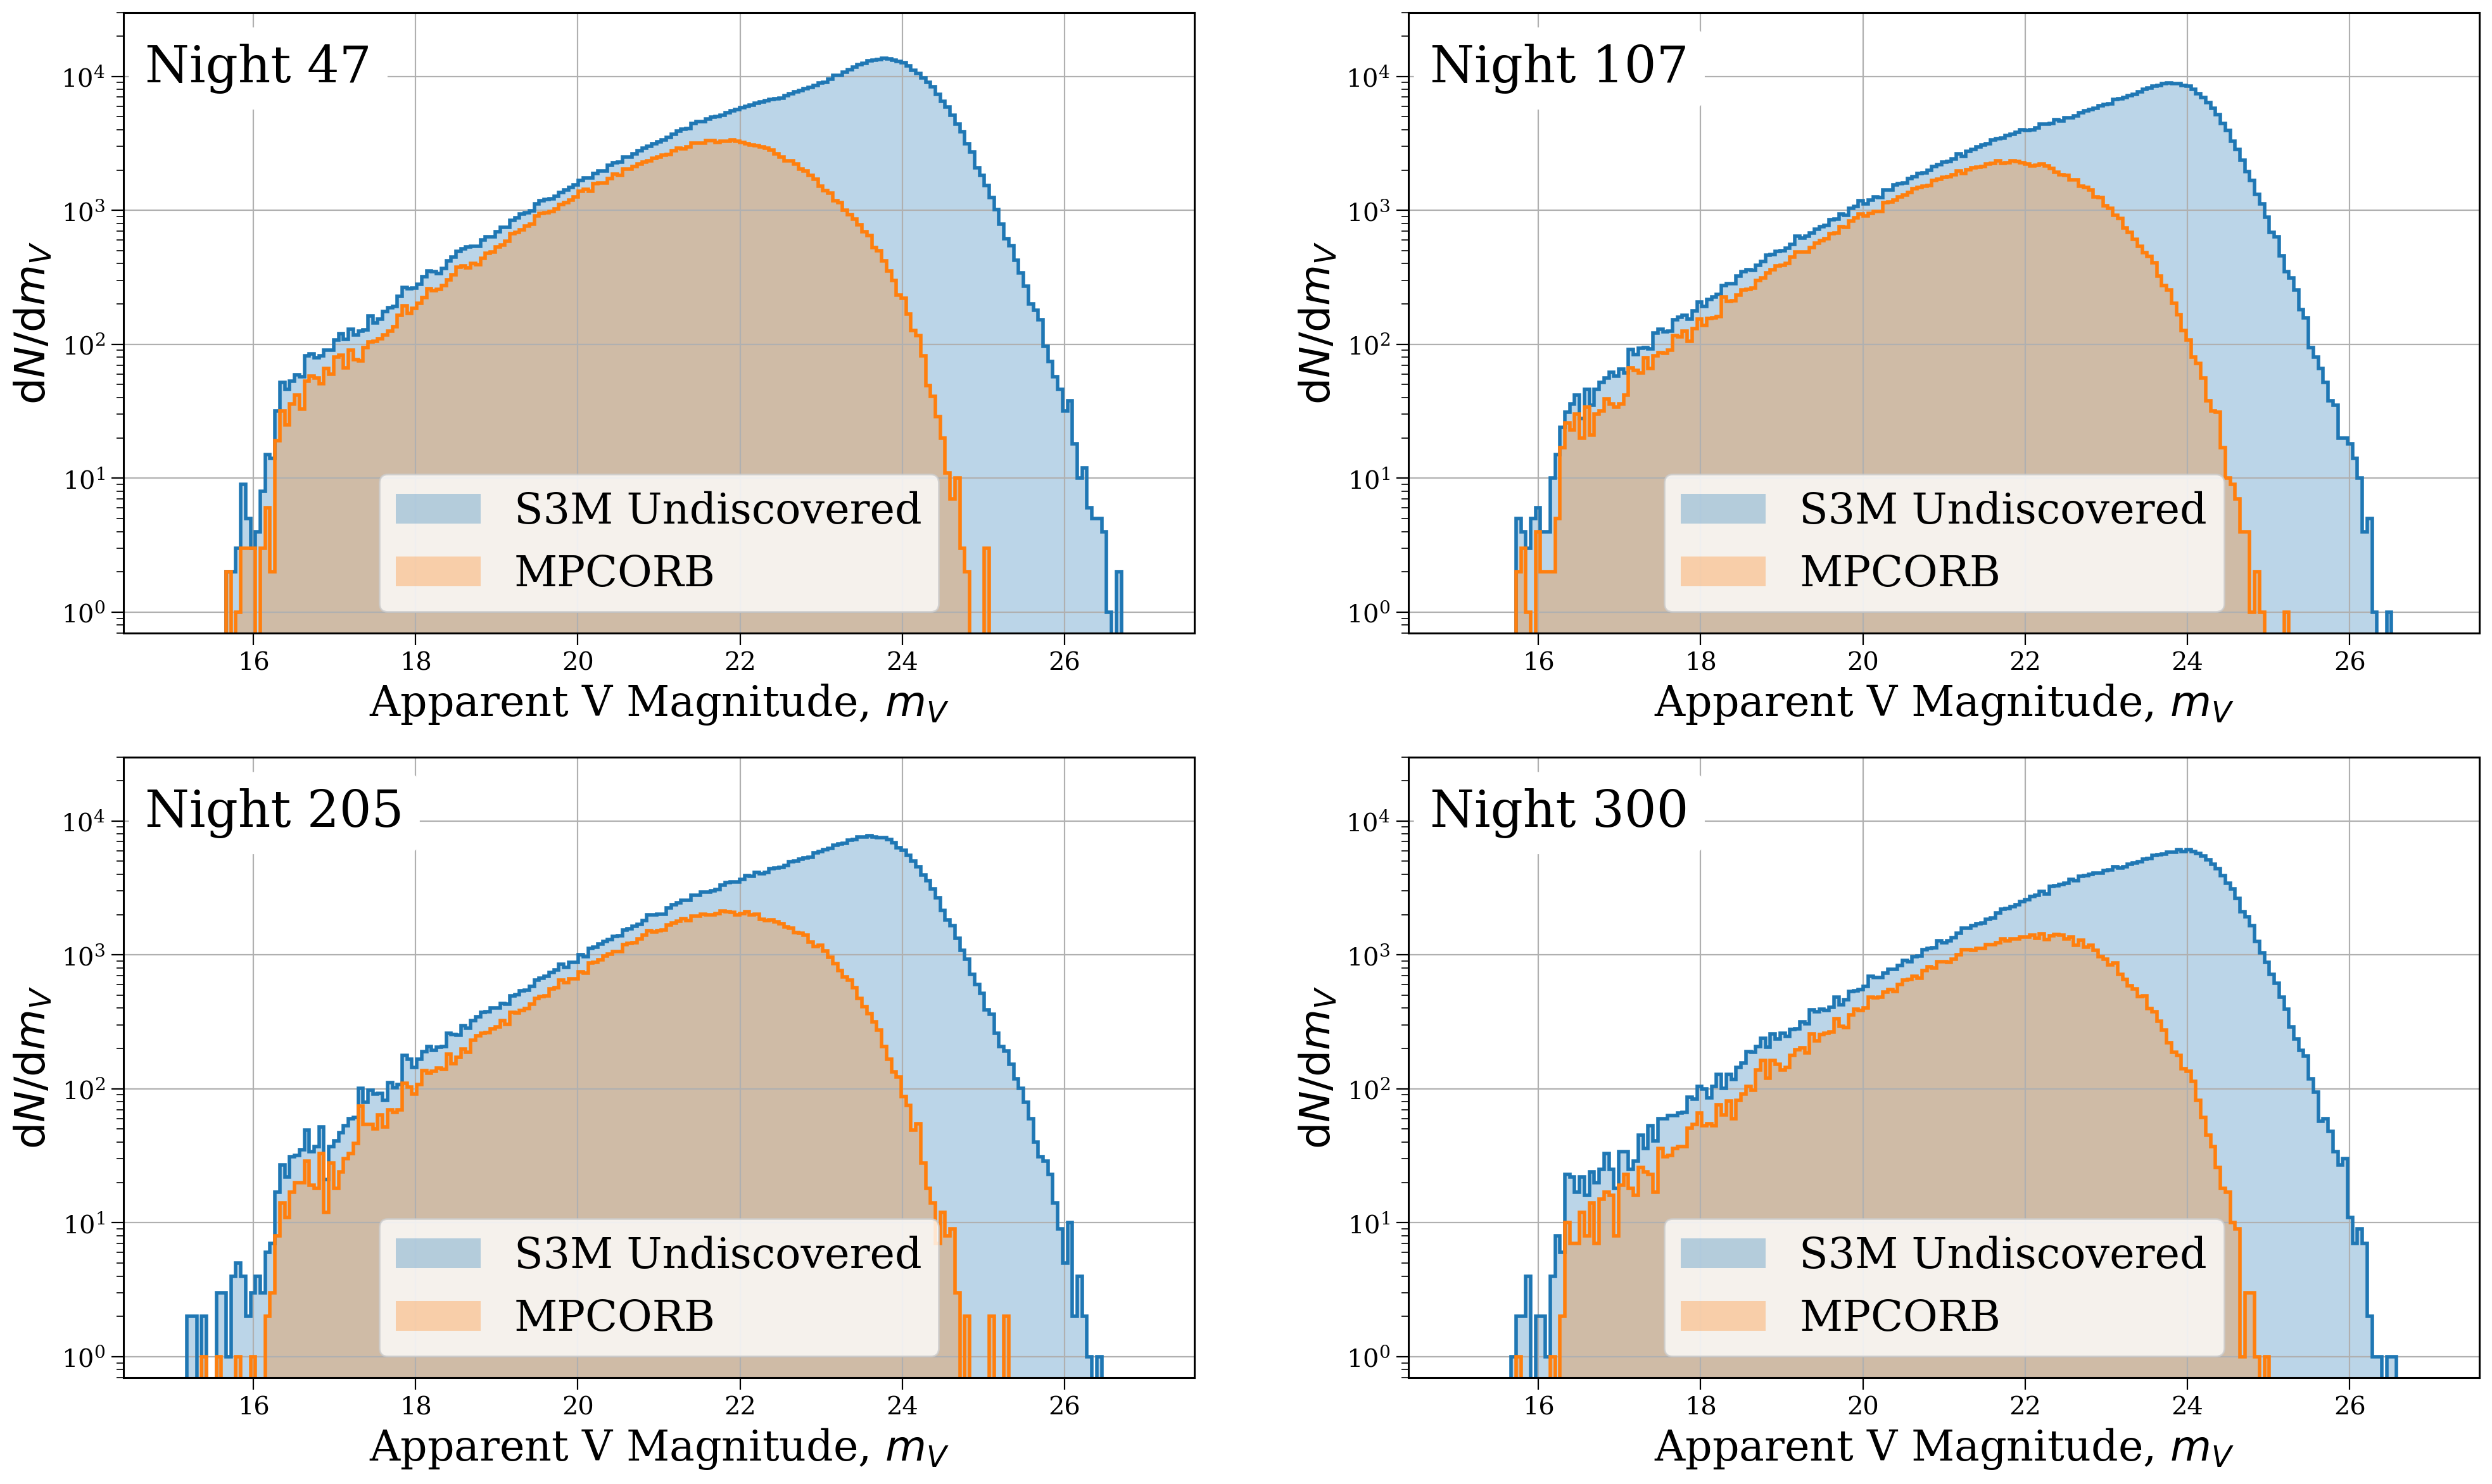

CPU times: user 7.71 s, sys: 197 ms, total: 7.91 s
Wall time: 7.92 s


In [456]:
%%time

fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for night, ax, v_mag in zip([47, 107, 205, 300], axes.ravel(), v_mags):

    for k, label, c in zip(v_mag, ["S3M Undiscovered", "MPCORB"], ["C0", "C1"]):
        ax.hist(v_mag[k], bins=np.linspace(15, 27, 200), label=label, alpha=0.3, color=c, range=(15, 27))
        ax.hist(v_mag[k], bins=np.linspace(15, 27, 200), color=c, histtype="step", lw=2, range=(15, 27))

    ax.set(xlabel=r"Apparent V Magnitude, $m_V$", ylabel=r"${\rm d}N/{\rm d}m_V$",
           yscale="log")
    ax.annotate(f"Night {night}", xy=(0.02, 0.95), xycoords="axes fraction", va="top", fontsize=1.2*fs,
                bbox=dict(boxstyle="round", fc="white", ec="white"))
    ax.legend(loc="lower center")

    ax.grid()
    
    ax.set_ylim(7e-1, 3e4)

plt.show()

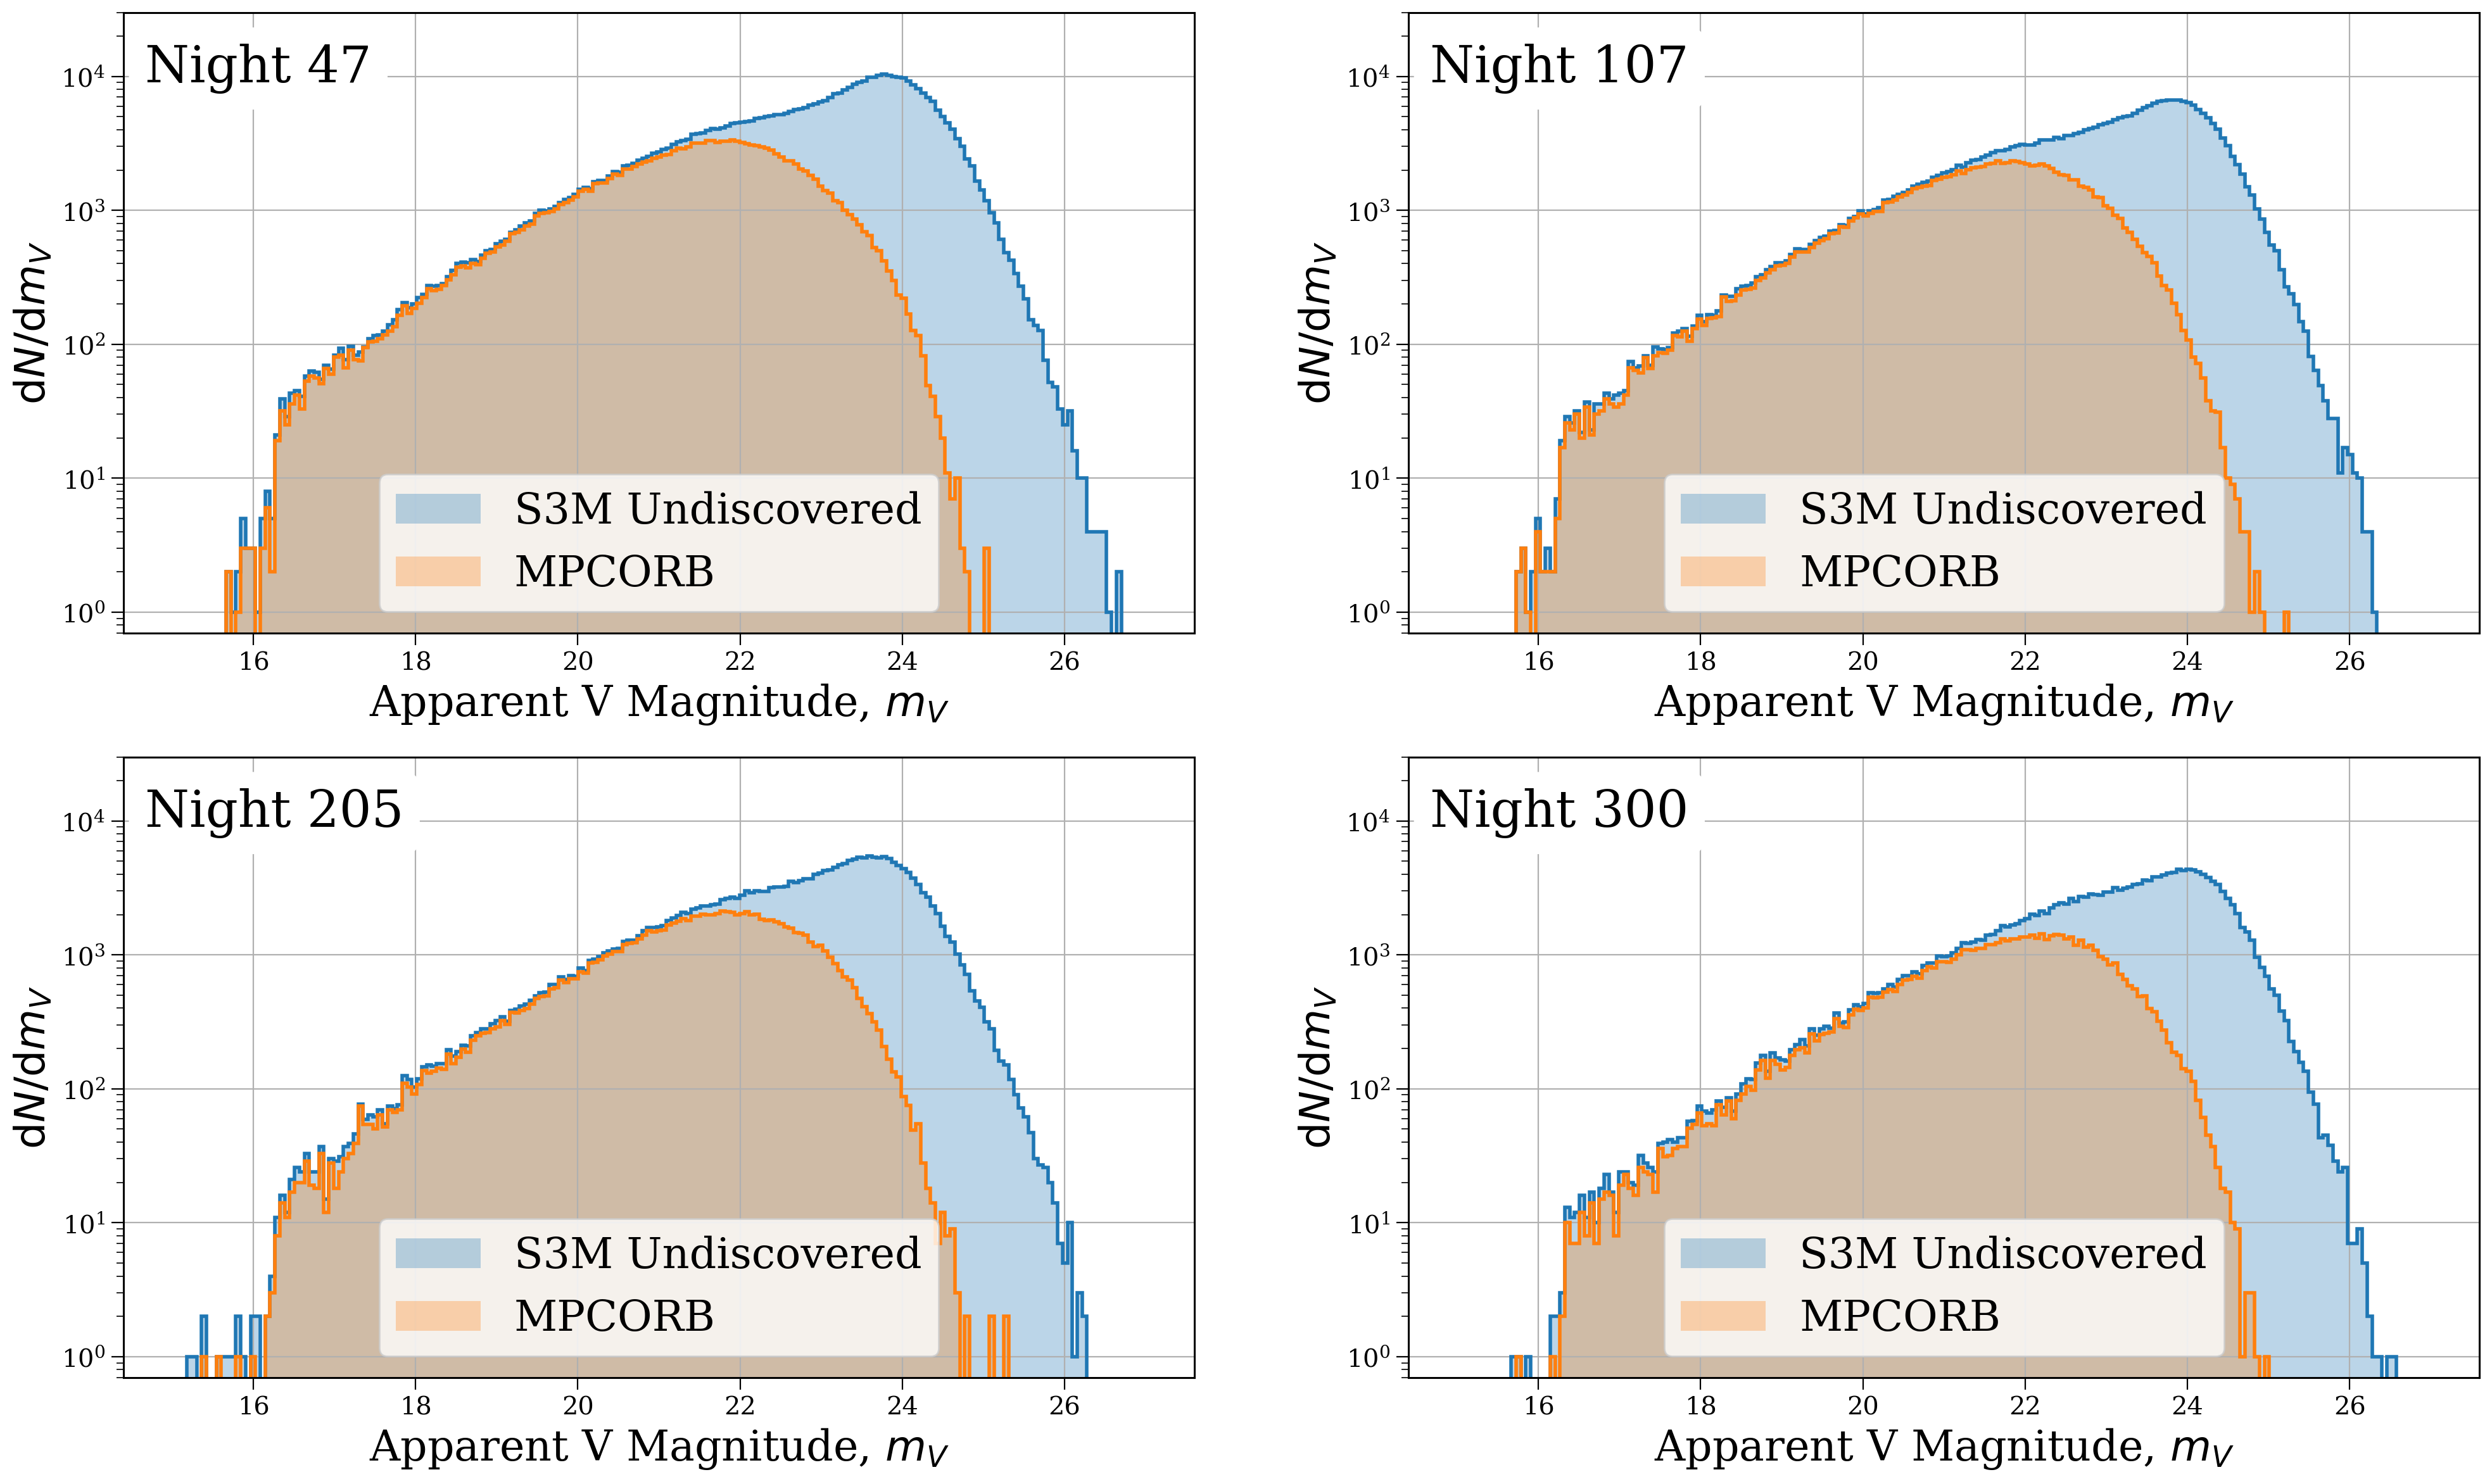

CPU times: user 6.41 s, sys: 491 ms, total: 6.9 s
Wall time: 6.92 s


In [540]:
%%time

fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for night, ax, v_mag in zip([47, 107, 205, 300], axes.ravel(), v_mags_adjusted):

    for k, label, c in zip(v_mag, ["S3M Undiscovered", "MPCORB"], ["C0", "C1"]):
        ax.hist(v_mag[k], bins=np.linspace(15, 27, 200), label=label, alpha=0.3, color=c, range=(15, 27))
        ax.hist(v_mag[k], bins=np.linspace(15, 27, 200), color=c, histtype="step", lw=2, range=(15, 27))

    ax.set(xlabel=r"Apparent V Magnitude, $m_V$", ylabel=r"${\rm d}N/{\rm d}m_V$",
           yscale="log")
    ax.annotate(f"Night {night}", xy=(0.02, 0.95), xycoords="axes fraction", va="top", fontsize=1.2*fs,
                bbox=dict(boxstyle="round", fc="white", ec="white"))
    ax.legend(loc="lower center")

    ax.grid()
    
    ax.set_ylim(7e-1, 3e4)

plt.show()